# Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import scipy.stats as stats
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
import plotly.io as pio
import os
from matplotlib.lines import Line2D

In [2]:
paths = ["Pie", "Bar", "Bar_hue", "Radar", "Box", "Lollipop", "Journal"]

if not os.path.exists("images"):
    os.mkdir("images")

for path in paths:
    if not os.path.exists(f'images/{path}'):
        os.mkdir(f'images/{path}')

# Loading dataset

In [3]:
df = pd.read_excel("data.xlsx")

In [4]:
df.head()

Gender       Age range  Current role Campus               Affiliation  \
0  Female   Over 50 years  Professional    CCM      Highschool Education   
1  Female   Over 50 years  Professional    MTY                  Business   
2  Female  40 to 50 years  Professional    MTY                  Business   
3    Male   Over 50 years  Professional    TOL  Engineering and Sciences   
4  Female  35 to 40 years  Professional    MTY  Humanities and Education   

  Programming experience Data analytics experience  \
0                     No                        No   
1                   Some                       Yes   
2                    Yes                        No   
3                    Yes                       Yes   
4                   Some                       Yes   

  Experience using tools like Python, Colab, etc.  \
0                                              No   
1                                            Some   
2                                              No   
3                                             Yes   
4                                            Some   

  Experience using ChatGPT in general  \
0                                 Yes   
1                                 Yes   
2                                 Yes   
3                                 Yes   
4                                 Yes   

  Experience using ChatGPT for programming  \
0                                       No   
1                                       No   
2                                       No   
3                                     Some   
4                                       No   

  Experience using ChatGPT for data analytics  \
0                                          No   
1                                          No   
2                                          No   
3                                          No   
4                                        Some   

  Experience using generative APIs Time required to finish activity 1  \
0                              Yes                   10 to 15 minutes   
1                             Some                   15 to 30 minutes   
2                               No                   15 to 30 minutes   
3                             Some                    5 to 10 minutes   
4                               No                    5 to 10 minutes   

  Time required to finish activity 2 Time required to finish activity 3  \
0                   15 to 30 minutes                   15 to 30 minutes   
1                   10 to 15 minutes               More than 30 minutes   
2                   15 to 30 minutes                   15 to 30 minutes   
3                   10 to 15 minutes                   10 to 15 minutes   
4                Less than 5 minutes                Less than 5 minutes   

                        Ease of use                   Speed of result  \
0         LIDA with GPT integration         LIDA with GPT integration   
1  ChatGPT as an external assistant  ChatGPT as an external assistant   
2         LIDA with GPT integration         LIDA with GPT integration   
3  ChatGPT as an external assistant  ChatGPT as an external assistant   
4  ChatGPT as an external assistant  ChatGPT as an external assistant   

             Appropriateness      Helpful                Correctness  
0  LIDA with GPT integration        A lot  LIDA with GPT integration  
1  LIDA with GPT integration  Yes, enough  LIDA with GPT integration  
2  LIDA with GPT integration        A lot  LIDA with GPT integration  
3  LIDA with GPT integration        A lot  LIDA with GPT integration  
4  LIDA with GPT integration        A lot  LIDA with GPT integration

# Categorical variables correlation

This is a test.

- https://medium.com/@knoldus/how-to-find-correlation-value-of-categorical-variables-23de7e7a9e26 
- https://shakedzy.xyz/dython/

In [5]:
categorical_features=identify_nominal_columns(df)
categorical_features

['Gender',
 'Age range',
 'Current role',
 'Campus',
 'Affiliation',
 'Programming experience',
 'Data analytics experience',
 'Experience using tools like Python, Colab, etc.',
 'Experience using ChatGPT in general',
 'Experience using ChatGPT for programming',
 'Experience using ChatGPT for data analytics',
 'Experience using generative APIs',
 'Time required to finish activity 1',
 'Time required to finish activity 2',
 'Time required to finish activity 3',
 'Ease of use',
 'Speed of result',
 'Appropriateness',
 'Helpful',
 'Correctness']

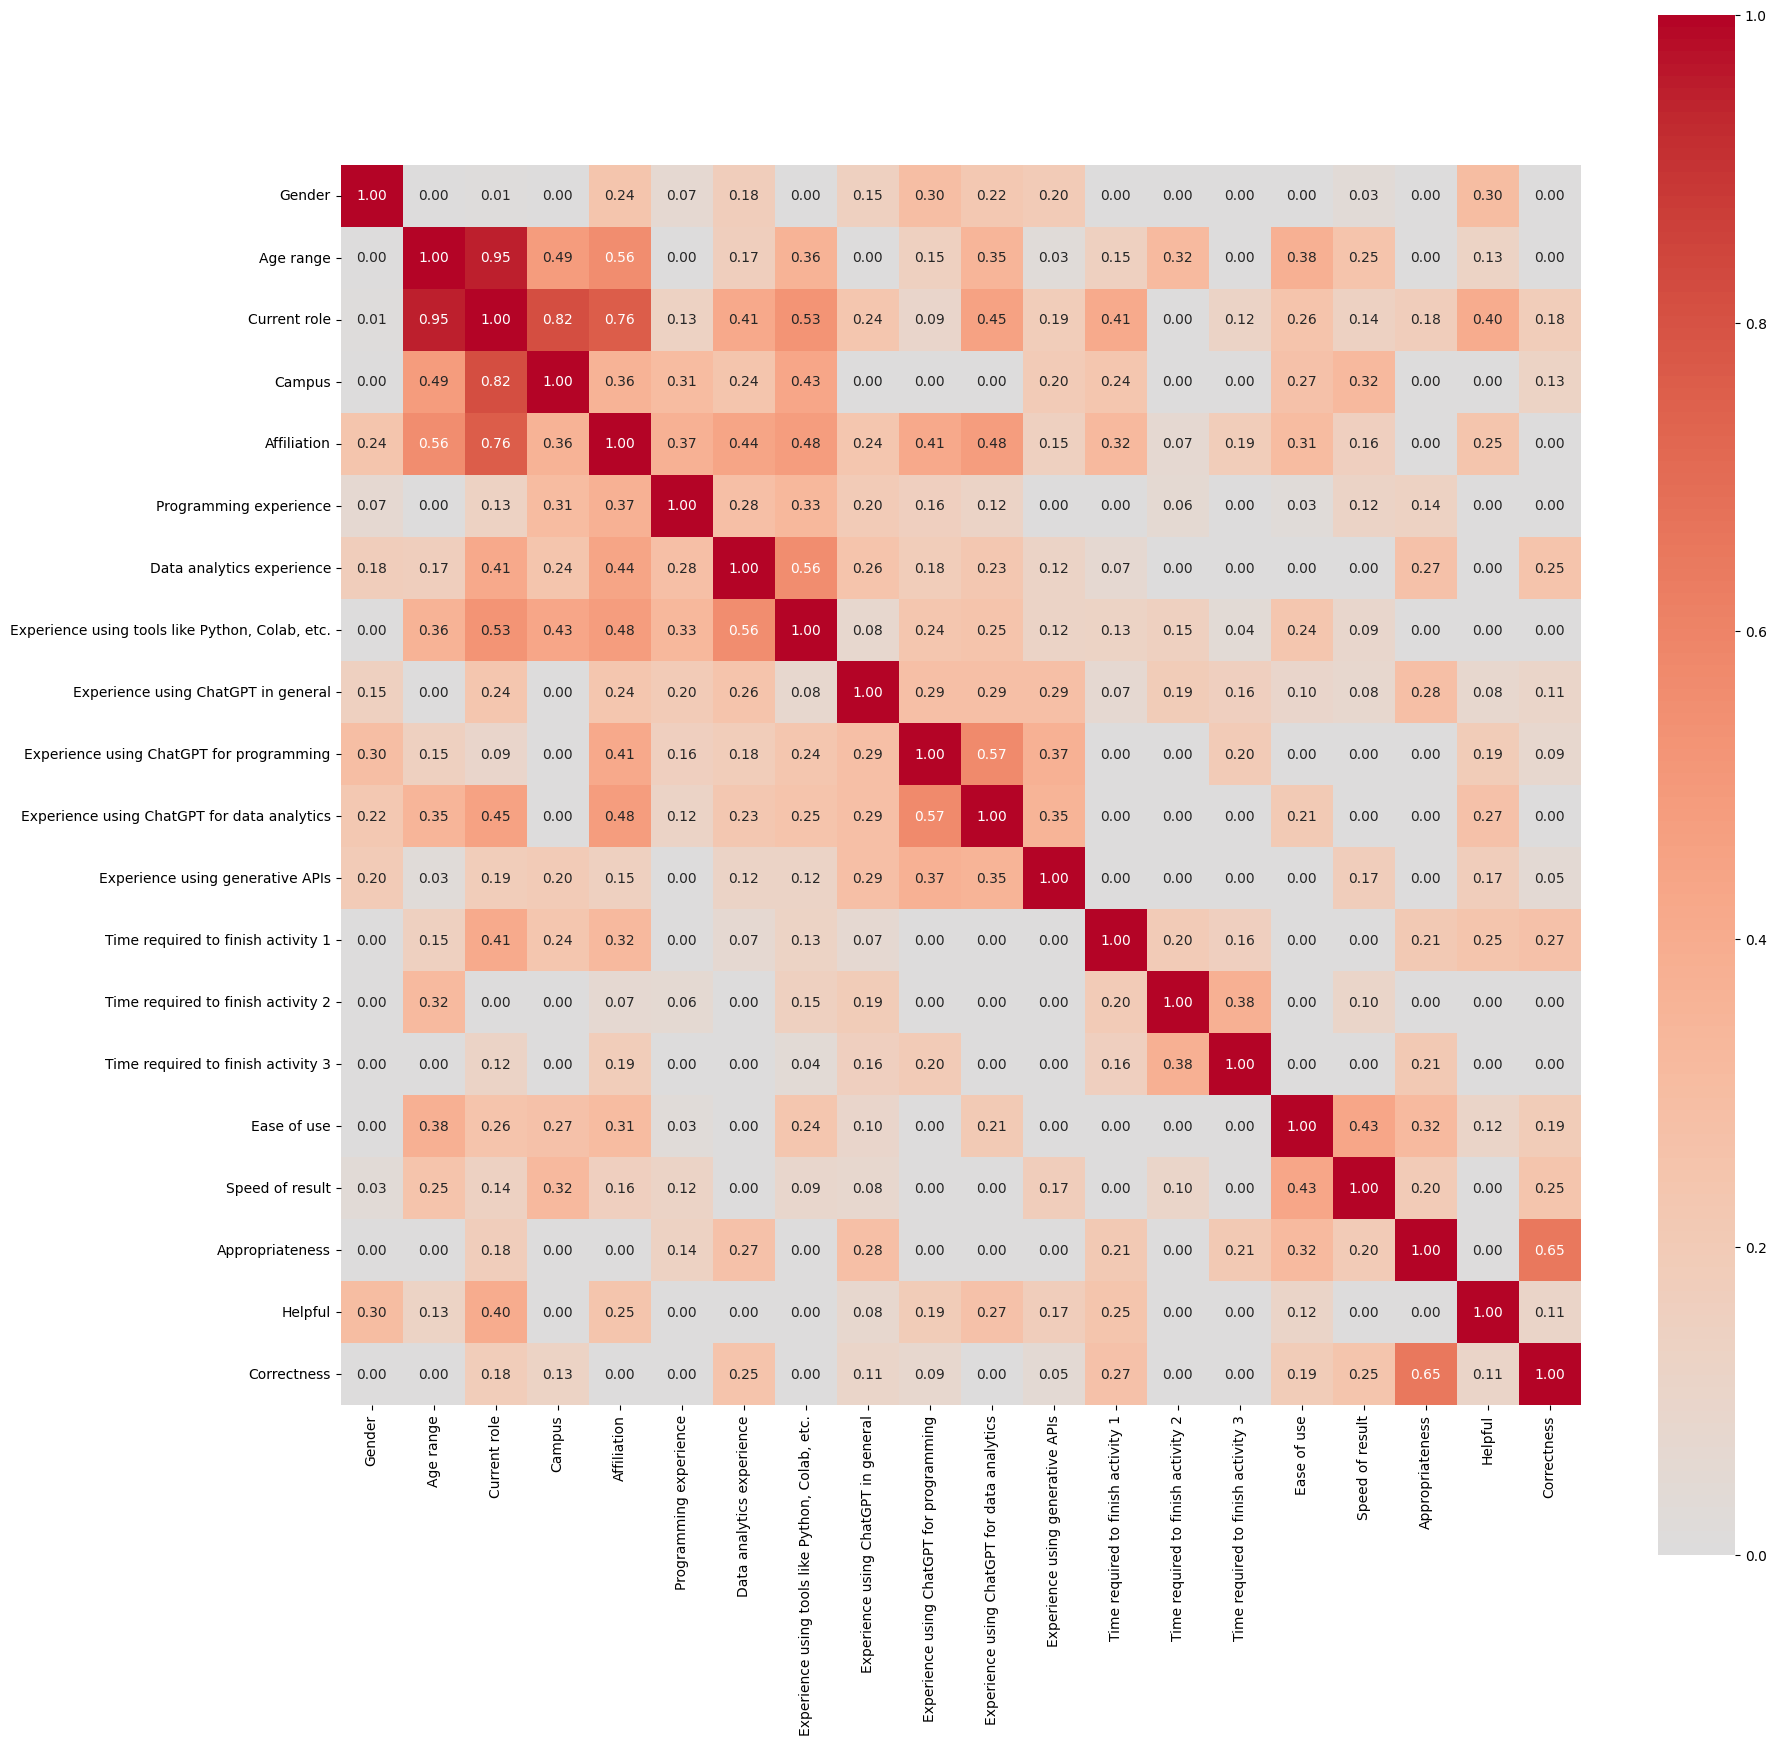

In [6]:
complete_correlation= associations(df[categorical_features], figsize=(20,20), cmap='coolwarm')

# Useful functions

In [7]:
def get_uniques(dataframe: pd.DataFrame) -> dict:
  """
  Gets the unique values for each column of a dataframe

    Parameters
    ----------
    dataframe : pd.DataFrame
        The dataframe to be processed

    Returns
    -------
    dictionary
        A dictionary where the keys are the colums of the dataframe, and the values are the unique values of the column
  """
  unique_values = {}

  for column in dataframe:
    unique_values[column] = pd.unique(dataframe[column])

  return unique_values

In [8]:
sns.set_theme(style="whitegrid")
palette = "Pastel1"
sns.set_palette(palette)

In [9]:
def pie_chart(data, column, colors=None, title=True, subpath="", article_image=False):
    df_pie = data[column].value_counts()
    plot = df_pie.plot.pie(title=f"Number of participants by {column.lower()}" if title else "", 
                           startangle=90, 
                           autopct='%1.0f%%', 
                           ylabel="", 
                           legend=None,
                           colors=[colors[v] for v in df_pie.keys()] if colors is not None else None)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    path = "Pie" if not article_image else "Journal"
    subpath = f" for {subpath.lower()}" if subpath else ""
    plot.get_figure().savefig(f"images/{path}/Pie - Number of participants by {column.lower()}{subpath}.png", bbox_inches='tight')

In [10]:
def bar_chart(data, column, title=True, subpath="", article_image=False):
    ax = sns.countplot(x=column, data=data, order=data[column].value_counts().index)
    ax.set_title(f"Number of participants by {column.lower()}" if title else "")
    ax.set_ylabel("Number of participants")
    ax.set_yticks(range(0, 30, 5))
    ax.set_xlabel(None)
    plt.xticks(rotation=90)
    plt.show()
    path = "Bar" if not article_image else "Journal"
    subpath = f" for {subpath.lower()}" if subpath else ""
    ax.figure.savefig(f"images/{path}/Bar - Number of participants by {column.lower()}{subpath}.png", bbox_inches='tight')


In [11]:
def bar_chart_hue(data, column, hue, title=True, subpath="", article_image=False):
    ax = sns.countplot(x=column, data=data, hue=hue, order=data[column].value_counts().index)
    ax.set_title(f"Number of participants by {column.lower()} and {hue.lower()}" if title else "")
    ax.set_ylabel("Number of participants")
    ax.set_yticks(range(0, 30, 5))
    ax.set_xlabel(None)
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    path = "Bar_hue" if not article_image else "Journal"
    subpath = f" for {subpath.lower()}" if subpath else ""
    ax.figure.savefig(f"images/{path}/Bar - Number of participants by {column.lower()} and {hue.lower()}{subpath}.png", bbox_inches='tight')

In [12]:
df.columns

Index(['Gender', 'Age range', 'Current role', 'Campus', 'Affiliation',
       'Programming experience', 'Data analytics experience',
       'Experience using tools like Python, Colab, etc.',
       'Experience using ChatGPT in general',
       'Experience using ChatGPT for programming',
       'Experience using ChatGPT for data analytics',
       'Experience using generative APIs',
       'Time required to finish activity 1',
       'Time required to finish activity 2',
       'Time required to finish activity 3', 'Ease of use', 'Speed of result',
       'Appropriateness', 'Helpful', 'Correctness'],
      dtype='object')

# Miscellaneus charts

## Pie charts

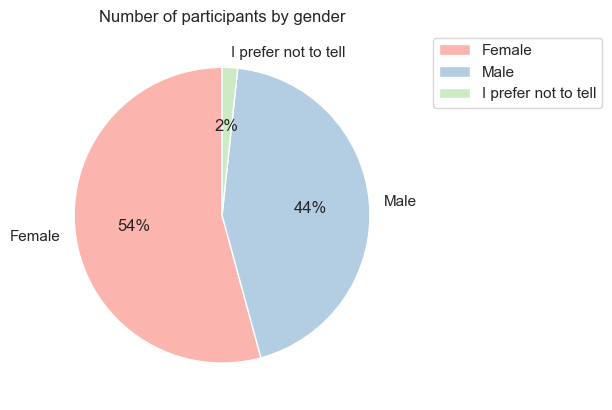

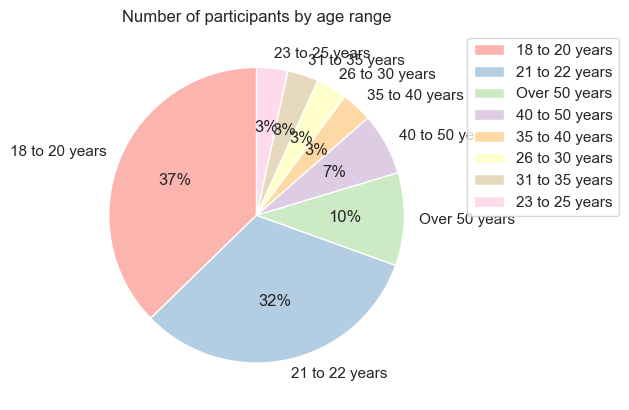

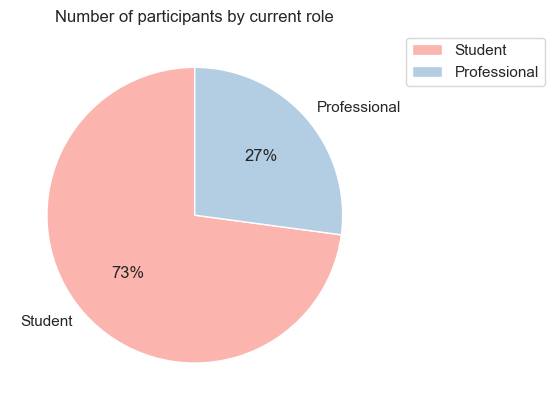

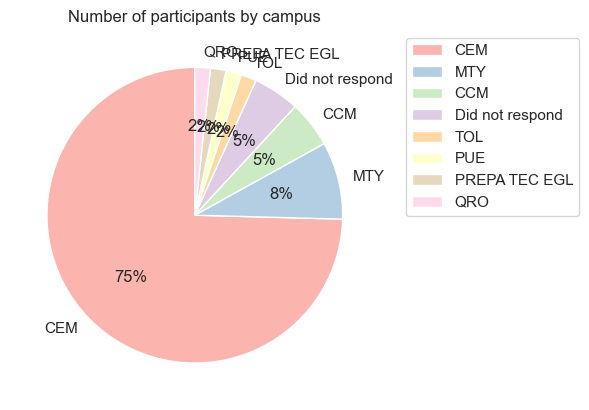

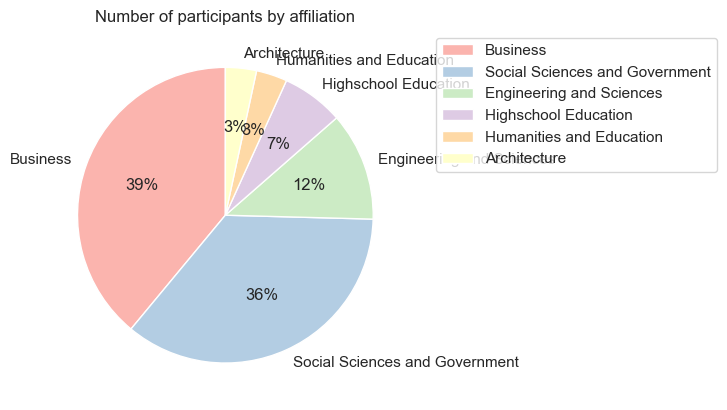

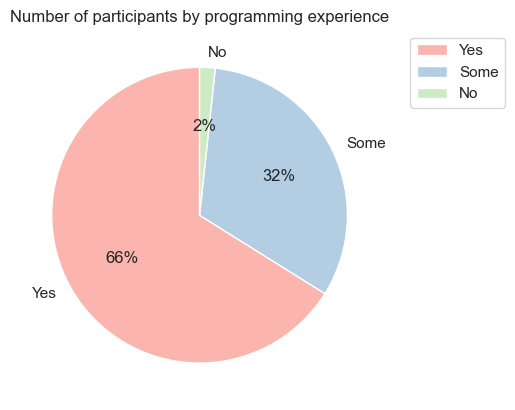

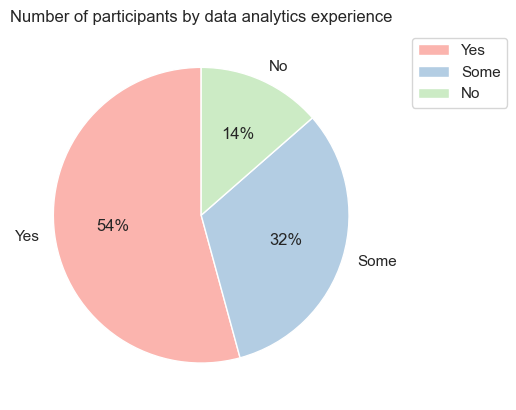

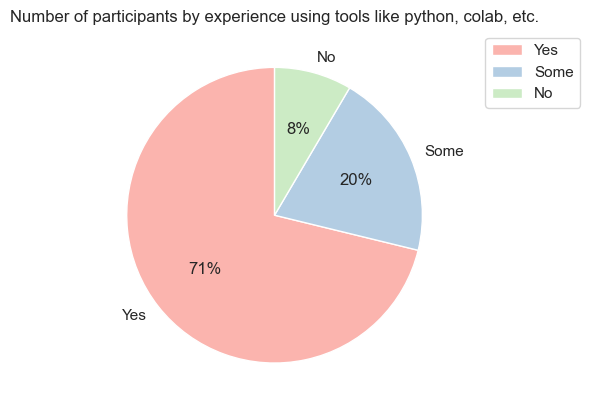

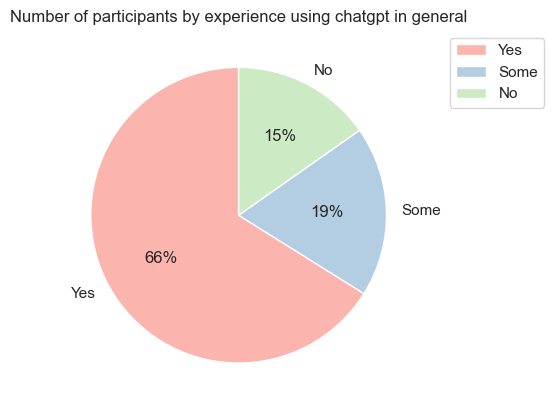

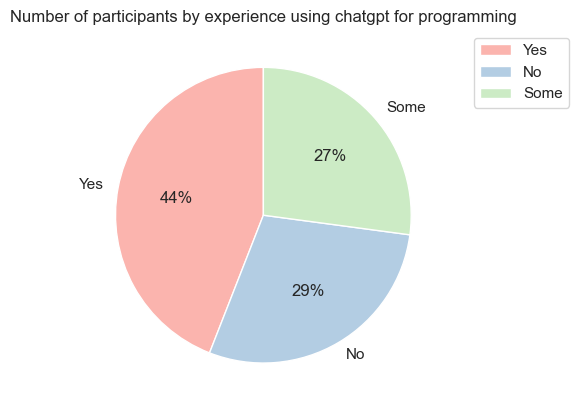

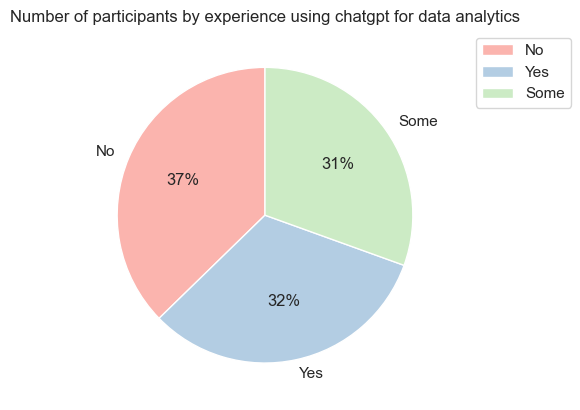

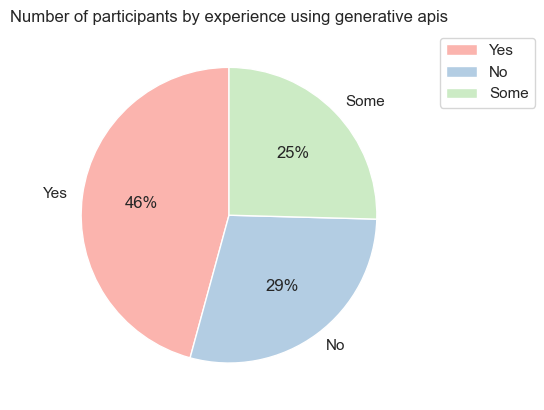

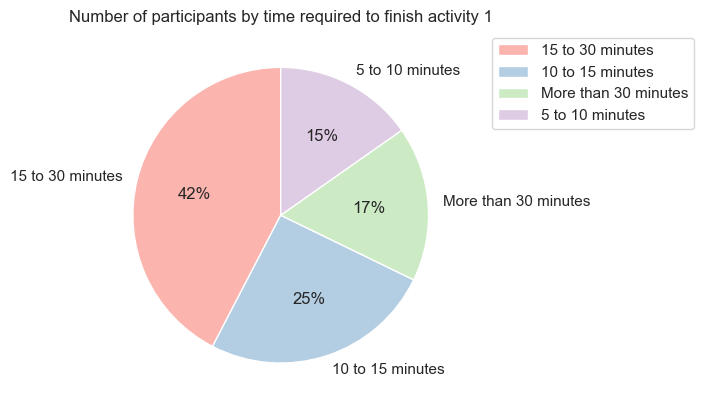

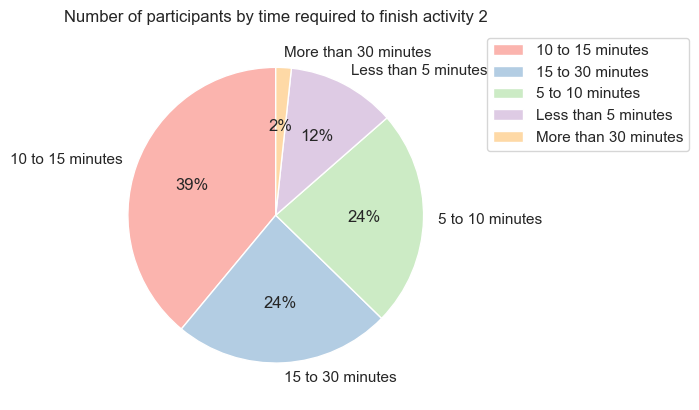

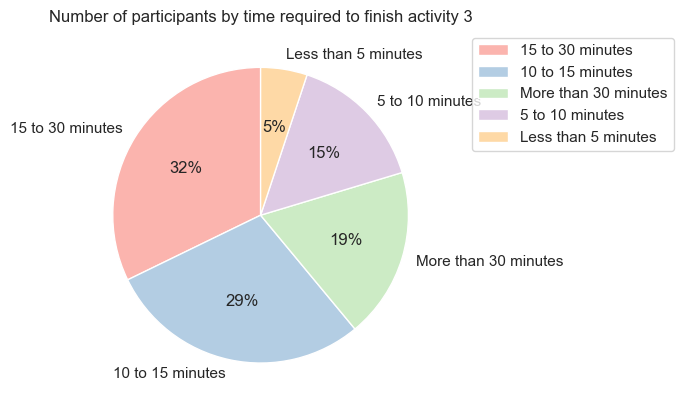

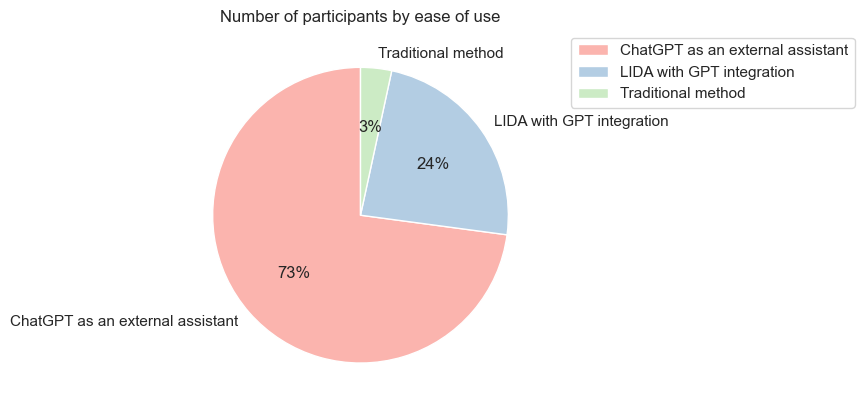

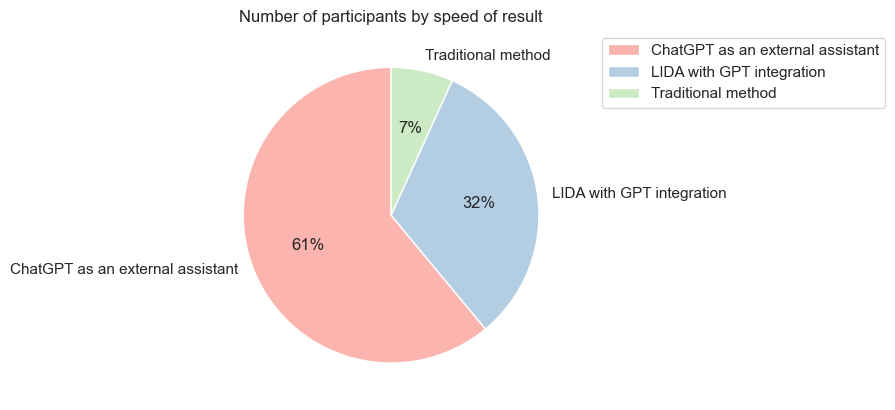

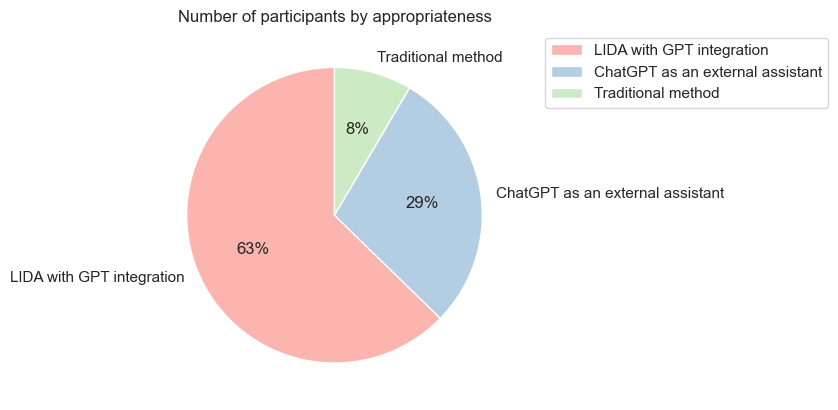

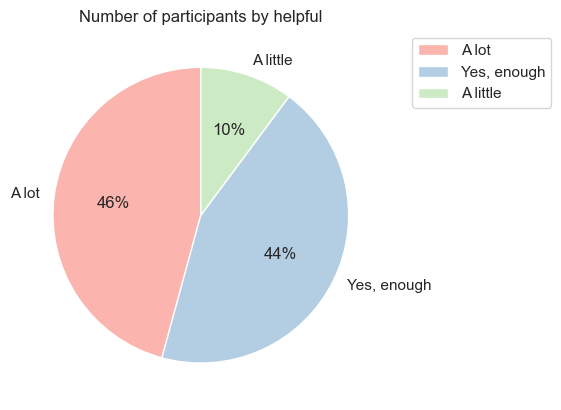

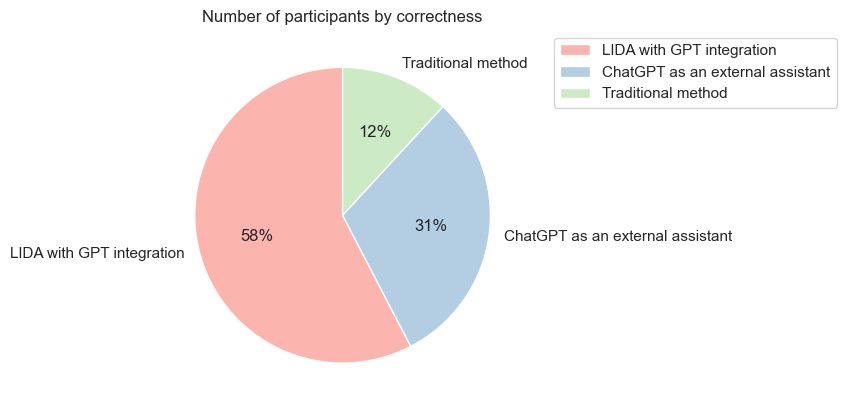

In [13]:
# Pie charts
for col in df.columns:
  pie_chart(df, col)

## Bar charts

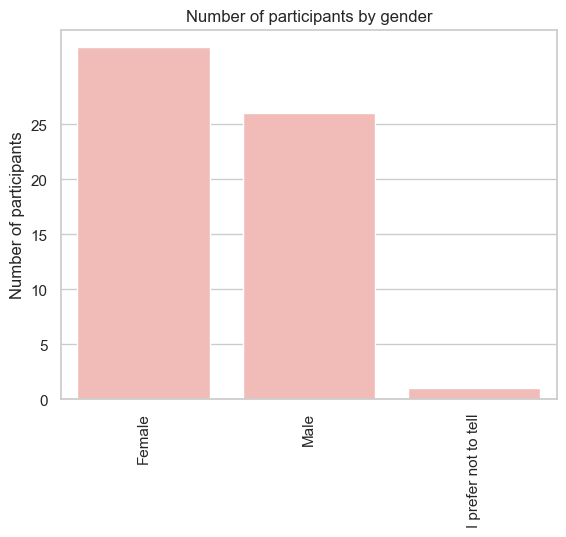

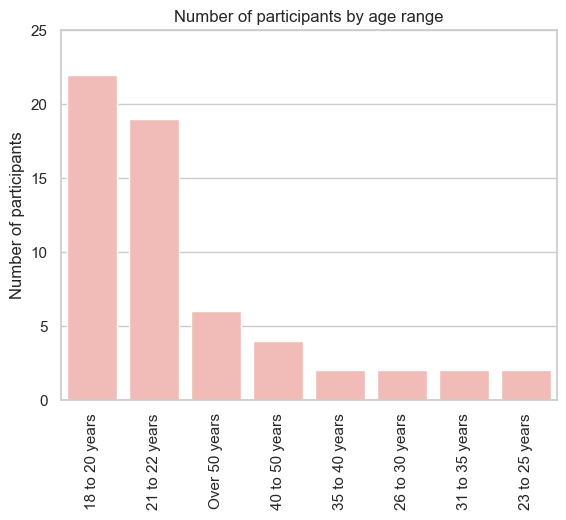

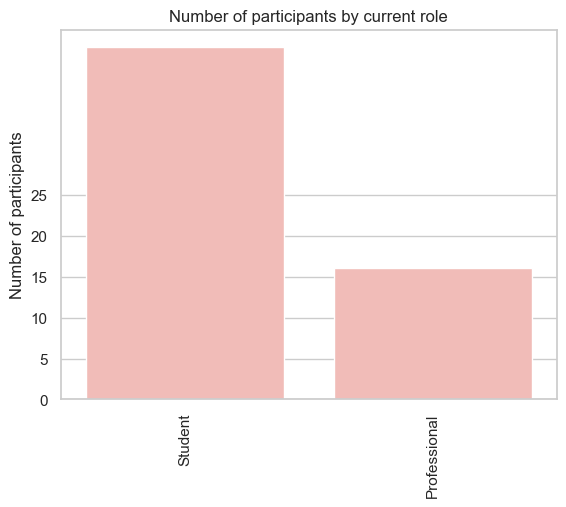

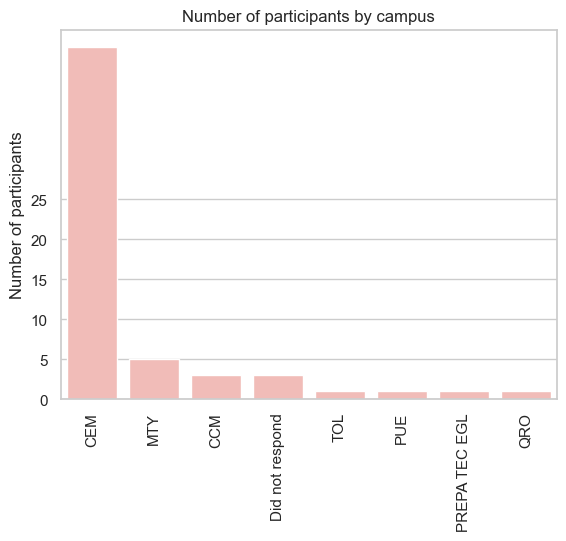

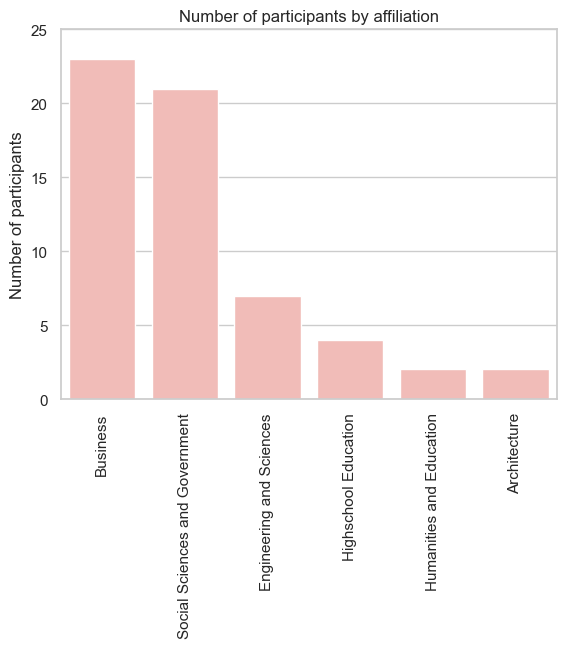

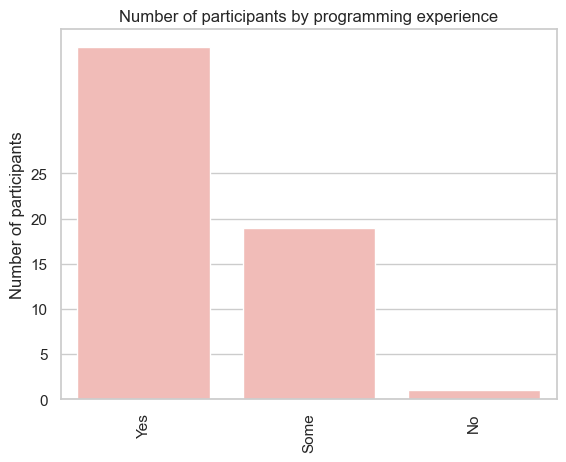

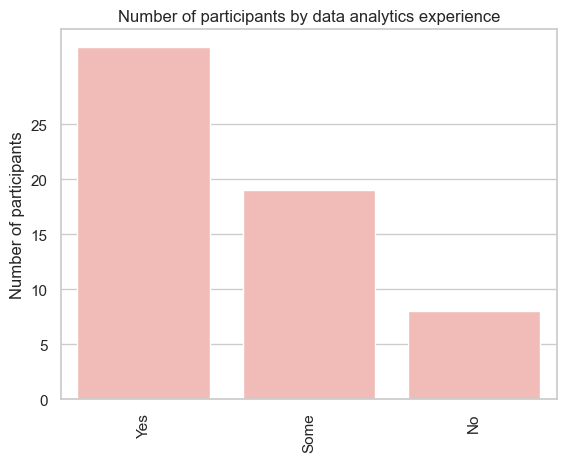

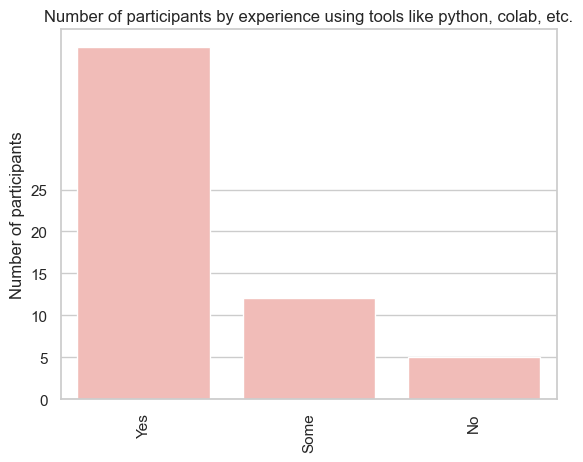

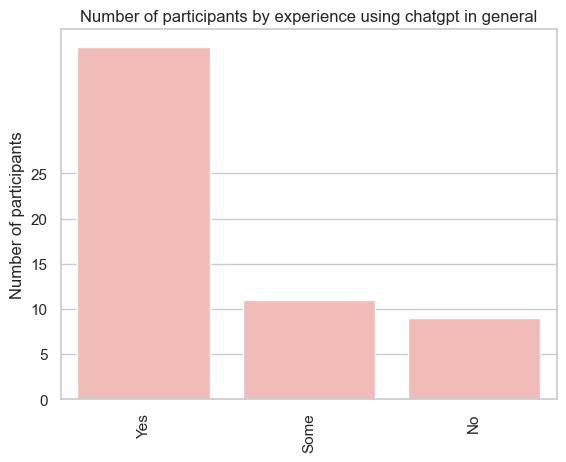

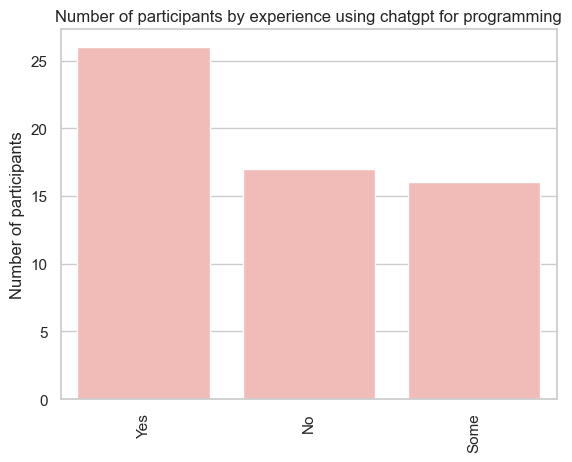

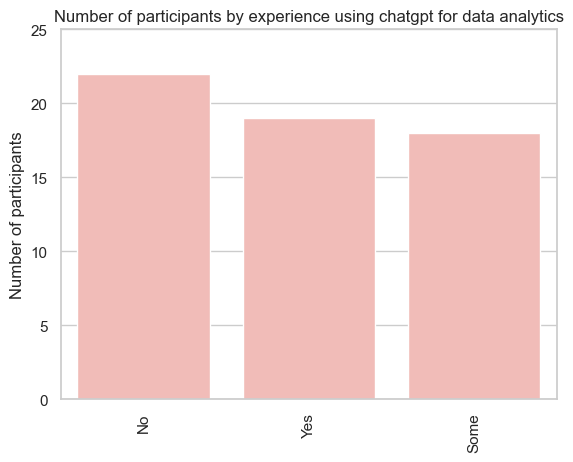

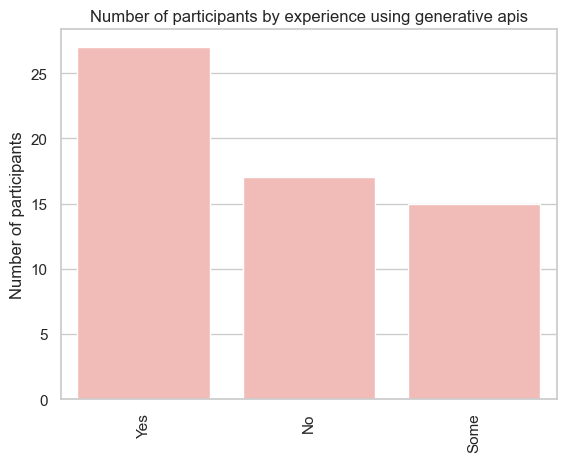

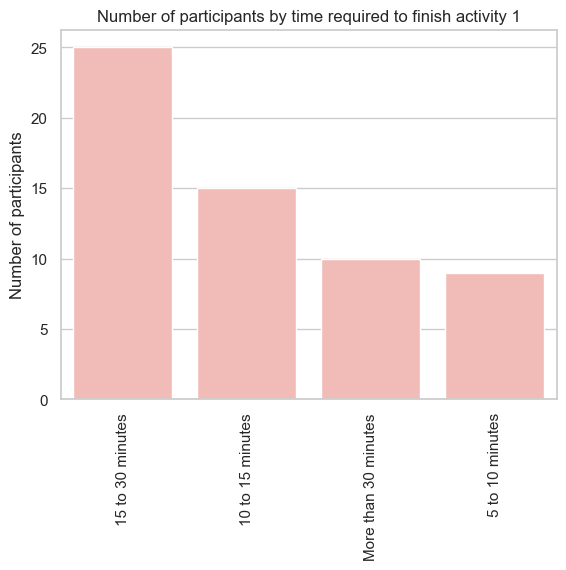

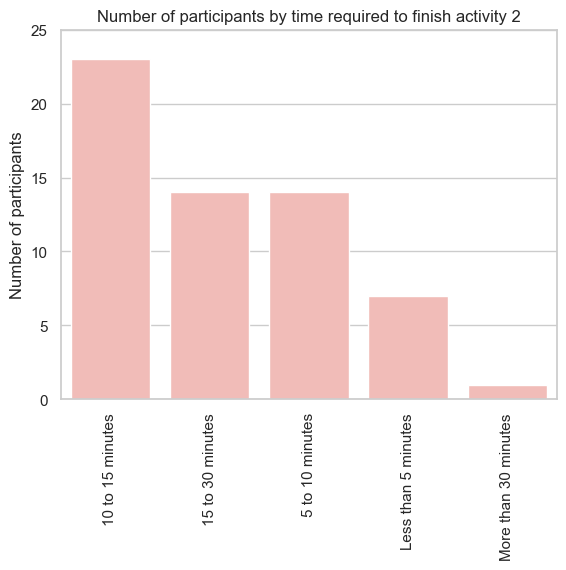

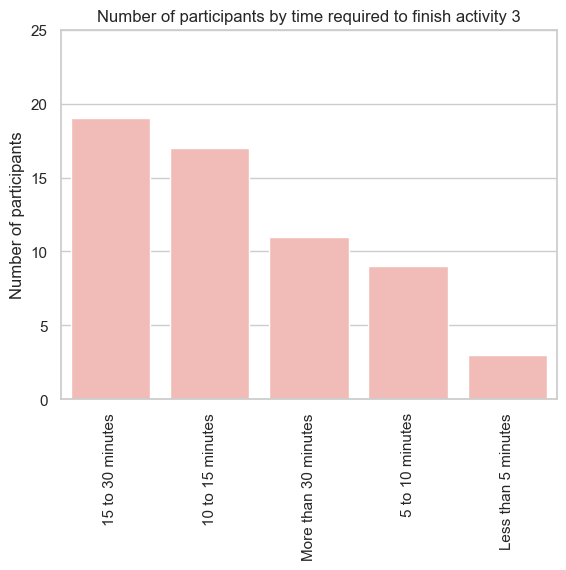

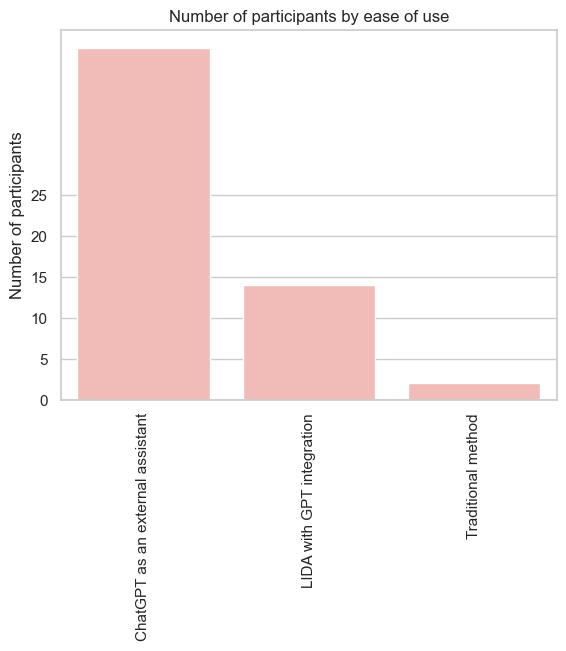

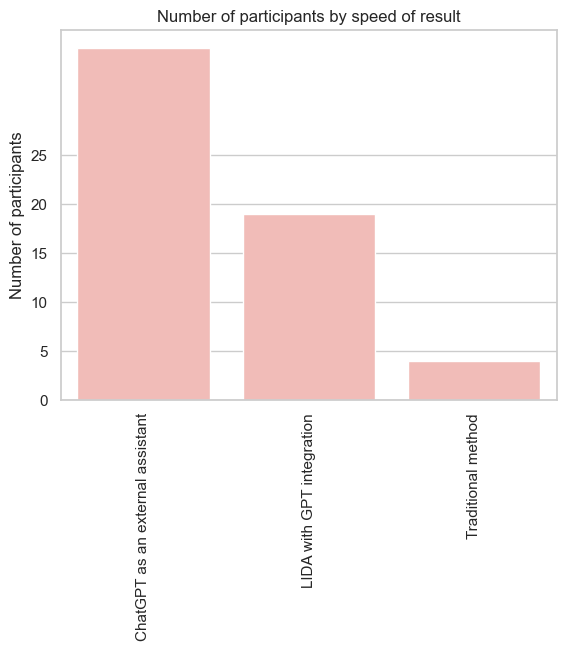

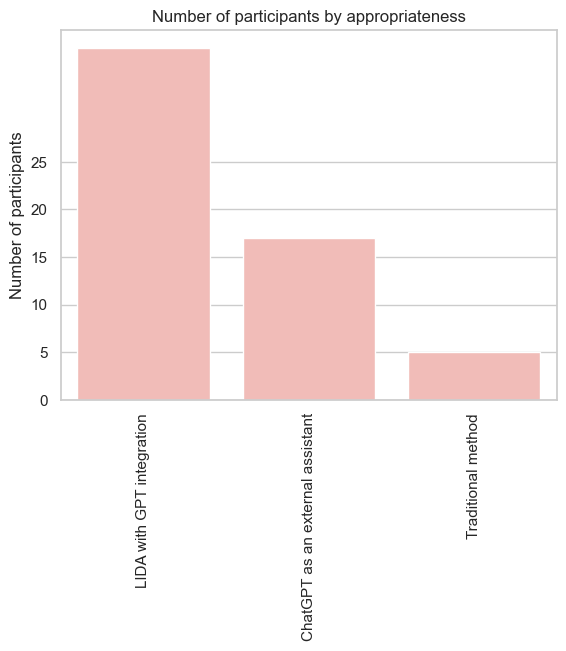

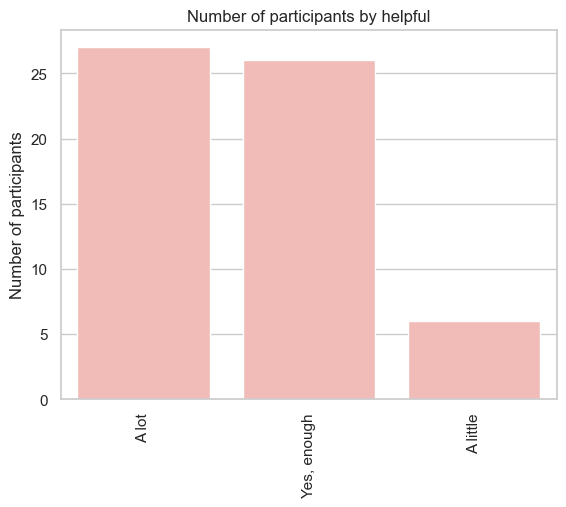

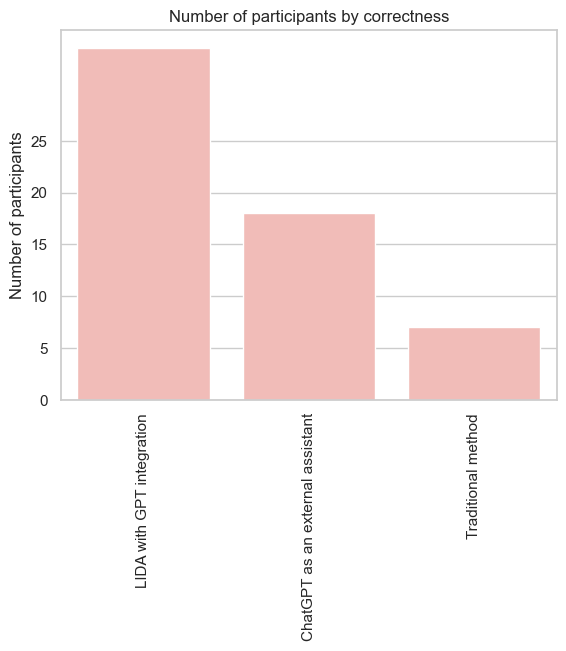

In [14]:
# Bar charts
for col in df.columns:
  bar_chart(df, col)

## Bar charts by gender

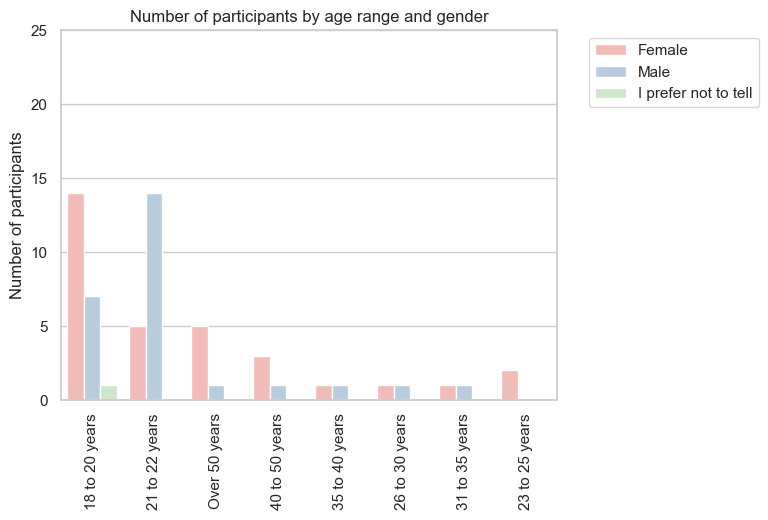

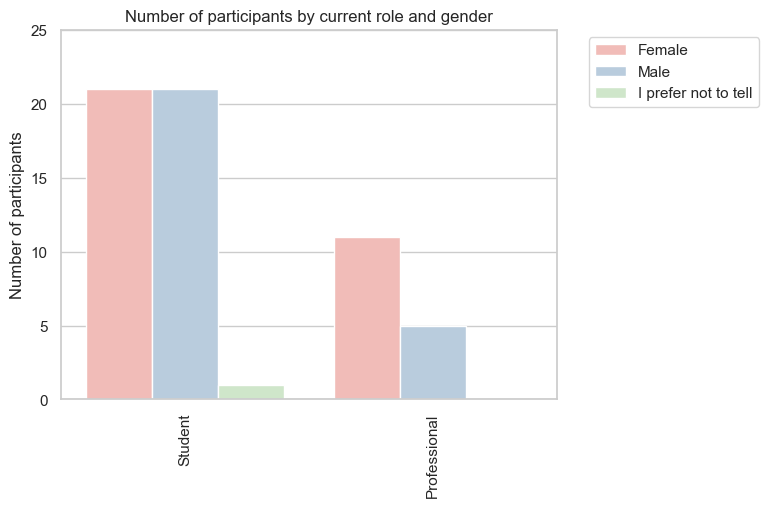

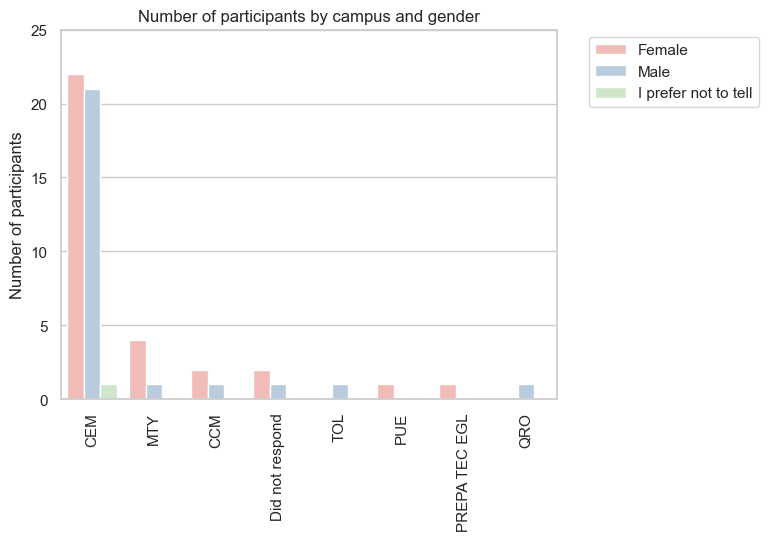

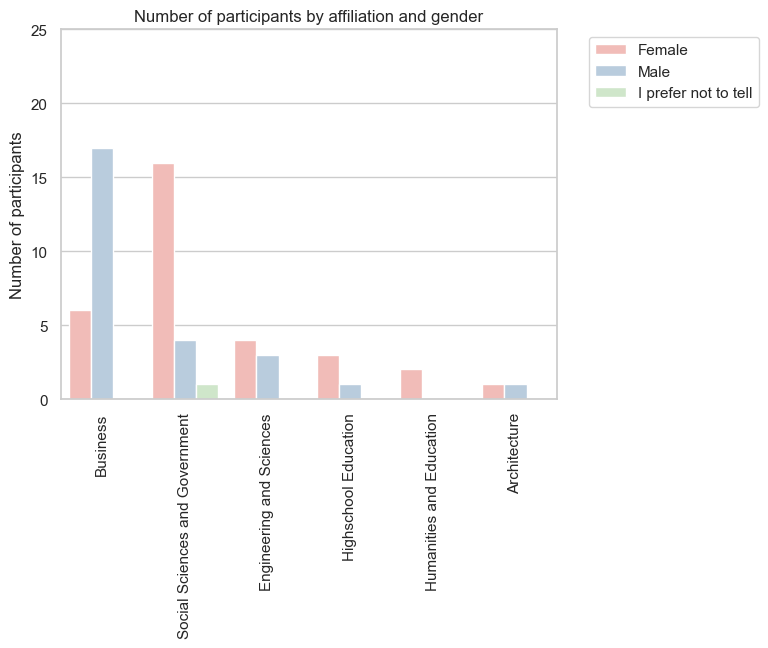

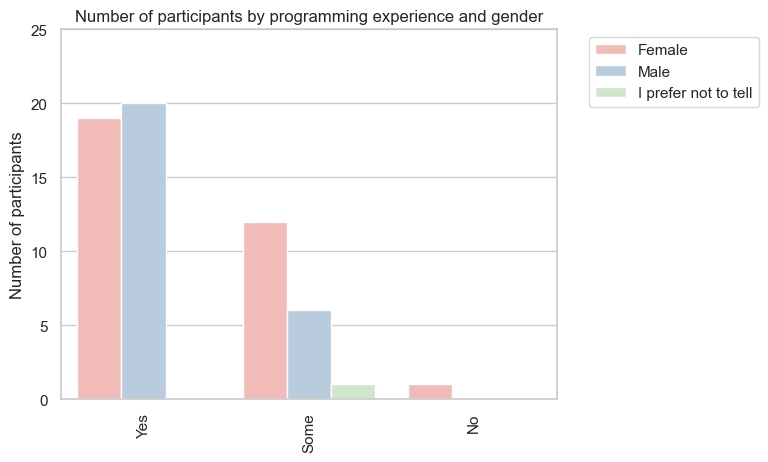

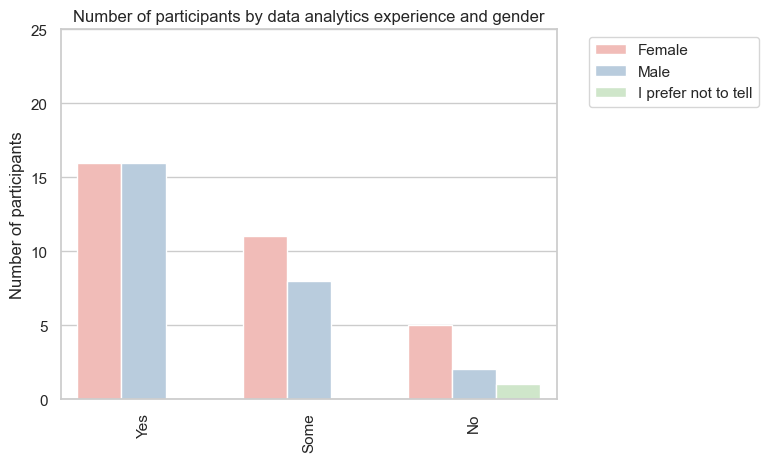

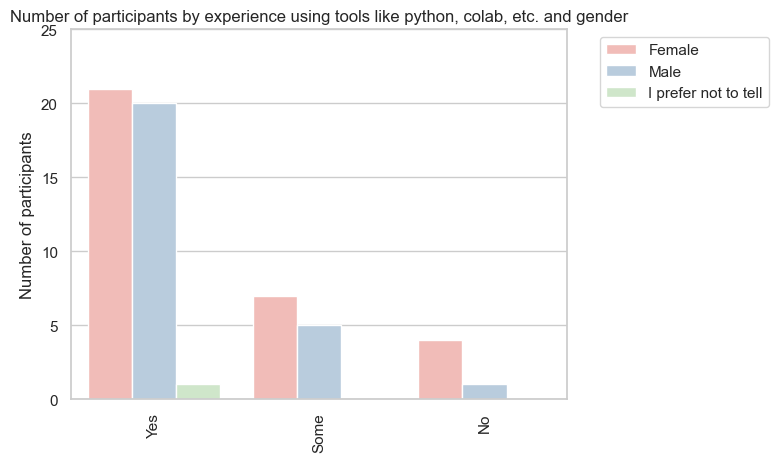

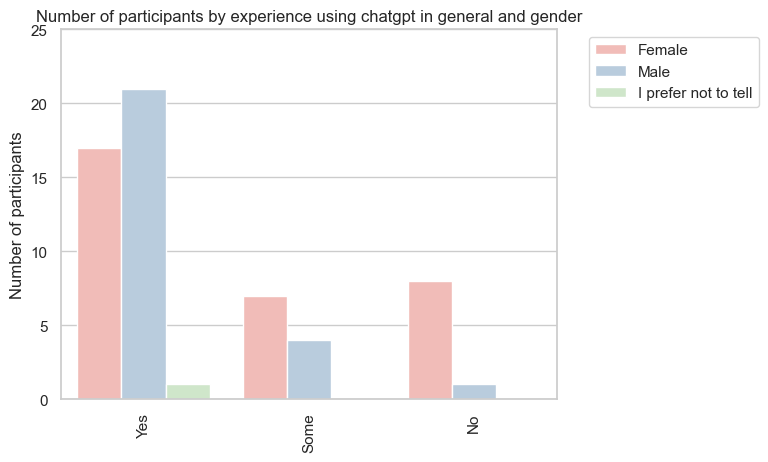

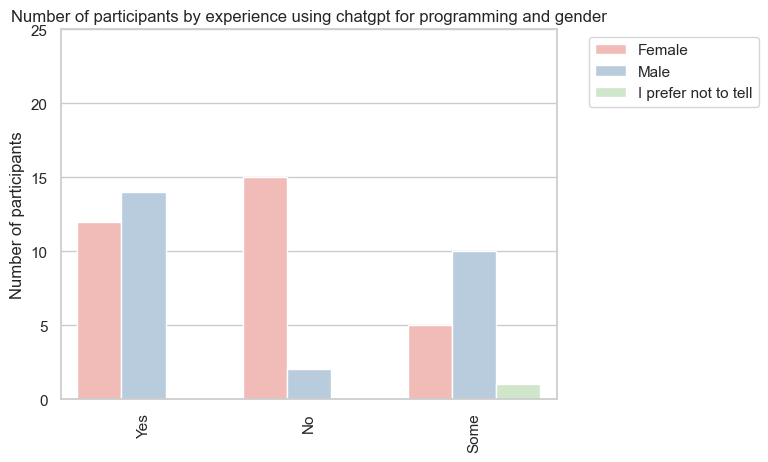

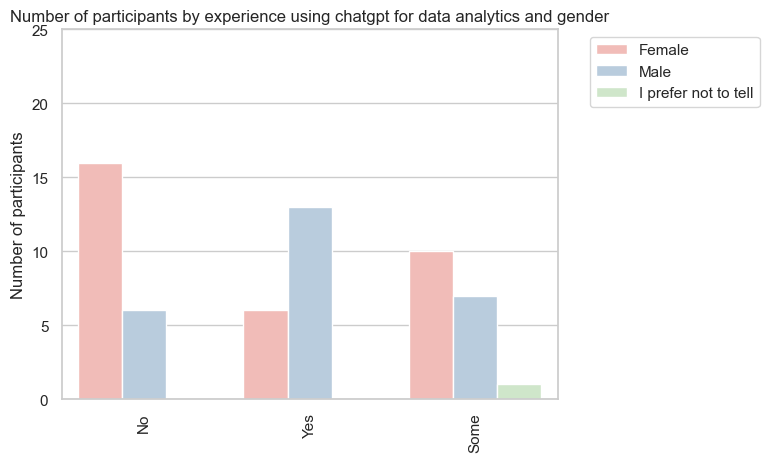

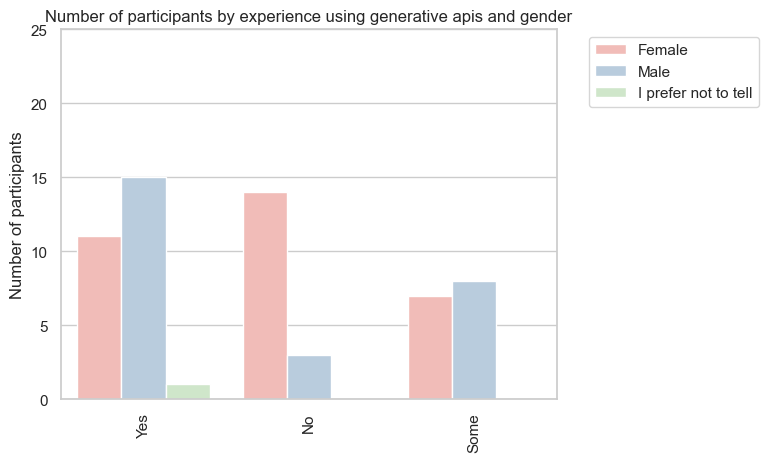

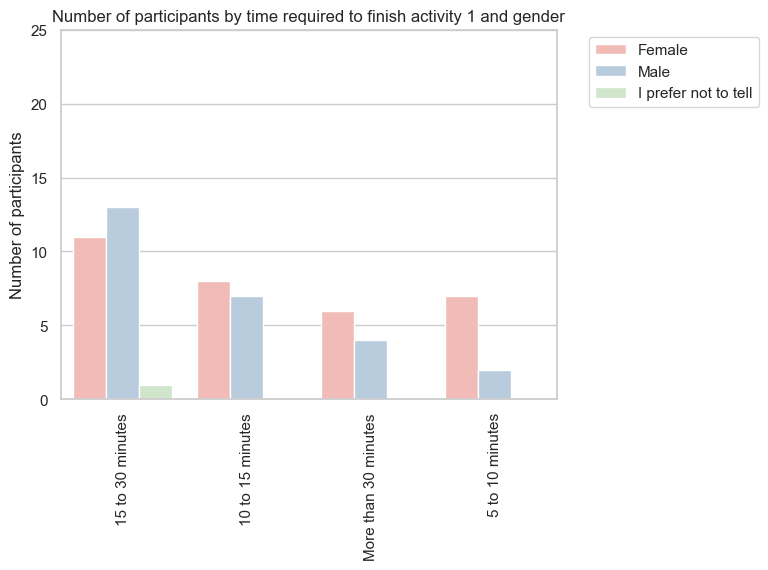

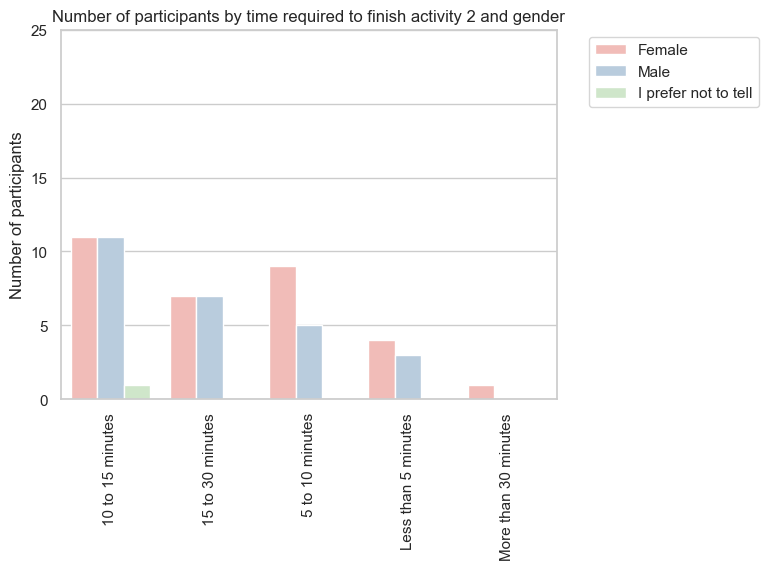

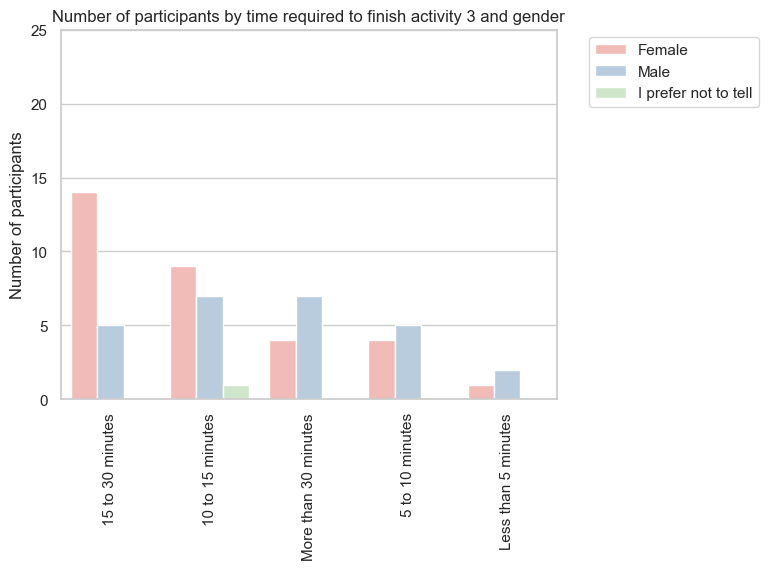

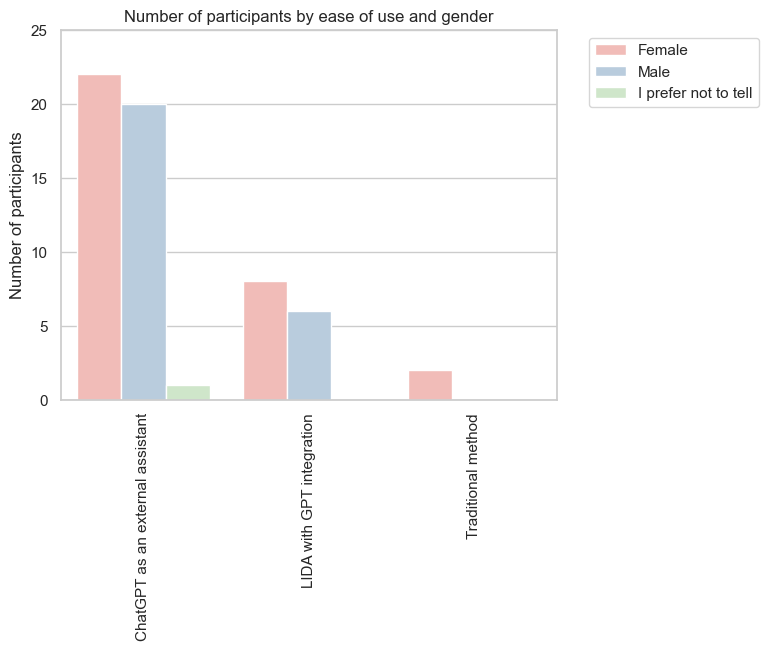

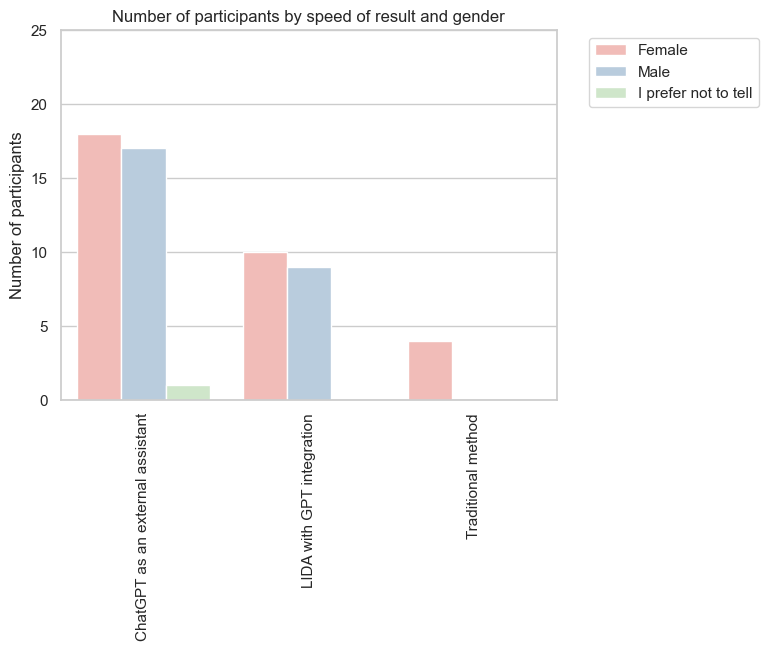

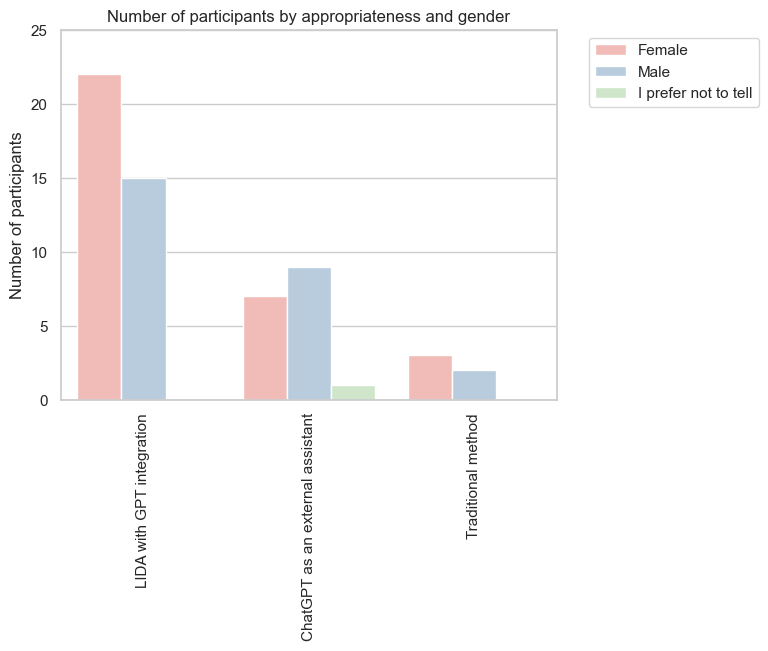

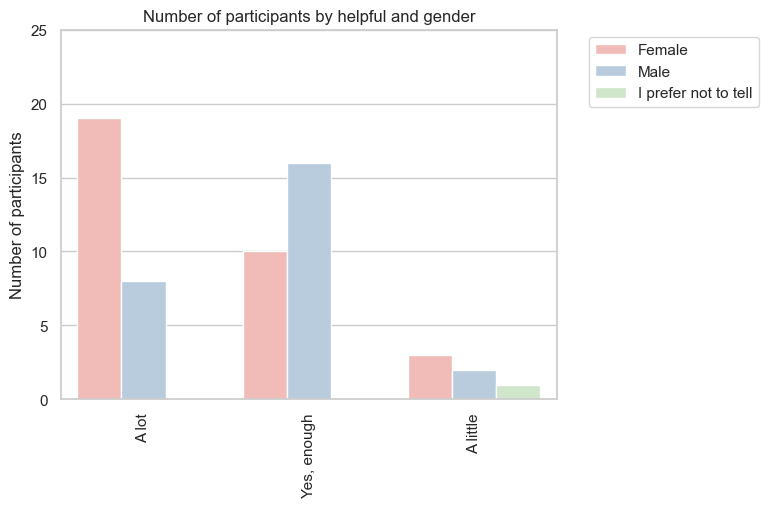

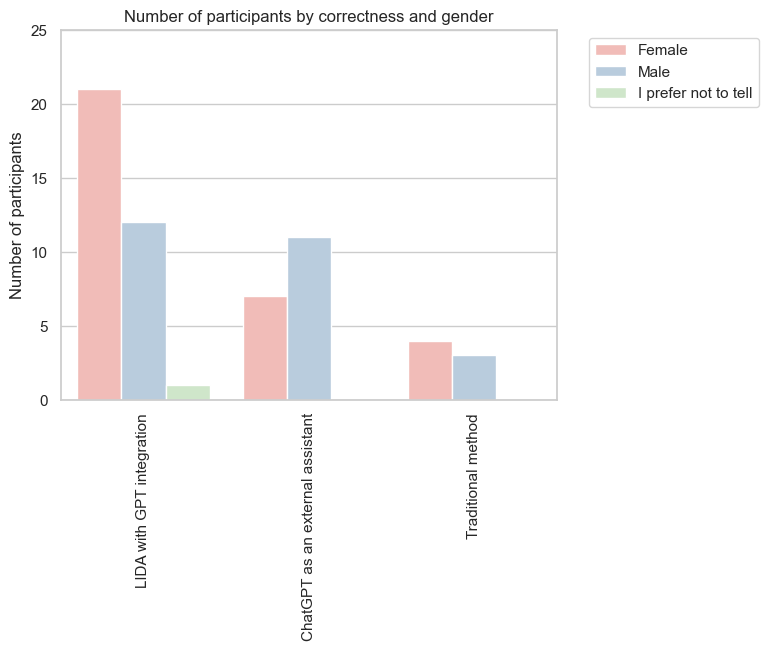

In [15]:
# Bar charts by gender

for col in df.columns.drop("Gender"):
  bar_chart_hue(df, col, "Gender")

## Bar charts by affiliation

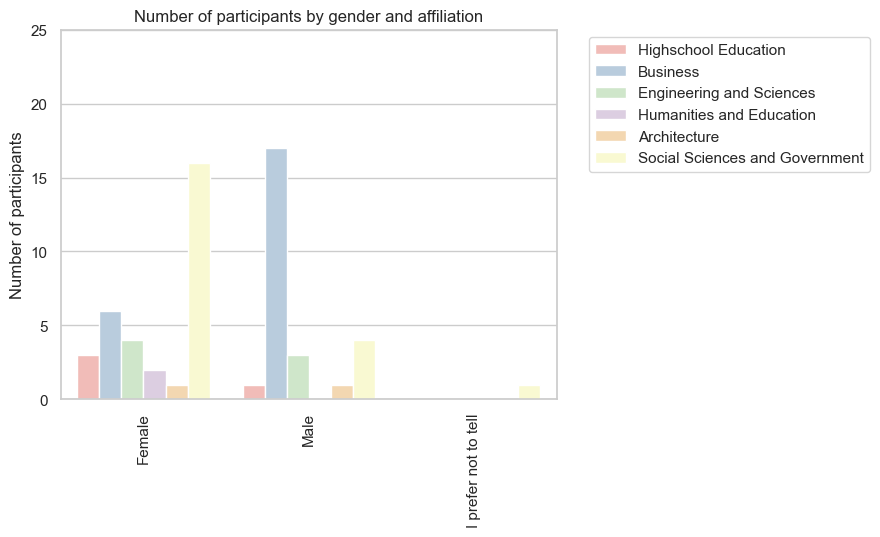

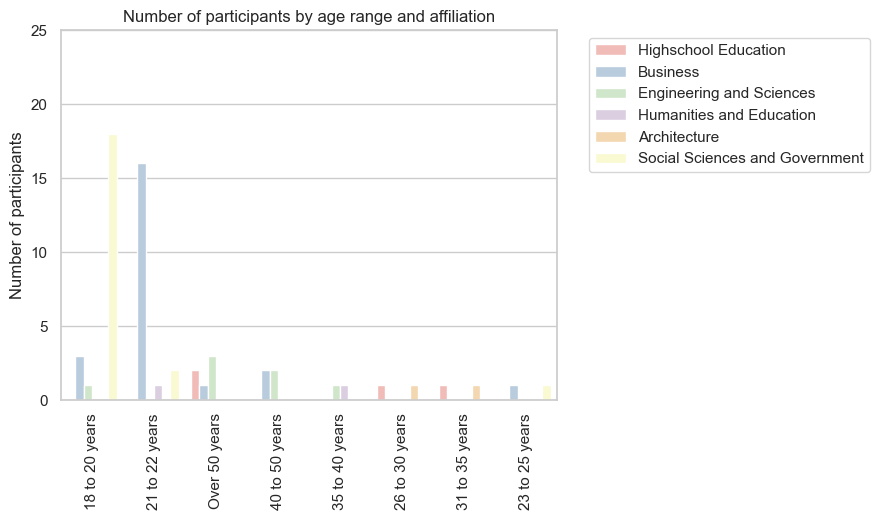

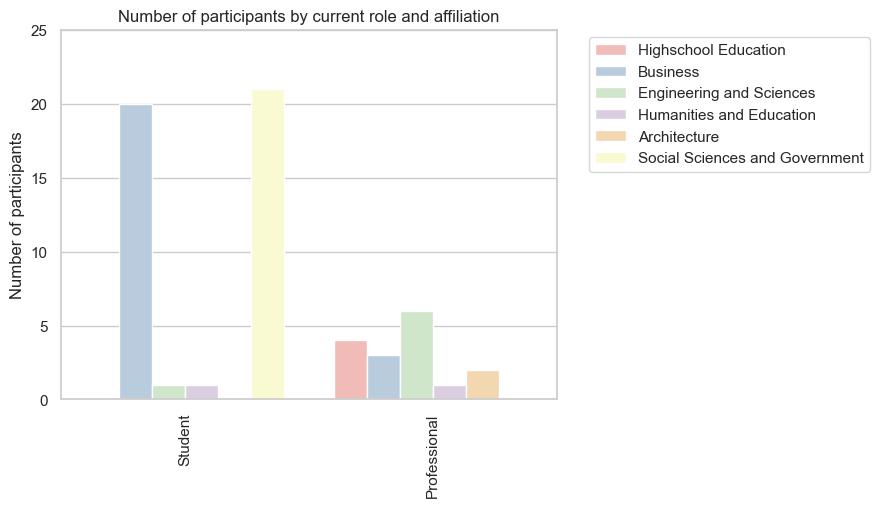

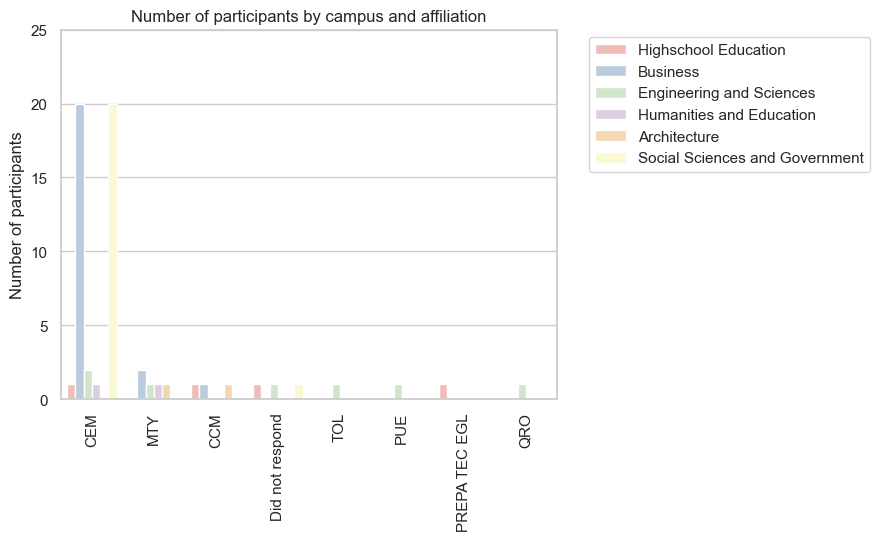

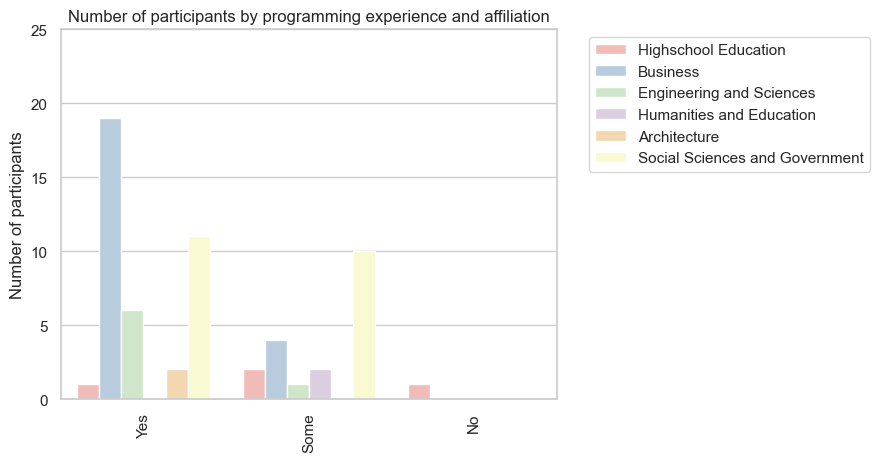

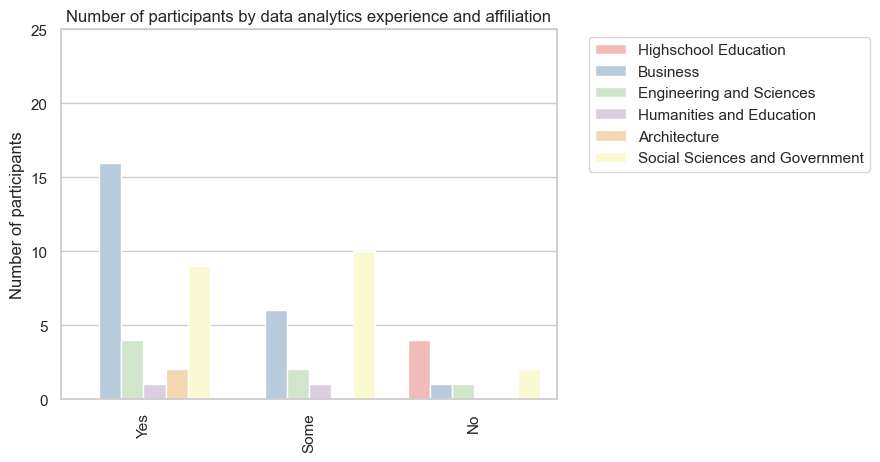

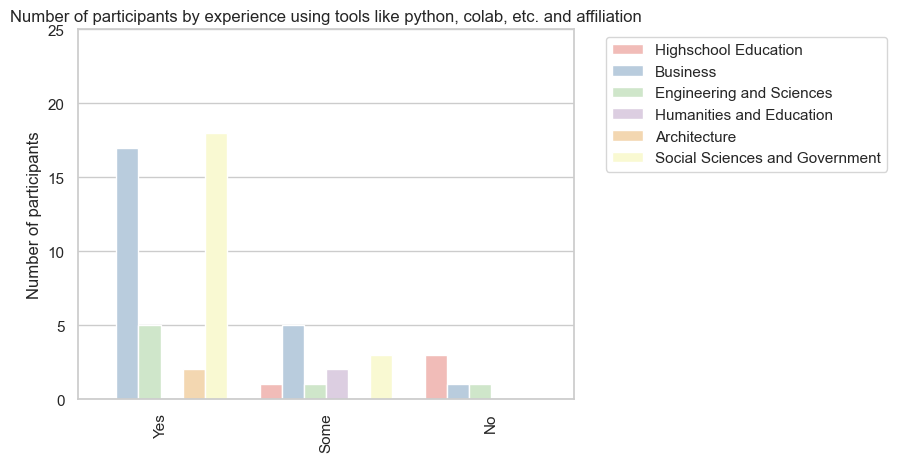

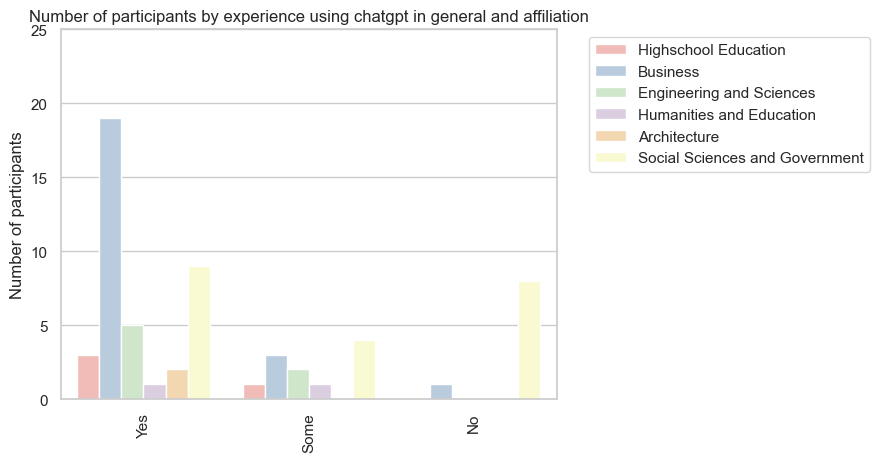

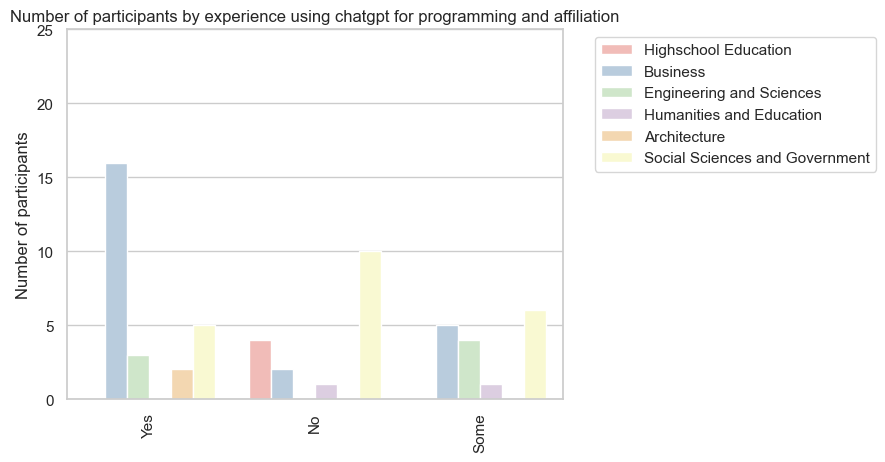

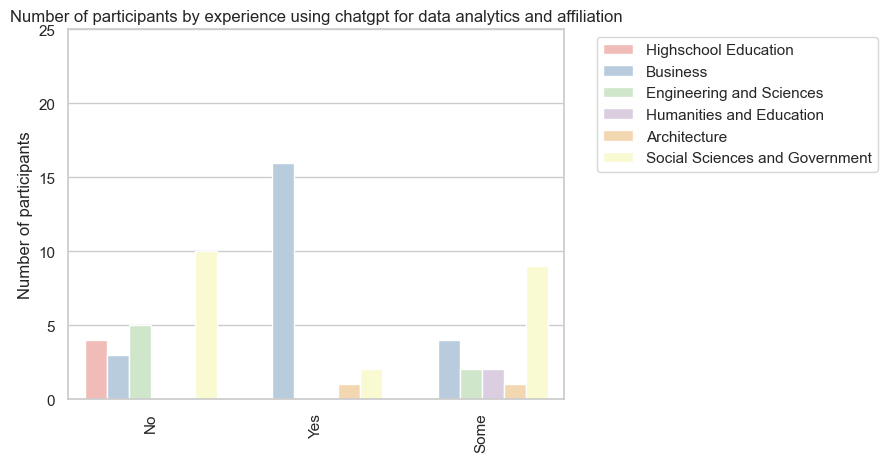

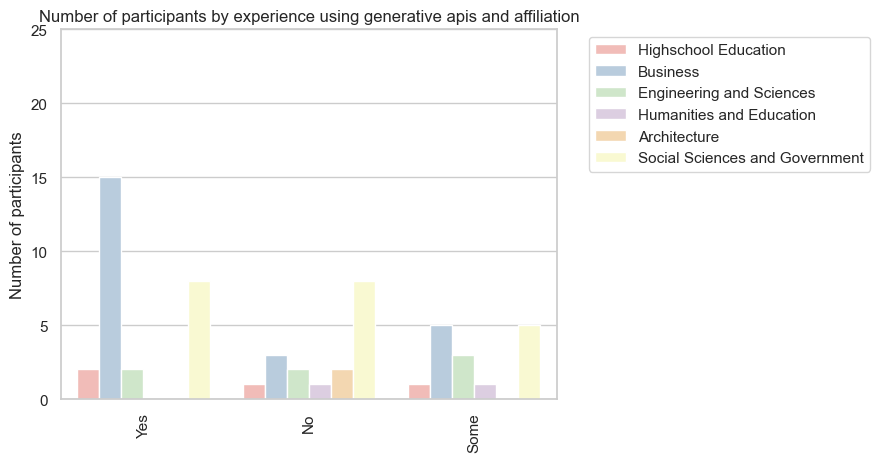

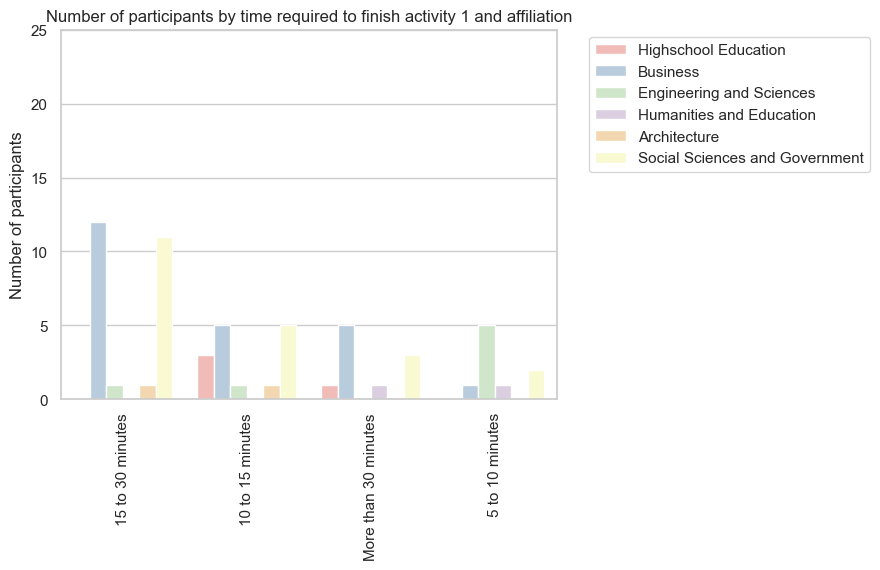

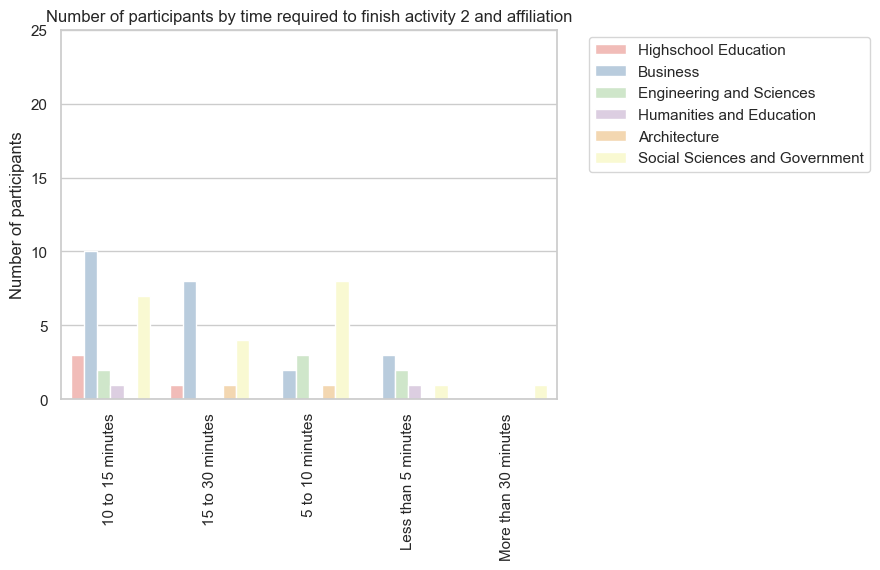

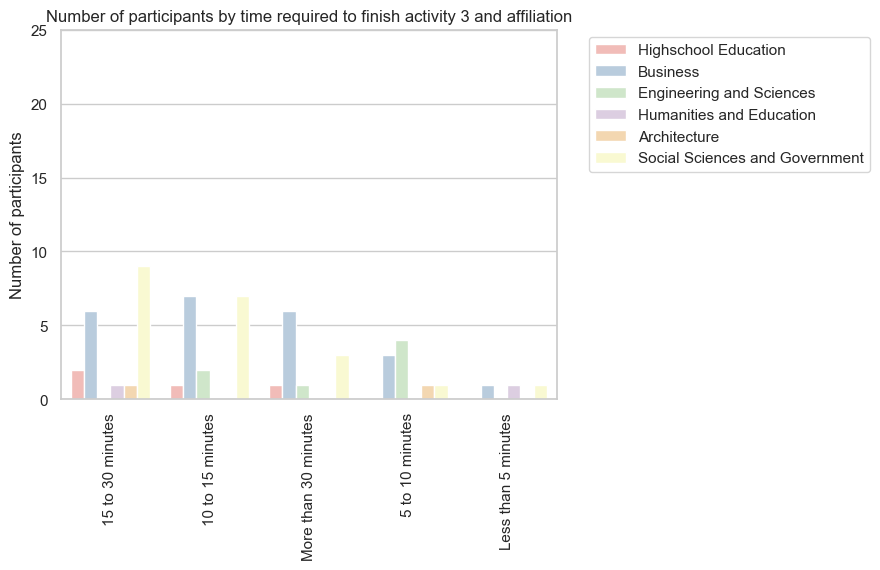

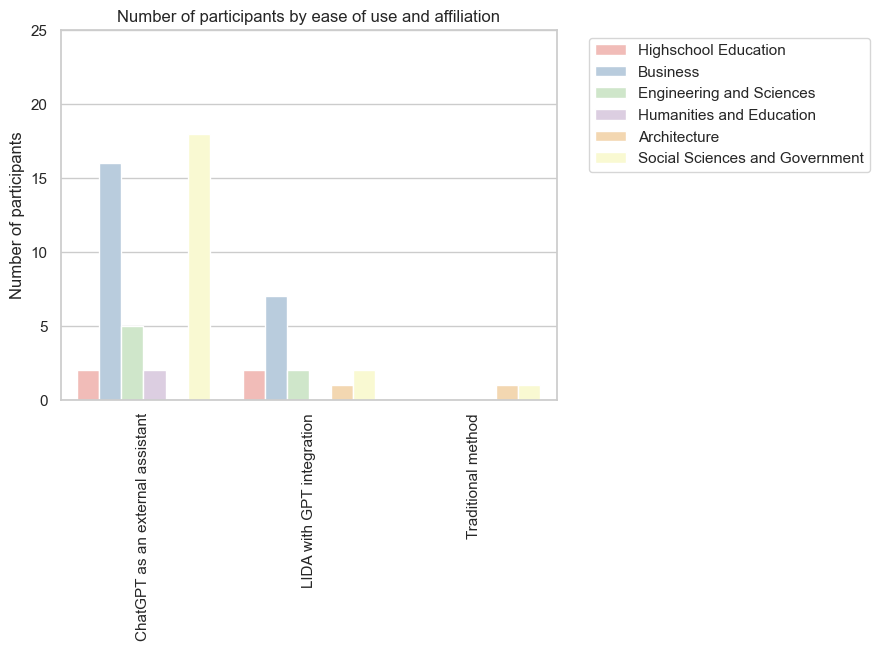

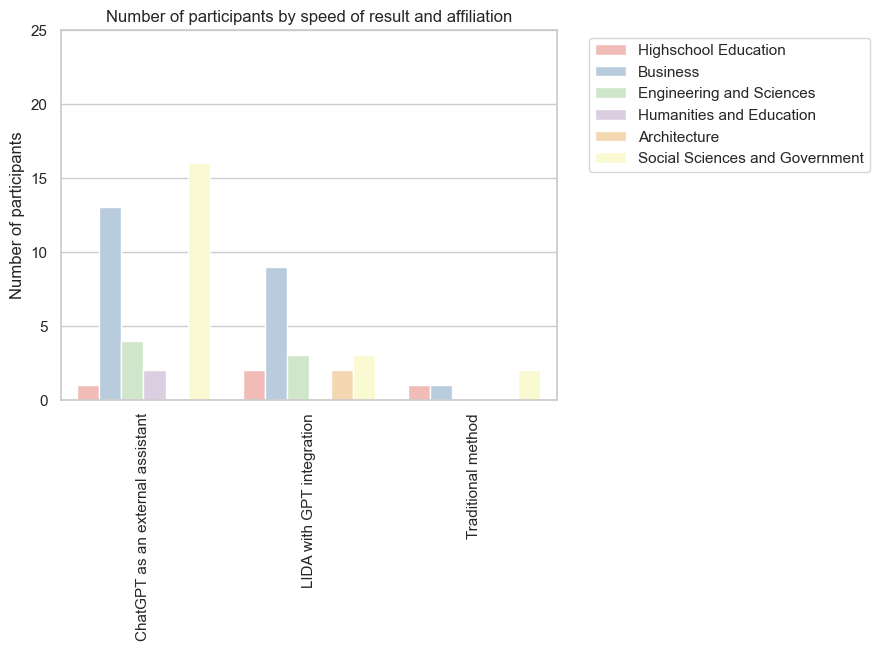

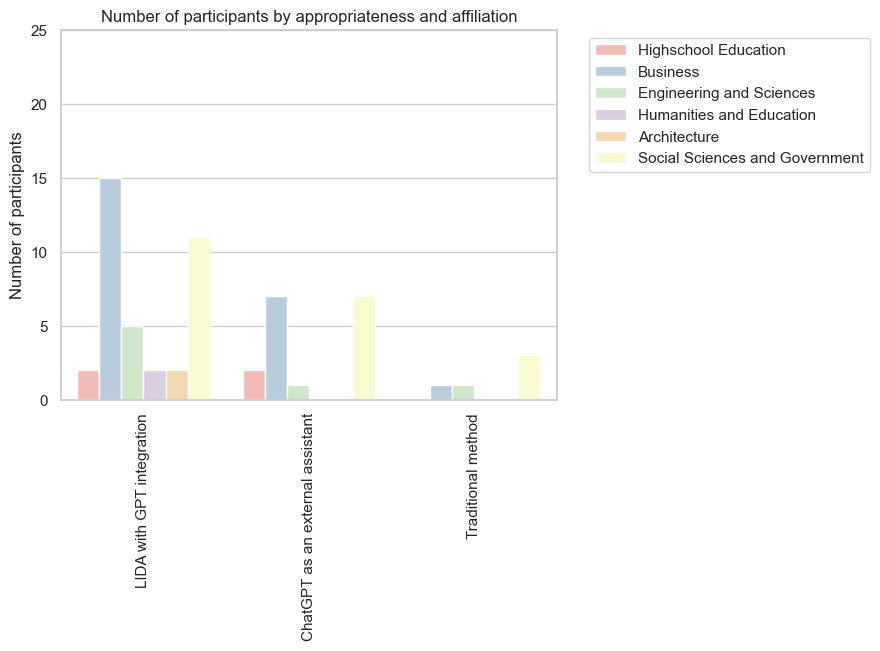

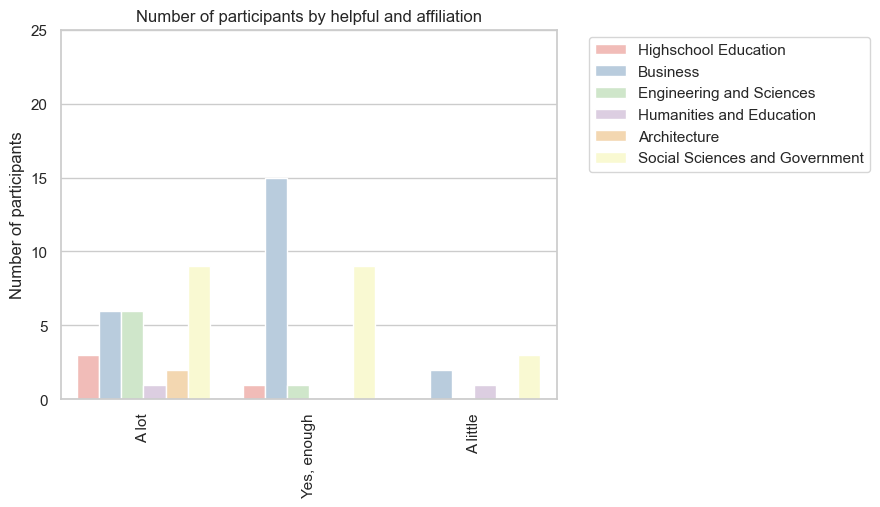

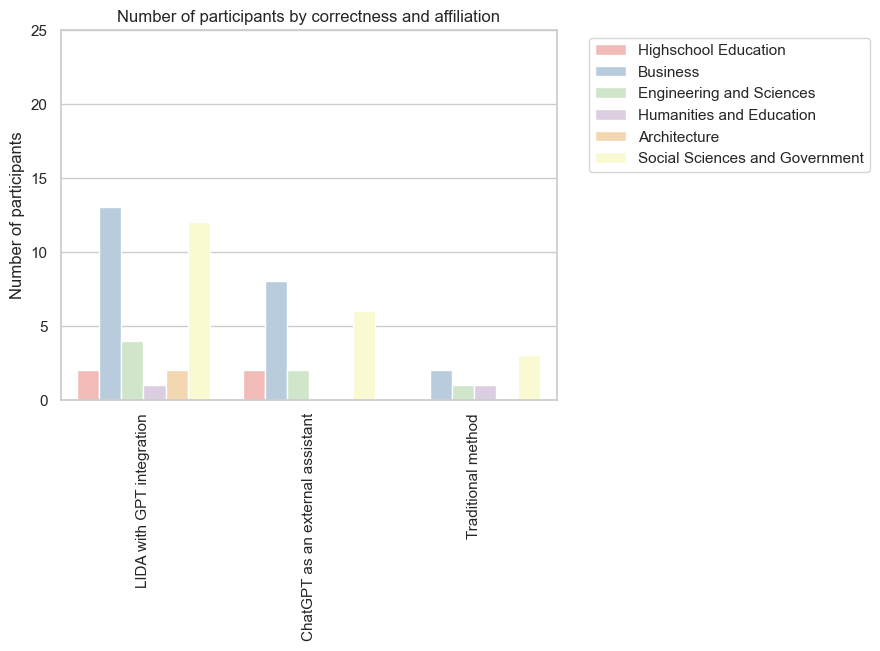

In [16]:
# Bar charts by Affiliation
for col in df.columns.drop("Affiliation"):
  bar_chart_hue(df, col, "Affiliation")

## Lollipop charts

In [117]:
def metrics_chart(df, column, column_colors, excluded, metrics, options, title=True, article_image=False):
    df_metrics = {}
    for value in df[column].unique():
        df_temp = df[df[column]==value].melt(value_vars=metrics, var_name="Metric", value_name="Answer").value_counts().reset_index().rename(columns={"count": "People"})
        for m in metrics:
            for o in options:
                if len(df_temp[(df_temp["Metric"] == m) & (df_temp["Answer"] == o)]) == 0:
                    df_temp = df_temp._append({"Metric": m, "Answer": o, "People": 0}, ignore_index=True)
                    df_temp["Metric"] = pd.Categorical(df_temp["Metric"], ordered=True, categories=metrics)
                    df_temp["Answer"] = pd.Categorical(df_temp["Answer"], ordered=True, categories=options)
                    df_temp = df_temp.sort_values(by=["Metric", "Answer"], ascending=False)
        df_metrics[value] = df_temp
    colors = {val:sns.color_palette("Set2").as_hex()[pos] for pos, val in enumerate(df_metrics[df[column][0]]["Metric"].unique())}

    fig = plt.figure(figsize=(14,10))
    plt_range = range(1, len(df_metrics[df[column][0]])+1)
    plt.hlines(y=plt_range, xmin=df_metrics[df[column].unique()[0]]["People"], xmax=df_metrics[df[column].unique()[1]]["People"], color=df_metrics[df[column][0]]["Metric"].apply(lambda x: colors[x]), linewidth=3)
    for i in range(1,len(metrics)):
        plt.axhline(y= i*len(metrics) + 0.5, color='black', linestyle='--', alpha=0.3, linewidth=3)
    for pos, val in enumerate(df[column].unique()):
        if val not in excluded:
            plt.scatter(df_metrics[val]["People"], plt_range, label=val, color=column_colors[pos], zorder=3)
    yticks = {'Traditional method': 'Approach 1', 'ChatGPT as an external assistant': 'Approach 2', 'LIDA with GPT integration': 'Approach 3', 'None':'None'}
    new_yticks = [yticks[answer] for answer in df_metrics[df[column].unique()[0]]["Answer"] ]
    print(new_yticks)
    print(plt_range)
    plt.yticks(plt_range, new_yticks)
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    # plt.yticks(plt_range, df_metrics[df[column].unique()[0]]["Answer"])
    plt.xlabel("Number of participants")
    lines = [Line2D([0], [0], color=colors[x], label = x, linewidth=3) for x in metrics]
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(lines + handles, metrics + labels, ncol=1, bbox_to_anchor=(1.01, 0.5), loc="center left", frameon=False, fontsize=15)
    # plt.title(f"Metrics evaluation by {column.lower()}" if title else "", fontsize=20)
    plt.tight_layout()
    plt.show()
    path = "Lollipop" if not article_image else "Journal"
    fig.savefig(f"images/{path}/Lollipop - Metrics evaluation by {column.lower()}.png", bbox_inches='tight')


['None', 'Approach 3', 'Approach 2', 'Approach 1', 'None', 'Approach 3', 'Approach 2', 'Approach 1', 'None', 'Approach 3', 'Approach 2', 'Approach 1', 'None', 'Approach 3', 'Approach 2', 'Approach 1']
range(1, 17)


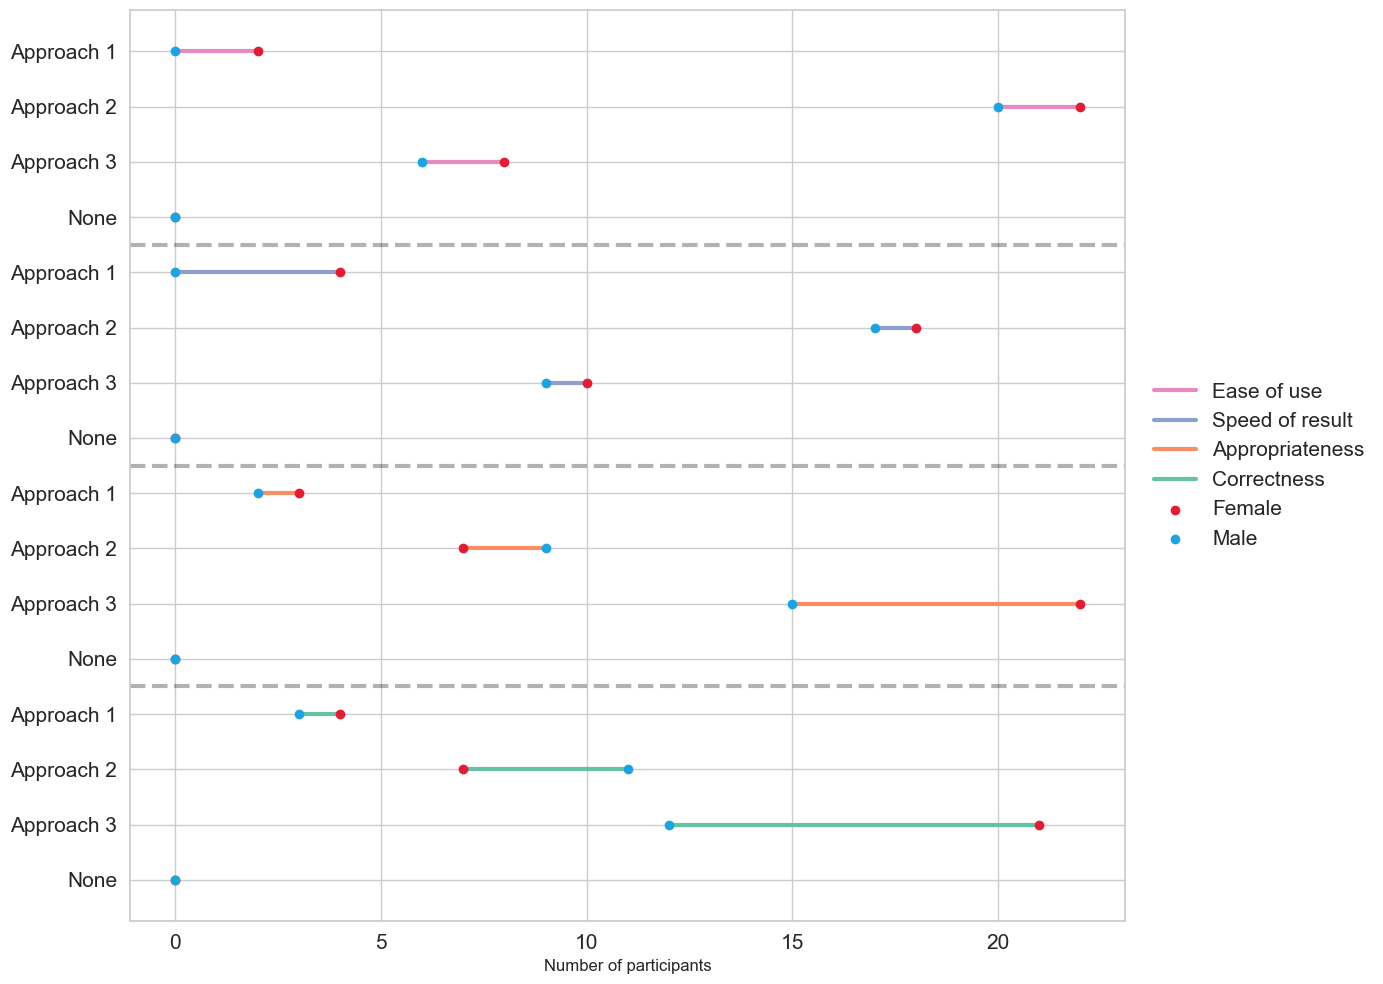

In [118]:
metrics = ["Ease of use", "Speed of result", "Appropriateness", "Correctness"]
options = ["Traditional method", "ChatGPT as an external assistant", "LIDA with GPT integration", "None"]
column_colors = ["#e31b33", "#1ba4e3"]
metrics_chart(df, "Gender", column_colors, ["I prefer not to tell"], metrics, options)

['None', 'Approach 3', 'Approach 2', 'Approach 1', 'None', 'Approach 3', 'Approach 2', 'Approach 1', 'None', 'Approach 3', 'Approach 2', 'Approach 1', 'None', 'Approach 3', 'Approach 2', 'Approach 1']
range(1, 17)


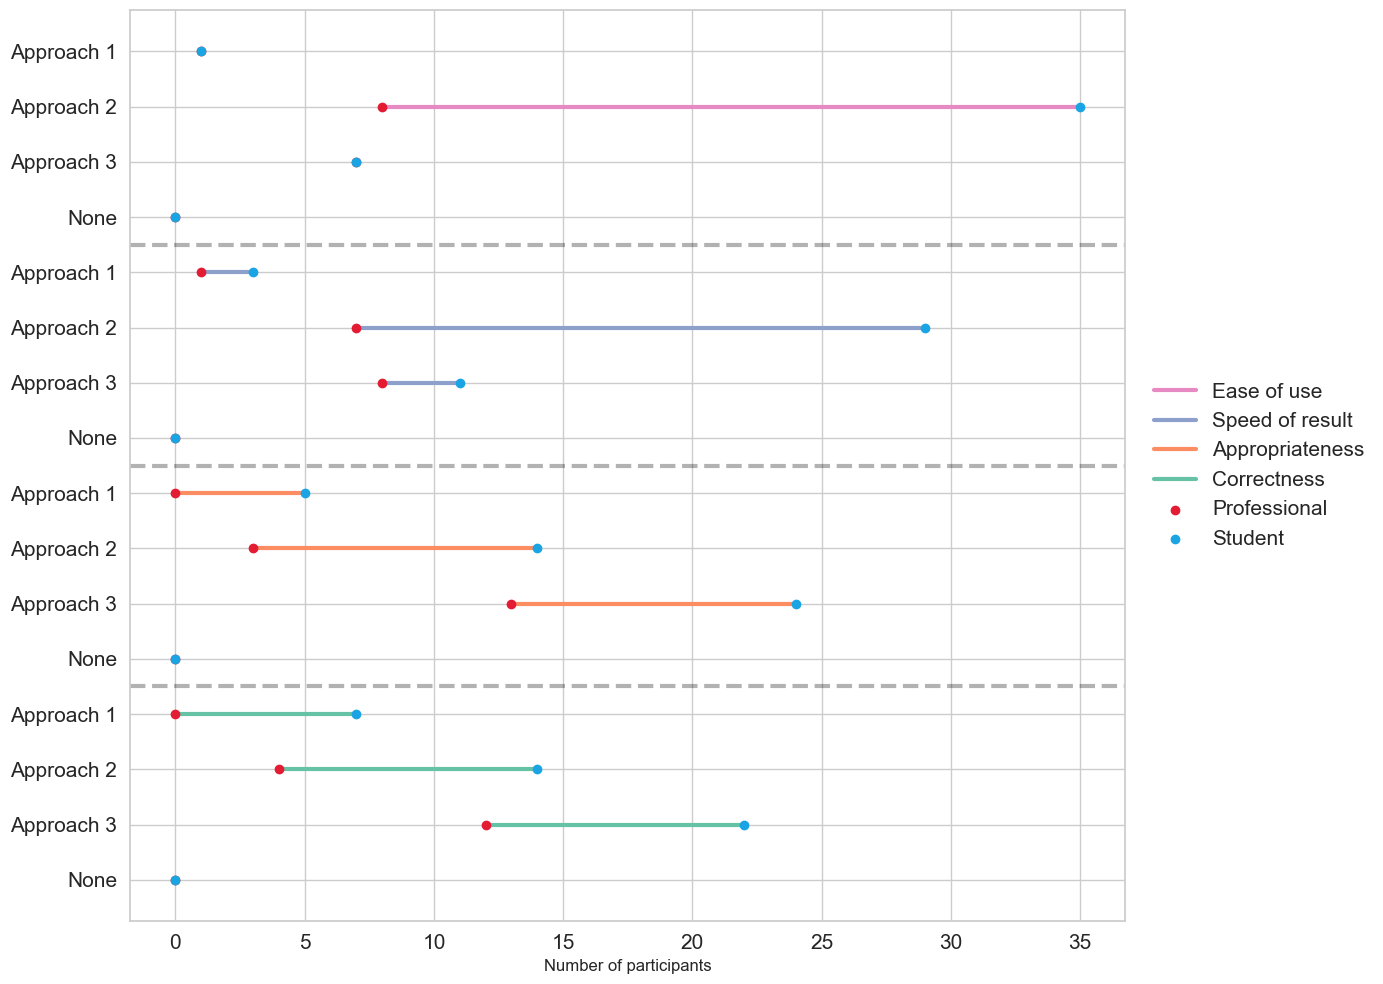

In [119]:
metrics_chart(df, "Current role", column_colors, [], metrics, options)

## Scatter plots

In [20]:
def scatter_plot(df, column, excluded, metrics, time_order):
    df_scatter = df.melt(id_vars=column,
                         value_vars=metrics,
                         var_name="Activity",
                         value_name="Time")
    df_scatter["Activity"] = df_scatter["Activity"].str.replace("Time required to finish ", "").str.title()
    df_scatter = df_scatter[~df_scatter[column].isin(excluded)]
    time_order = {activity: pos for pos, activity in enumerate(time_order)}
    df_scatter = df_scatter.sort_values(by=["Time"], key=lambda x: x.map(time_order))
    g = sns.catplot(data=df_scatter,
                    x=column,
                    y = "Time",
                    col="Activity",
                    kind="swarm",
                    height=5)
    g.set_axis_labels("", "Time required to finish the activity")
    g.set_titles("{col_name}")
    g.fig.suptitle(f"Time required to finish activities by {column.lower()}", y=1.05)
    plt.show()

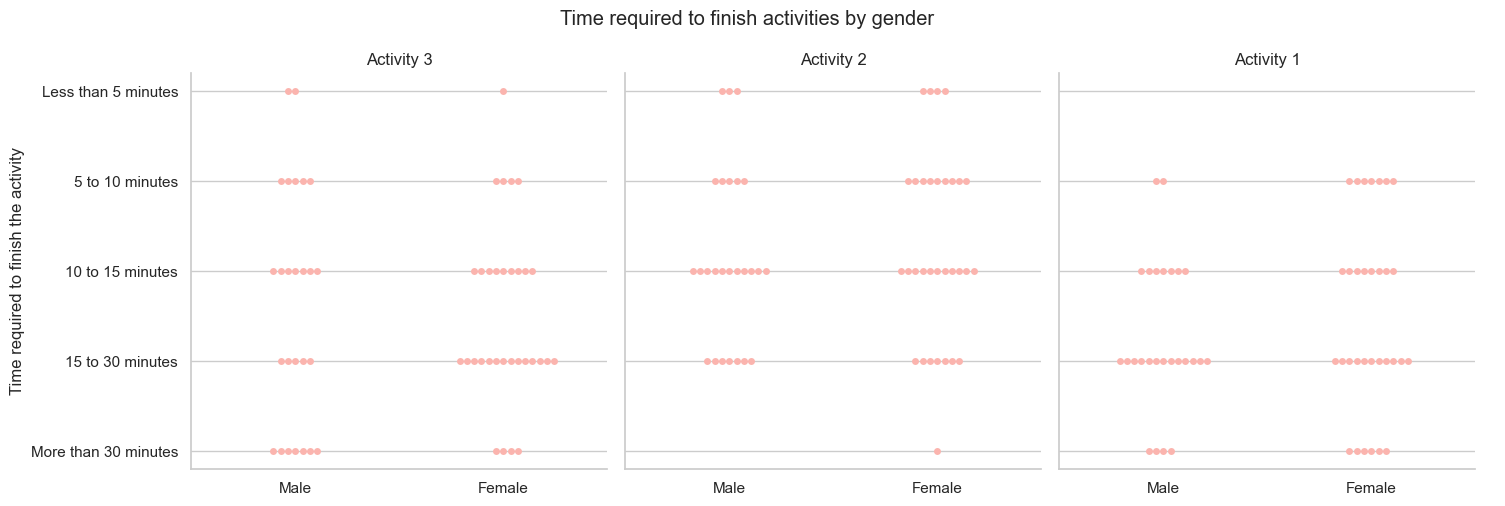

In [21]:
excluded = ["I prefer not to tell"]
metrics = ["Time required to finish activity 1", "Time required to finish activity 2", "Time required to finish activity 3"]
time_order = ["Less than 5 minutes", "5 to 10 minutes", "10 to 15 minutes", "15 to 30 minutes", "More than 30 minutes"]
scatter_plot(df, "Gender", excluded, metrics, time_order)

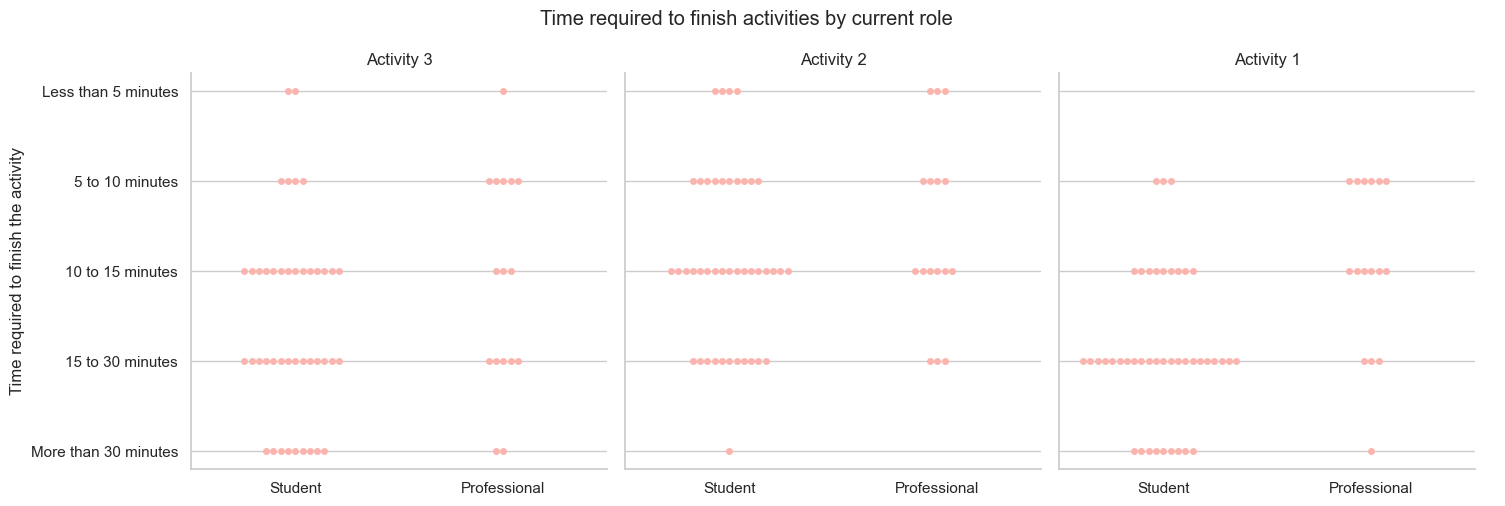

In [22]:
metrics = ["Time required to finish activity 1", "Time required to finish activity 2", "Time required to finish activity 3"]
scatter_plot(df, "Current role", [], metrics, time_order)

## Radar charts

In [23]:
metrics = ["Ease of use", "Speed of result", "Appropriateness", "Correctness"]
df_metrics = df.melt(value_vars=metrics, var_name="Metric", value_name="Answer").value_counts().reset_index().rename(columns={"count": "People"})
df_metrics = df_metrics.sort_values(by=["Metric", "Answer"], ascending=False)
min = df_metrics["People"].min()
max = df_metrics["People"].max()

ranges = [min, max]

df_metrics_filtered = df_metrics[~df_metrics["Answer"].isin(['None'])]
answers = df_metrics_filtered["Answer"].unique()
metrics = df_metrics_filtered["Metric"].unique()

fig = go.Figure()
for answer in answers:
    fig.add_trace(go.Scatterpolar(
        r=df_metrics_filtered[df_metrics_filtered["Answer"]==answer]["People"],
        theta=metrics,
        fill='toself',
        name=answer
        ))

fig.update_layout(
    title=f"Metric evaluation for participants",
    legend_title="Answer",
    width=1100,
    height=800,
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=ranges
        )),
    showlegend=True,    
    )

fig.show()
fig.write_image(f"images/Radar/Radar - Metric evaluation for participants.png")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8436\106641389.py:13: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



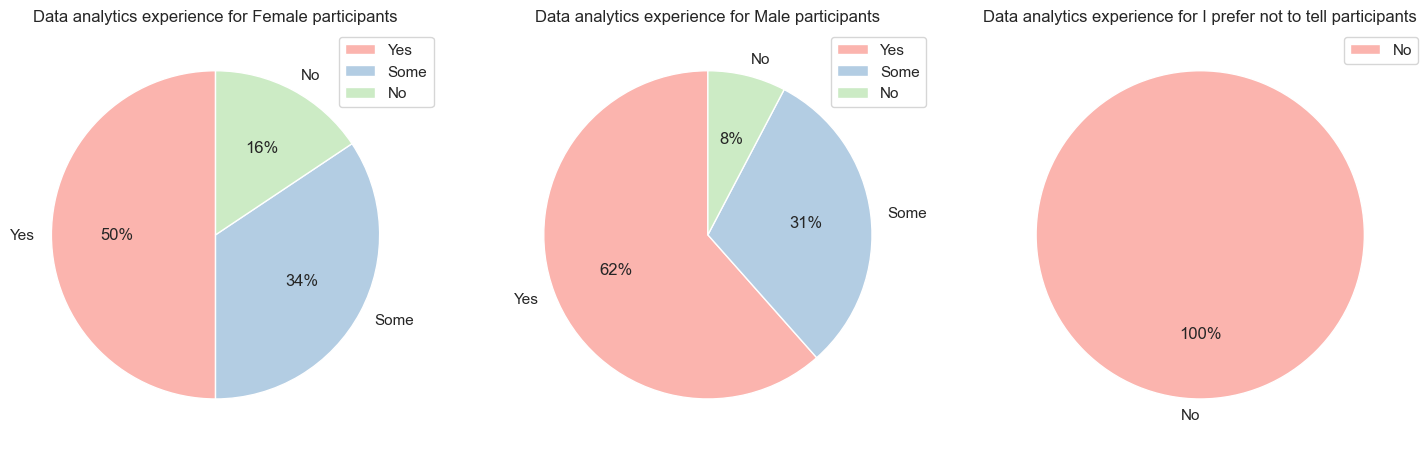

In [24]:
programming_exp_gender = df.groupby('Gender')['Data analytics experience'].value_counts().fillna(0).reset_index()

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for idx, gender in enumerate(df["Gender"].unique()):
    df_pie = programming_exp_gender.query(f'Gender == "{gender}"')
    labels = df_pie['Data analytics experience']
    values = df_pie['count']

    ax[idx].pie(values, labels=labels, startangle=90, autopct='%1.0f%%')
    ax[idx].set_title(f"Data analytics experience for {gender} participants")
    ax[idx].legend(loc='upper right', bbox_to_anchor=(1.05, 1))
fig.show()
fig.savefig("images/Pie/Pie - Data analytics experience for participants by gender.png")

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8436\3875204131.py:13: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



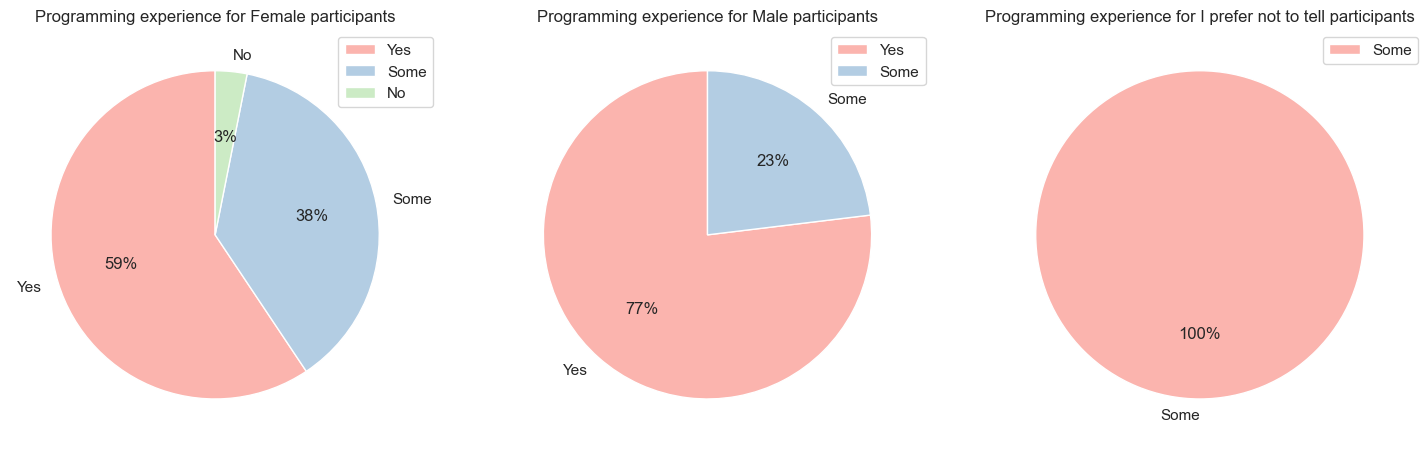

In [25]:
programming_exp_gender = df.groupby('Gender')['Programming experience'].value_counts().fillna(0).reset_index()

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for idx, gender in enumerate(df["Gender"].unique()):
    df_pie = programming_exp_gender.query(f'Gender == "{gender}"')
    labels = df_pie['Programming experience']
    values = df_pie['count']

    ax[idx].pie(values, labels=labels, startangle=90, autopct='%1.0f%%')
    ax[idx].set_title(f"Programming experience for {gender} participants")
    ax[idx].legend(loc='upper right', bbox_to_anchor=(1.05, 1))
fig.show()
fig.savefig("images/Pie/Pie - Programming experience for participants by gender.png")

## Time required to finish the activities

In [26]:
display(df['Time required to finish activity 1'].value_counts(normalize=True))
display(df['Time required to finish activity 2'].value_counts(normalize=True))
display(df['Time required to finish activity 3'].value_counts(normalize=True))

Time required to finish activity 1
15 to 30 minutes        0.423729
10 to 15 minutes        0.254237
More than 30 minutes    0.169492
5 to 10 minutes         0.152542
Name: proportion, dtype: float64

Time required to finish activity 2
10 to 15 minutes        0.389831
15 to 30 minutes        0.237288
5 to 10 minutes         0.237288
Less than 5 minutes     0.118644
More than 30 minutes    0.016949
Name: proportion, dtype: float64

Time required to finish activity 3
15 to 30 minutes        0.322034
10 to 15 minutes        0.288136
More than 30 minutes    0.186441
5 to 10 minutes         0.152542
Less than 5 minutes     0.050847
Name: proportion, dtype: float64

In [27]:
display(df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])['Time required to finish activity 1'].value_counts())
display(df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])['Time required to finish activity 2'].value_counts())
display(df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])['Time required to finish activity 3'].value_counts())

Gender  Programming experience  Time required to finish activity 1
Female  No                      10 to 15 minutes                      1
        Some                    More than 30 minutes                  4
                                10 to 15 minutes                      3
                                15 to 30 minutes                      3
                                5 to 10 minutes                       2
        Yes                     15 to 30 minutes                      8
                                5 to 10 minutes                       5
                                10 to 15 minutes                      4
                                More than 30 minutes                  2
Male    Some                    15 to 30 minutes                      5
                                More than 30 minutes                  1
        Yes                     15 to 30 minutes                      8
                                10 to 15 minutes                     

Gender  Programming experience  Time required to finish activity 2
Female  No                      15 to 30 minutes                      1
        Some                    10 to 15 minutes                      7
                                15 to 30 minutes                      2
                                5 to 10 minutes                       1
                                Less than 5 minutes                   1
                                More than 30 minutes                  1
        Yes                     5 to 10 minutes                       8
                                10 to 15 minutes                      4
                                15 to 30 minutes                      4
                                Less than 5 minutes                   3
Male    Some                    10 to 15 minutes                      2
                                15 to 30 minutes                      2
                                5 to 10 minutes                      

Gender  Programming experience  Time required to finish activity 3
Female  No                      15 to 30 minutes                      1
        Some                    15 to 30 minutes                      6
                                10 to 15 minutes                      3
                                More than 30 minutes                  2
                                Less than 5 minutes                   1
        Yes                     15 to 30 minutes                      7
                                10 to 15 minutes                      6
                                5 to 10 minutes                       4
                                More than 30 minutes                  2
Male    Some                    10 to 15 minutes                      2
                                More than 30 minutes                  2
                                15 to 30 minutes                      1
                                5 to 10 minutes                      

In [28]:
display(df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])['Time required to finish activity 1'].value_counts(normalize=True))
display(df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])['Time required to finish activity 2'].value_counts(normalize=True))
display(df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])['Time required to finish activity 3'].value_counts(normalize=True))

Gender  Programming experience  Time required to finish activity 1
Female  No                      10 to 15 minutes                      1.000000
        Some                    More than 30 minutes                  0.333333
                                10 to 15 minutes                      0.250000
                                15 to 30 minutes                      0.250000
                                5 to 10 minutes                       0.166667
        Yes                     15 to 30 minutes                      0.421053
                                5 to 10 minutes                       0.263158
                                10 to 15 minutes                      0.210526
                                More than 30 minutes                  0.105263
Male    Some                    15 to 30 minutes                      0.833333
                                More than 30 minutes                  0.166667
        Yes                     15 to 30 minutes                

Gender  Programming experience  Time required to finish activity 2
Female  No                      15 to 30 minutes                      1.000000
        Some                    10 to 15 minutes                      0.583333
                                15 to 30 minutes                      0.166667
                                5 to 10 minutes                       0.083333
                                Less than 5 minutes                   0.083333
                                More than 30 minutes                  0.083333
        Yes                     5 to 10 minutes                       0.421053
                                10 to 15 minutes                      0.210526
                                15 to 30 minutes                      0.210526
                                Less than 5 minutes                   0.157895
Male    Some                    10 to 15 minutes                      0.333333
                                15 to 30 minutes                

Gender  Programming experience  Time required to finish activity 3
Female  No                      15 to 30 minutes                      1.000000
        Some                    15 to 30 minutes                      0.500000
                                10 to 15 minutes                      0.250000
                                More than 30 minutes                  0.166667
                                Less than 5 minutes                   0.083333
        Yes                     15 to 30 minutes                      0.368421
                                10 to 15 minutes                      0.315789
                                5 to 10 minutes                       0.210526
                                More than 30 minutes                  0.105263
Male    Some                    10 to 15 minutes                      0.333333
                                More than 30 minutes                  0.333333
                                15 to 30 minutes                

## Radar plots

In [29]:
for activity in [f'Time required to finish activity {i}' for i in range(1, 4)]:
    ranges = [0, 16]
    df_activity_general = df.query('Gender != "I prefer not to tell"').groupby(['Data analytics experience'])[activity].value_counts().reset_index()

    answers = df_activity_general["Data analytics experience"].unique()
    metrics = df_activity_general[activity].unique()

    fig = go.Figure()
    for answer in answers:
        fig.add_trace(go.Scatterpolar(
                r=df_activity_general[df_activity_general["Data analytics experience"]==answer]["count"],
                theta=metrics,
                fill='toself',
                name=answer
        ))

    fig.update_layout(
    title=f"{activity} based on Data analytics experience",
    legend_title="Answer",
    width=700,
    height=600,
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=ranges
        )),
    showlegend=True
    )

    fig.show()
    fig.write_image(f"images/Radar/Radar - {activity} based on Data analytics experience.png")


In [30]:
for activity in [f'Time required to finish activity {i}' for i in range(1, 4)]:
    ranges = [0, 16]
    df_activity_general = df.query('Gender != "I prefer not to tell"').groupby(['Programming experience'])[activity].value_counts().reset_index()

    answers = df_activity_general["Programming experience"].unique()
    metrics = df_activity_general[activity].unique()

    fig = go.Figure()
    for answer in answers:
        fig.add_trace(go.Scatterpolar(
                r=df_activity_general[df_activity_general["Programming experience"]==answer]["count"],
                theta=metrics,
                fill='toself',
                name=answer
        ))

    fig.update_layout(
    title=f"{activity} based on programming experience",
    legend_title="Answer",
    width=700,
    height=600,
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=ranges
        )),
    showlegend=True
    )

    fig.show()
    fig.write_image(f"images/Radar/Radar - {activity} based on programming experience.png")
        

In [31]:
for activity in [f'Time required to finish activity {i}' for i in range(1, 4)]:
  ranges = [0, 7]
  df_activity = df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Data analytics experience'])[activity].value_counts().reset_index()

  for gender in df_activity["Gender"].unique():

    df_filtered = df_activity.query(f'Gender == "{gender}"')
    answers = df_filtered["Data analytics experience"].unique()
    metrics = df_filtered[activity].unique()

    fig = go.Figure()
    for answer in answers:
      fig.add_trace(go.Scatterpolar(
            r=df_filtered[df_filtered["Data analytics experience"]==answer]["count"],
            theta=metrics,
            fill='toself',
            name=answer
      ))

    fig.update_layout(
      title=f"{activity} for {gender} participants based on\n Data analytics experience",
      legend_title="Answer",
      width=850,
      height=600,
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=ranges
        )),
      showlegend=True
    )

    fig.show()
    fig.write_image(f"images/Radar/Radar - {activity} for {gender} participants based on Data analytics experience.png")


In [32]:
for activity in [f'Time required to finish activity {i}' for i in range(1, 4)]:
  ranges = [0, 9]
  df_activity = df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])[activity].value_counts().reset_index()

  for gender in df_activity["Gender"].unique():

    df_filtered = df_activity.query(f'Gender == "{gender}"')
    answers = df_filtered["Programming experience"].unique()
    metrics = df_filtered[activity].unique()

    fig = go.Figure()
    for answer in answers:
      fig.add_trace(go.Scatterpolar(
            r=df_filtered[df_filtered["Programming experience"]==answer]["count"],
            theta=metrics,
            fill='toself',
            name=answer
      ))

    fig.update_layout(
      title=f"{activity} for {gender} participants based\n on programming experience",
      legend_title="Answer",
      width=700,
      height=600,
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=ranges
        )),
      showlegend=True
    )

    fig.show()
    fig.write_image(f"images/Radar/Radar - {activity} for {gender} participants based on programming experience.png")

## Box plots

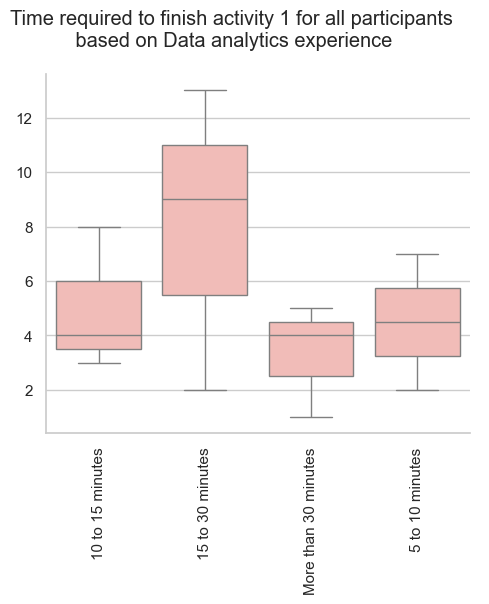

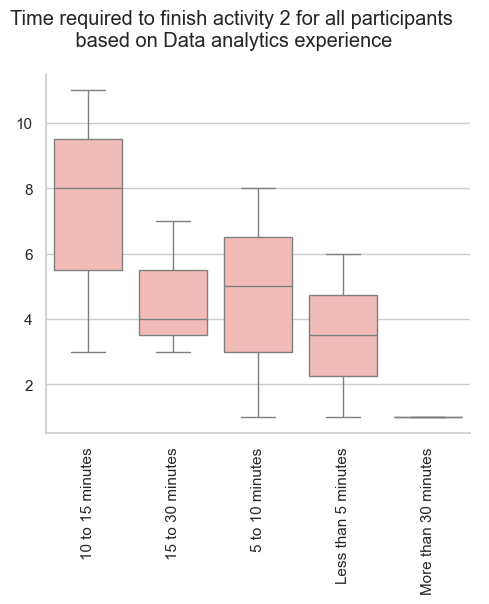

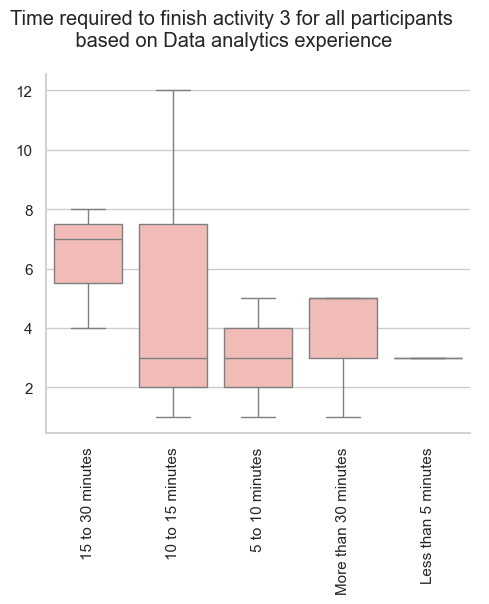

In [33]:
for activity in [f'Time required to finish activity {i}' for i in range(1, 4)]:
    df_activity = df.query('Gender != "I prefer not to tell"').groupby(['Data analytics experience'])[activity].value_counts().reset_index().rename(columns={'count': 'Count'})
    g = sns.catplot(data=df_activity, x=activity, y='Count', kind='box')
    g.set_xticklabels(rotation=90)
    g.figure.suptitle(f'{activity} for all participants\n based on Data analytics experience')
    g.figure.subplots_adjust(top=0.85)
    g.set_ylabels("")
    g.set_xlabels("")
    g.savefig(f"images/Box/Box - {activity} for all participants based on Data analytics experience.png")

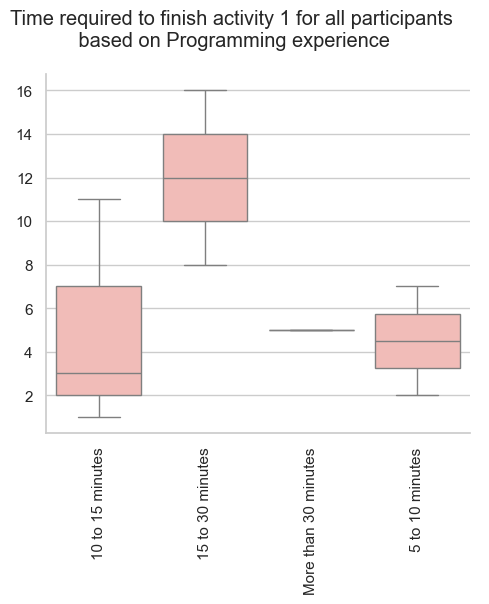

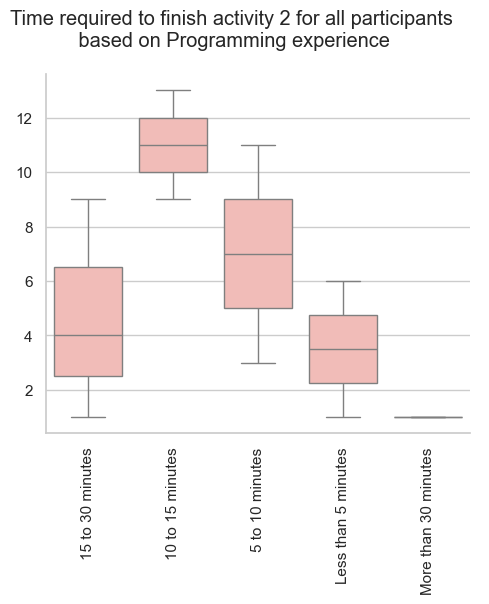

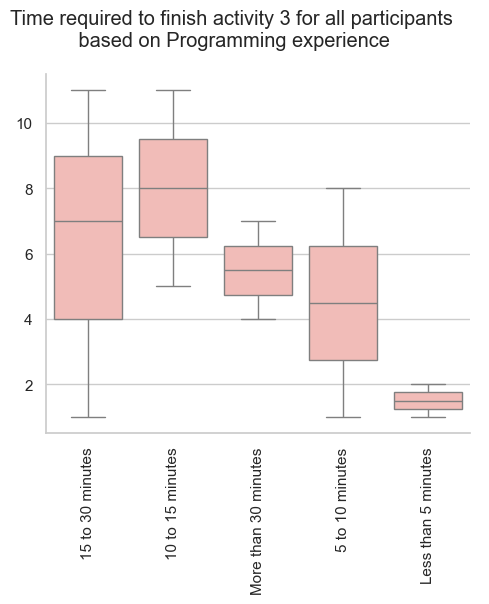

In [34]:
for activity in [f'Time required to finish activity {i}' for i in range(1, 4)]:
    df_activity = df.query('Gender != "I prefer not to tell"').groupby(['Programming experience'])[activity].value_counts().reset_index().rename(columns={'count': 'Count'})
    g = sns.catplot(data=df_activity, x=activity, y='Count', kind='box')
    g.set_xticklabels(rotation=90)
    g.figure.suptitle(f'{activity} for all participants\n based on Programming experience')
    g.figure.subplots_adjust(top=0.85)
    g.set_ylabels("")
    g.set_xlabels("")
    g.savefig(f"images/Box/Box - {activity} for all participants based on Programming experience.png")


In [35]:
df.columns

Index(['Gender', 'Age range', 'Current role', 'Campus', 'Affiliation',
       'Programming experience', 'Data analytics experience',
       'Experience using tools like Python, Colab, etc.',
       'Experience using ChatGPT in general',
       'Experience using ChatGPT for programming',
       'Experience using ChatGPT for data analytics',
       'Experience using generative APIs',
       'Time required to finish activity 1',
       'Time required to finish activity 2',
       'Time required to finish activity 3', 'Ease of use', 'Speed of result',
       'Appropriateness', 'Helpful', 'Correctness'],
      dtype='object')

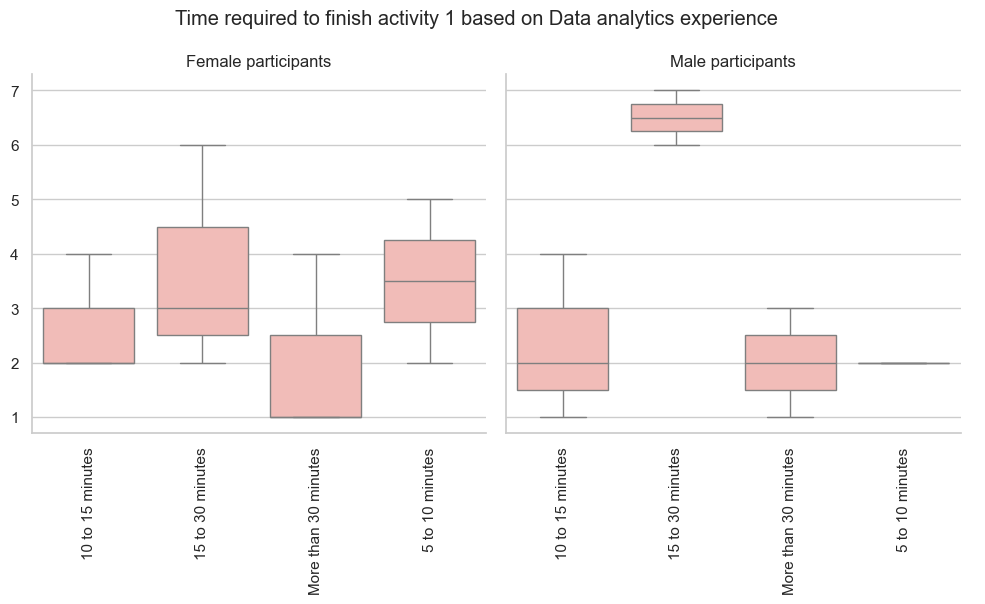

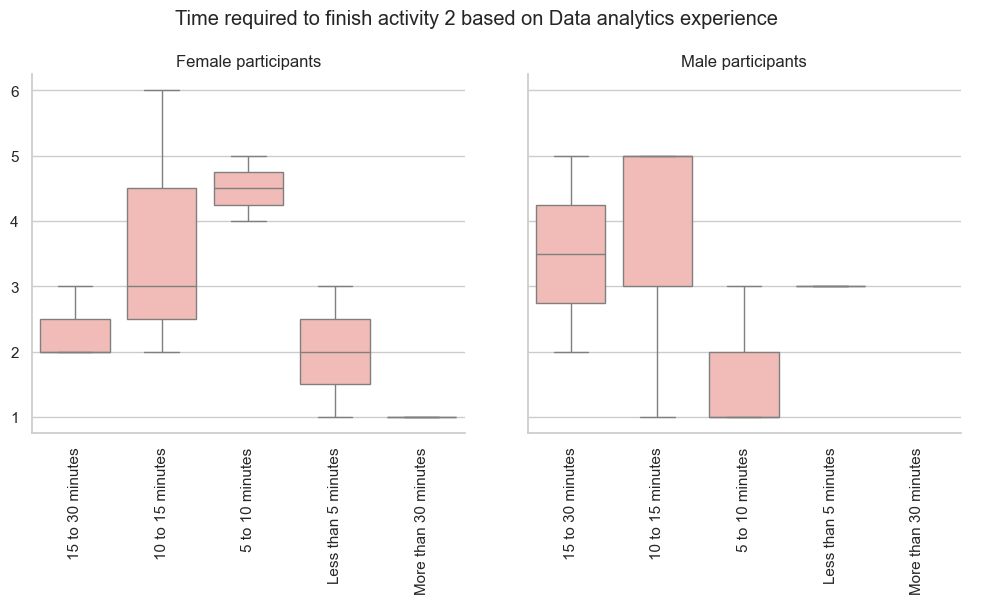

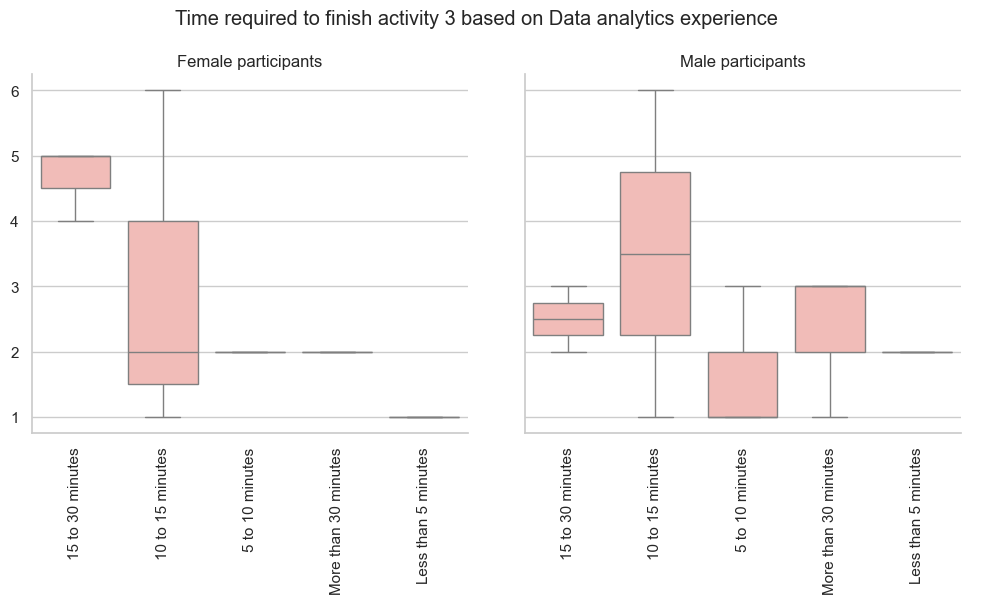

In [36]:
for activity in [f'Time required to finish activity {i}' for i in range(1, 4)]:
    df_activity = df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Data analytics experience'])[activity].value_counts().reset_index().rename(columns={'count': 'Count'})

    # df_activity_1 = df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])['Time required to finish activity 1'].value_counts().reset_index().rename(columns={'count': 'Count'})

    fig = sns.catplot(data=df_activity, x=activity, y='Count', col='Gender', kind='box')
    fig.set_xticklabels(rotation=90)
    fig.set_titles("{col_name} participants")
    fig.set_xlabels("")
    fig.figure.suptitle(f'{activity} based on Data analytics experience')
    fig.figure.subplots_adjust(top=0.85)
    fig.set_ylabels("")
    fig.savefig(f"images/Box/Box - {activity} based on Data analytics experience by gender.png")


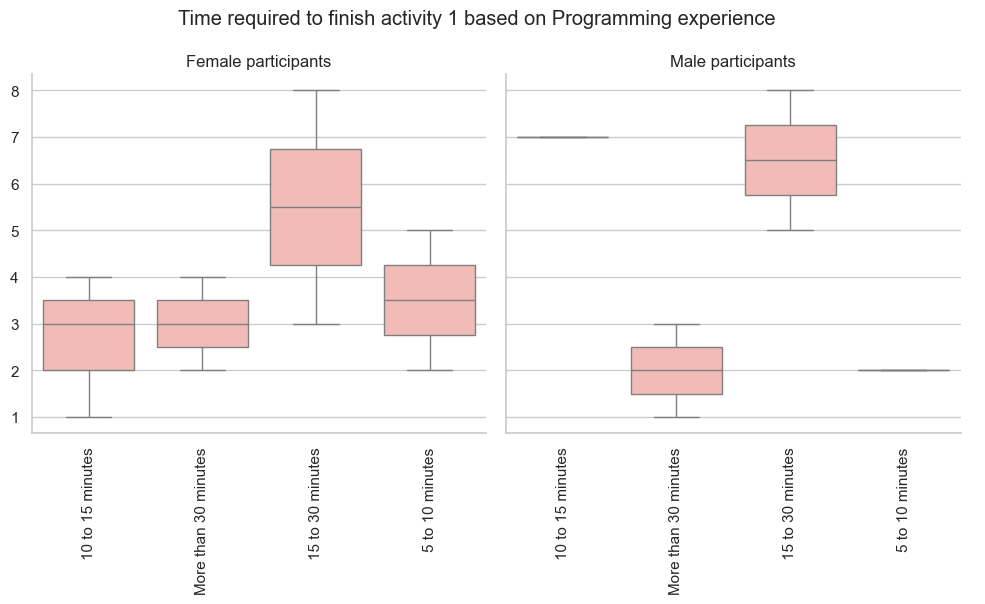

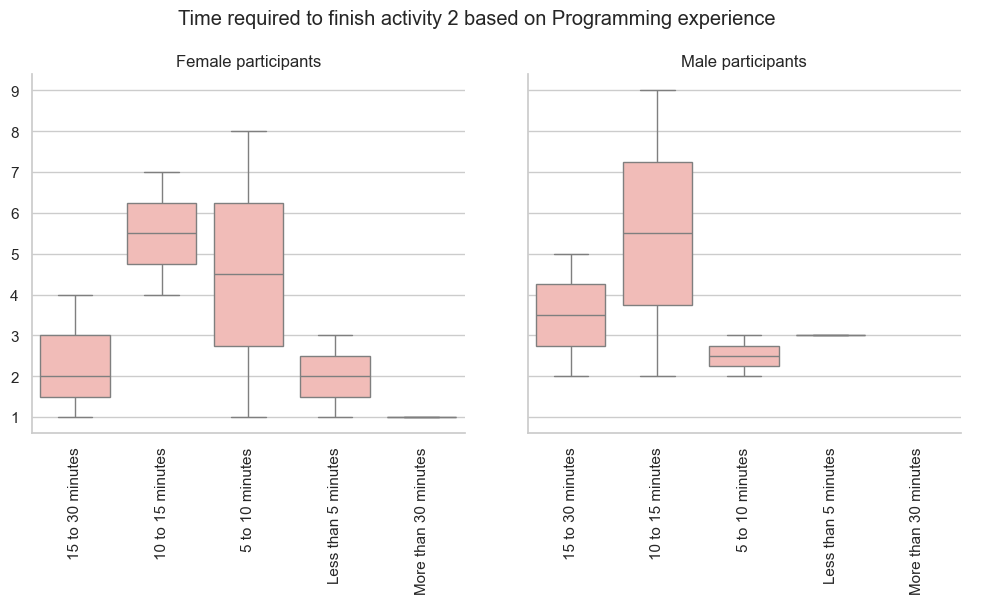

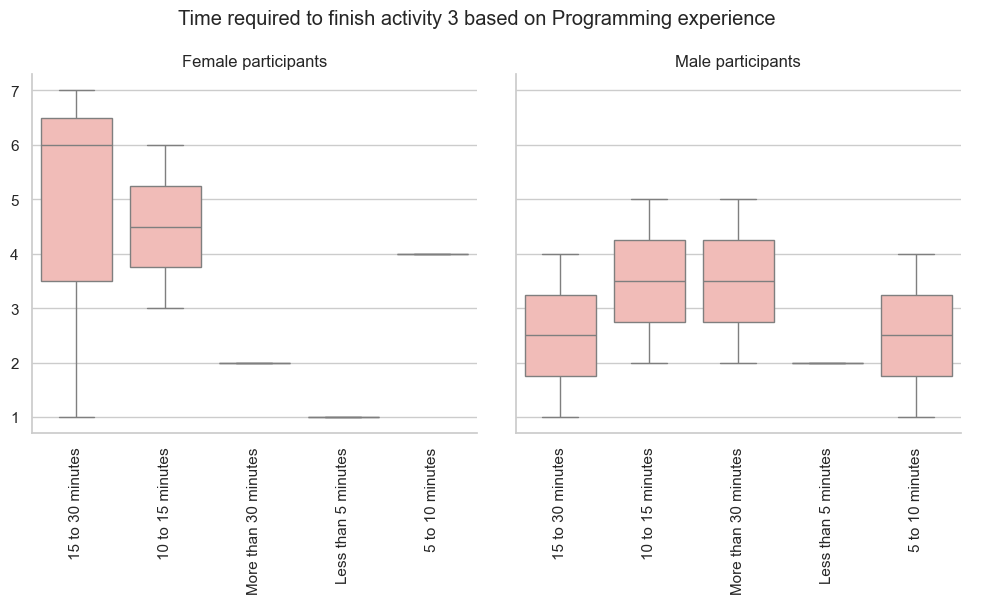

In [37]:
for activity in [f'Time required to finish activity {i}' for i in range(1, 4)]:
    df_activity = df.query('Gender != "I prefer not to tell"').groupby(['Gender', 'Programming experience'])[activity].value_counts().reset_index().rename(columns={'count': 'Count'})

    fig = sns.catplot(data=df_activity, x=activity, y='Count', col='Gender', kind='box')
    fig.set_xticklabels(rotation=90)
    fig.set_titles("{col_name} participants")
    fig.set_xlabels("")
    fig.figure.suptitle(f'{activity} based on Programming experience')
    fig.figure.subplots_adjust(top=0.85)
    fig.set_ylabels("")
    fig.savefig(f"images/Box/Box - {activity} based on Programming experience by gender.png")


# Charts for the journal paper

### Distribution of participant demographic data: a) role versus gender, b) affiliation or specialization field, and c) age ranging.

Current role  Gender              
Professional  Female                  11
              Male                     5
Student       Female                  21
              Male                    21
              I prefer not to tell     1
Name: count, dtype: int64


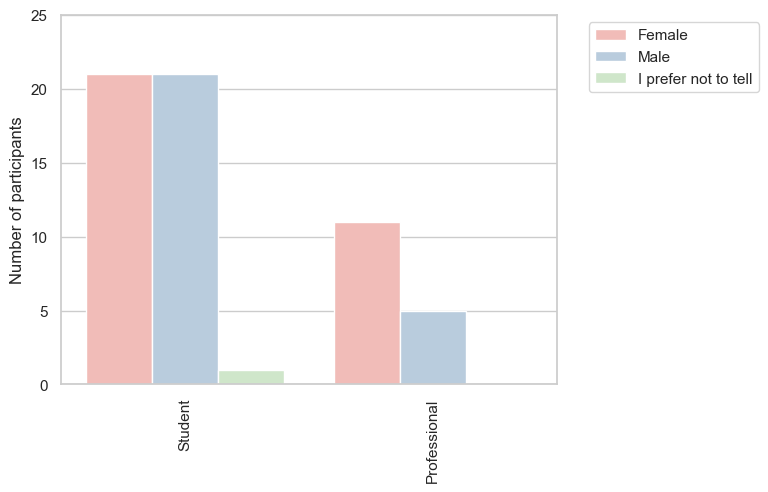

In [38]:
print(df.groupby("Current role")["Gender"].value_counts())
bar_chart_hue(data=df, column="Current role", hue="Gender", title=False, article_image=True)

Affiliation
Business                          23
Social Sciences and Government    21
Engineering and Sciences           7
Highschool Education               4
Humanities and Education           2
Architecture                       2
Name: count, dtype: int64


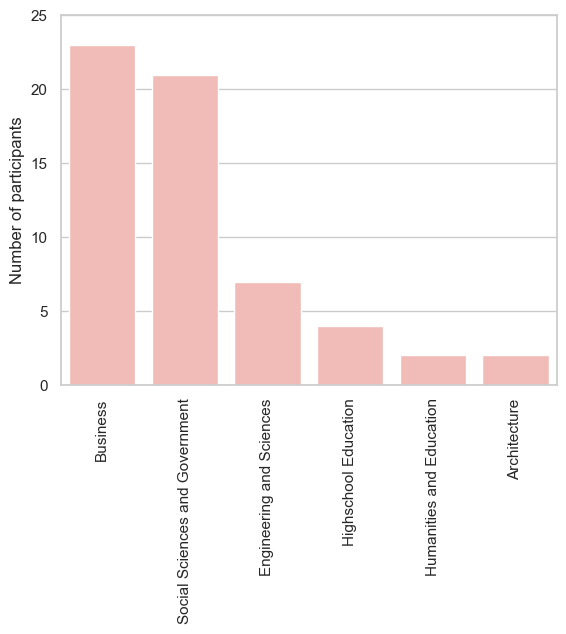

In [39]:
print(df["Affiliation"].value_counts())
bar_chart(data=df, column="Affiliation", title=False, article_image=True)

Age range
18 to 20 years    22
21 to 22 years    19
Over 50 years      6
40 to 50 years     4
35 to 40 years     2
26 to 30 years     2
31 to 35 years     2
23 to 25 years     2
Name: count, dtype: int64


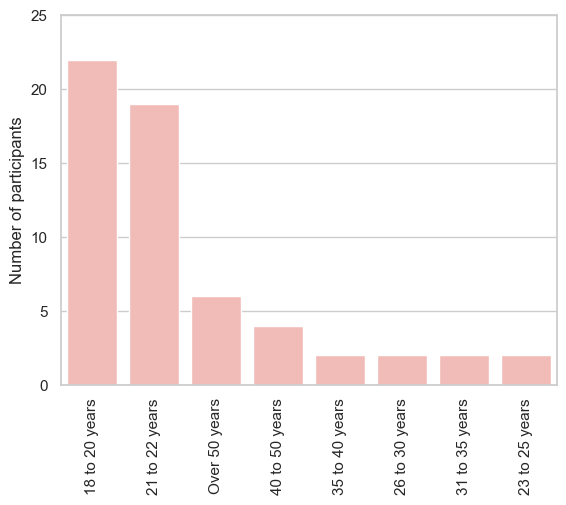

In [40]:
print(df["Age range"].value_counts())
bar_chart(data=df, column="Age range", title=False, article_image=True)

### Distribution displaying participants’ programming experience based on their roles: a) students, and b) professionals.

In [41]:
sns.color_palette(palette)

[(0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372)]

In [42]:
colors = {
    "Yes": sns.color_palette("Pastel1").as_hex()[0],
    "No": sns.color_palette("Pastel1").as_hex()[2],
    "Some": sns.color_palette("Pastel1").as_hex()[1]
}

Programming experience
Yes     28
Some    15
Name: count, dtype: int64


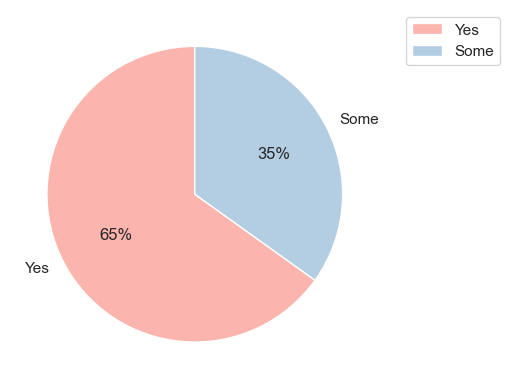

Programming experience
Yes     11
Some     4
No       1
Name: count, dtype: int64


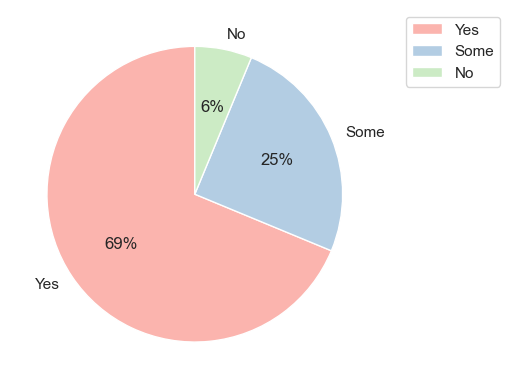

In [43]:
print(df[df["Current role"] == "Student"]["Programming experience"].value_counts())
pie_chart(data=df[df["Current role"] == "Student"], column="Programming experience", colors=colors, title=False, subpath="Students", article_image=True)
print(df[df["Current role"] == "Professional"]["Programming experience"].value_counts())
pie_chart(data=df[df["Current role"] == "Professional"], column="Programming experience", colors=colors, title=False, subpath="Professionals", article_image=True)

Programming experience
Yes     39
Some    19
No       1
Name: count, dtype: int64


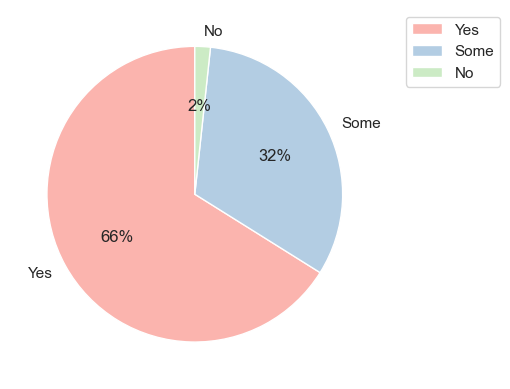

In [44]:
print(df["Programming experience"].value_counts())
pie_chart(data=df, column="Programming experience", colors=colors, title=False, article_image=True)

### Distribution displaying participants’ experience in developing data analytics projects based on their roles: a) students, and b) professionals.

Data analytics experience
Yes     24
Some    17
No       2
Name: count, dtype: int64


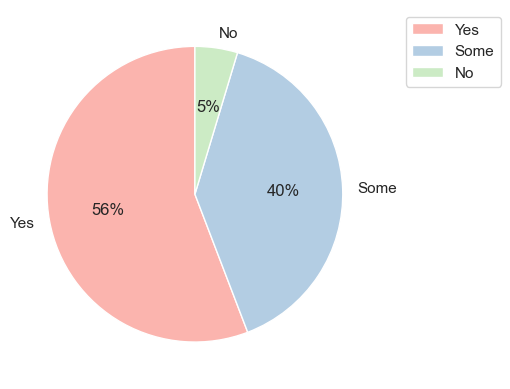

Data analytics experience
Yes     8
No      6
Some    2
Name: count, dtype: int64


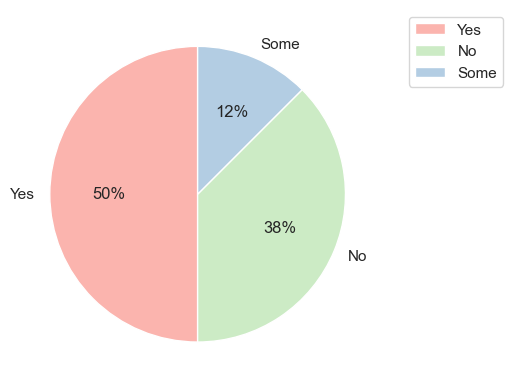

In [45]:
print(df[df["Current role"] == "Student"]["Data analytics experience"].value_counts())
pie_chart(data=df[df["Current role"] == "Student"], column="Data analytics experience", colors=colors, title=False, subpath="Students", article_image=True)
print(df[df["Current role"] == "Professional"]["Data analytics experience"].value_counts())
pie_chart(data=df[df["Current role"] == "Professional"], column="Data analytics experience", colors=colors, title=False, subpath="Professionals", article_image=True)

Data analytics experience
Yes     32
Some    19
No       8
Name: count, dtype: int64


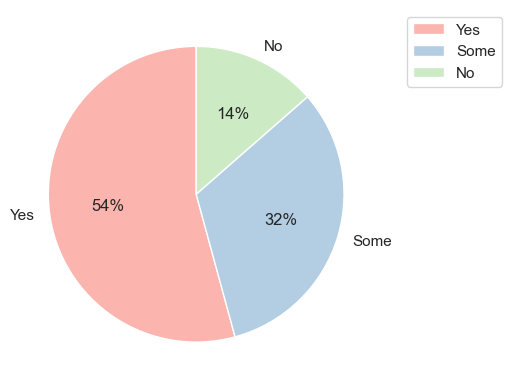

In [46]:
print(df["Data analytics experience"].value_counts())
pie_chart(data=df, column="Data analytics experience", colors=colors, title=False, article_image=True)

### Distribution displaying participants’ experience in programming tools.

Experience using tools like Python, Colab, etc.
Yes     36
Some     7
Name: count, dtype: int64


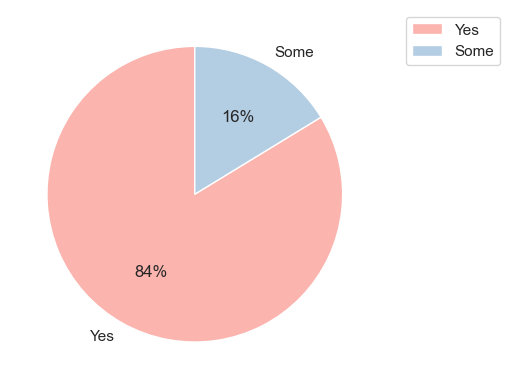

Experience using tools like Python, Colab, etc.
Yes     6
No      5
Some    5
Name: count, dtype: int64


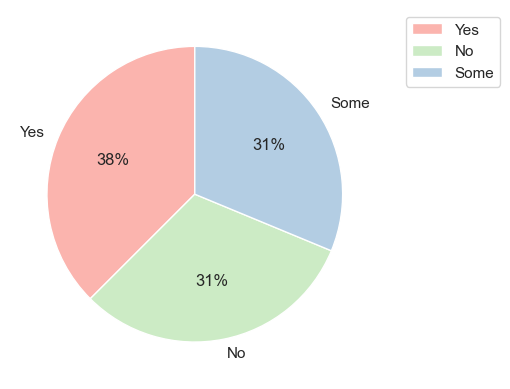

In [47]:
print(df[df["Current role"] == "Student"]["Experience using tools like Python, Colab, etc."].value_counts())
pie_chart(data=df[df["Current role"] == "Student"], column="Experience using tools like Python, Colab, etc.", colors=colors, title=False, subpath="Students", article_image=True)
print(df[df["Current role"] == "Professional"]["Experience using tools like Python, Colab, etc."].value_counts())
pie_chart(data=df[df["Current role"] == "Professional"], column="Experience using tools like Python, Colab, etc.", colors=colors, title=False, subpath="Professionals", article_image=True)

Experience using tools like Python, Colab, etc.
Yes     42
Some    12
No       5
Name: count, dtype: int64


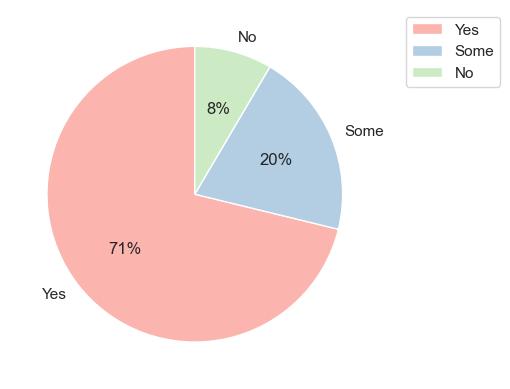

In [48]:
print(df["Experience using tools like Python, Colab, etc."].value_counts())
pie_chart(data=df, column="Experience using tools like Python, Colab, etc.", colors=colors, title=False, article_image=True)

### Distribution of participants’ experience related to the use of generative AI tools like ChatGPT.

#### Distribution of participants who have previously used ChatGPT for general purposes.

Experience using ChatGPT in general
Yes     25
Some     9
No       9
Name: count, dtype: int64


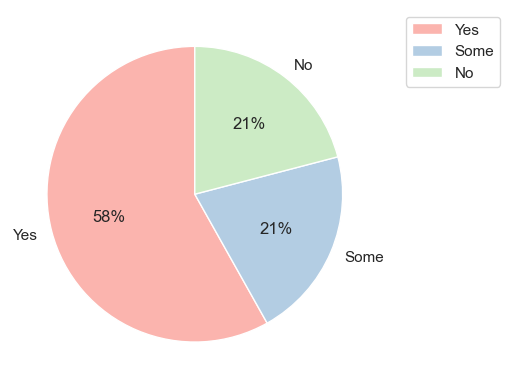

Experience using ChatGPT in general
Yes     14
Some     2
Name: count, dtype: int64


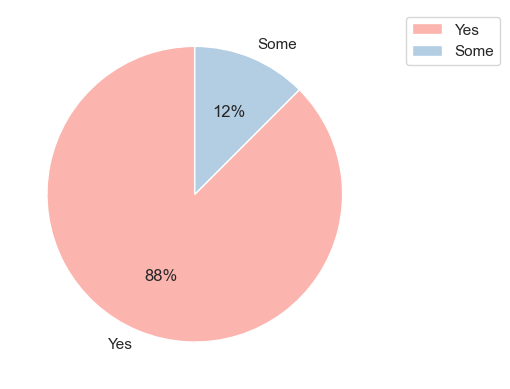

In [49]:
print(df[df["Current role"] == "Student"]["Experience using ChatGPT in general"].value_counts())
pie_chart(data=df[df["Current role"] == "Student"], column="Experience using ChatGPT in general", colors=colors, title=False, subpath="Students", article_image=True)
print(df[df["Current role"] == "Professional"]["Experience using ChatGPT in general"].value_counts())
pie_chart(data=df[df["Current role"] == "Professional"], column="Experience using ChatGPT in general", colors=colors, title=False, subpath="Professionals", article_image=True)

Experience using ChatGPT in general
Yes     39
Some    11
No       9
Name: count, dtype: int64


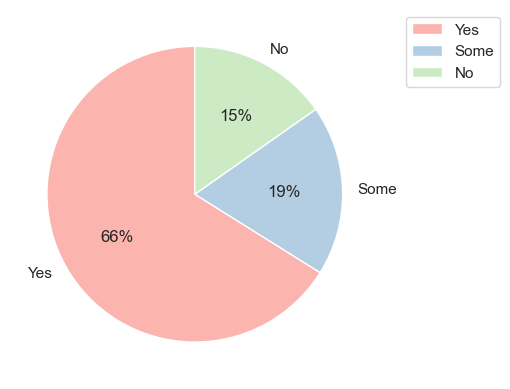

In [50]:
print(df["Experience using ChatGPT in general"].value_counts())
pie_chart(data=df, column="Experience using ChatGPT in general", colors=colors, title=False, article_image=True)

#### Distribution of participants who have previously used ChatGPT for programming tasks.

Experience using ChatGPT for programming
Yes     21
Some    12
No      10
Name: count, dtype: int64


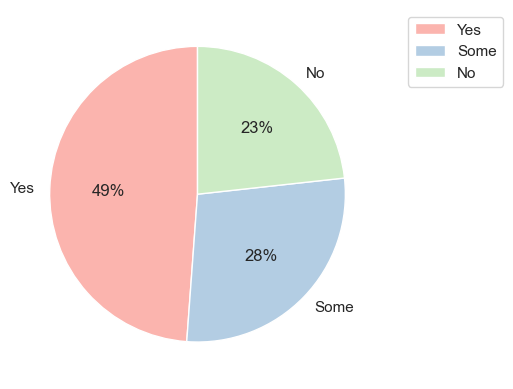

Experience using ChatGPT for programming
No      7
Yes     5
Some    4
Name: count, dtype: int64


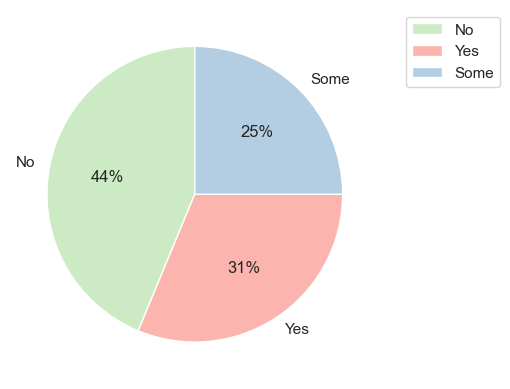

In [51]:
print(df[df["Current role"] == "Student"]["Experience using ChatGPT for programming"].value_counts())
pie_chart(data=df[df["Current role"] == "Student"], column="Experience using ChatGPT for programming", colors=colors, title=False, subpath="Students", article_image=True)
print(df[df["Current role"] == "Professional"]["Experience using ChatGPT for programming"].value_counts())
pie_chart(data=df[df["Current role"] == "Professional"], column="Experience using ChatGPT for programming", colors=colors, title=False, subpath="Professionals", article_image=True)

Experience using ChatGPT for programming
Yes     26
No      17
Some    16
Name: count, dtype: int64


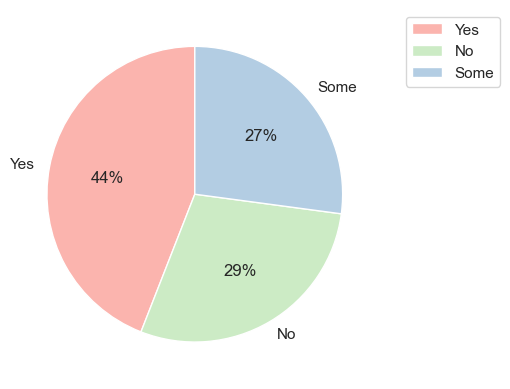

In [52]:
print(df["Experience using ChatGPT for programming"].value_counts())
pie_chart(data=df, column="Experience using ChatGPT for programming", colors=colors, title=False, article_image=True)

#### Distribution of participants who have previously used ChatGPT for data analytics project development.

Experience using ChatGPT for data analytics
Yes     18
Some    15
No      10
Name: count, dtype: int64


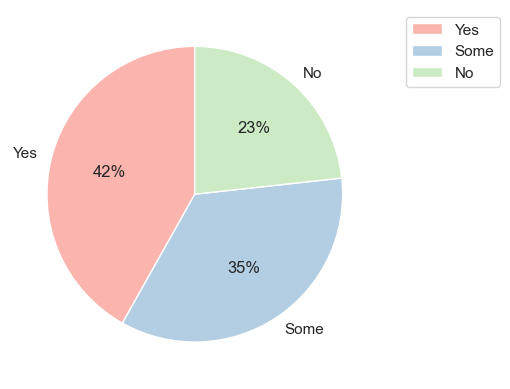

Experience using ChatGPT for data analytics
No      12
Some     3
Yes      1
Name: count, dtype: int64


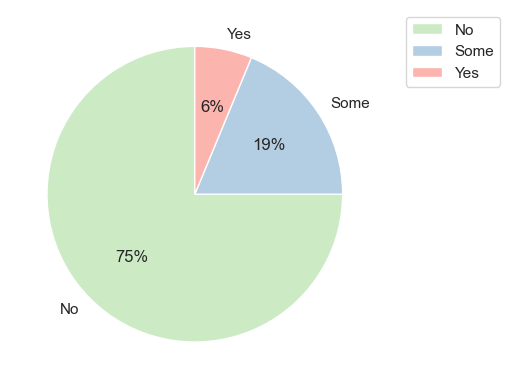

In [53]:
print(df[df["Current role"] == "Student"]["Experience using ChatGPT for data analytics"].value_counts())
pie_chart(data=df[df["Current role"] == "Student"], column="Experience using ChatGPT for data analytics", colors=colors, title=False, subpath="Students", article_image=True)
print(df[df["Current role"] == "Professional"]["Experience using ChatGPT for data analytics"].value_counts())
pie_chart(data=df[df["Current role"] == "Professional"], column="Experience using ChatGPT for data analytics", colors=colors, title=False, subpath="Professionals", article_image=True)

Experience using ChatGPT for data analytics
No      22
Yes     19
Some    18
Name: count, dtype: int64


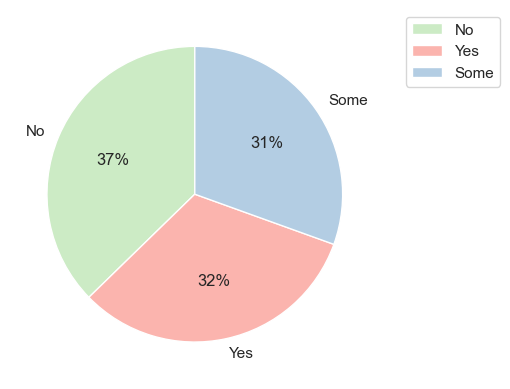

In [54]:
print(df["Experience using ChatGPT for data analytics"].value_counts())
pie_chart(data=df, column="Experience using ChatGPT for data analytics", colors=colors, title=False, article_image=True)

#### Distribution of participants who have previously used APIs from any LLM provider, such as OpenAI.

Experience using generative APIs
Yes     23
Some    10
No      10
Name: count, dtype: int64


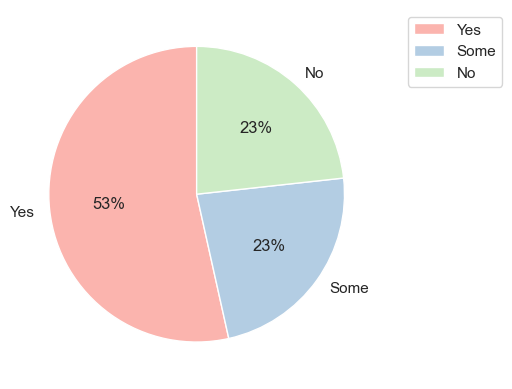

Experience using generative APIs
No      7
Some    5
Yes     4
Name: count, dtype: int64


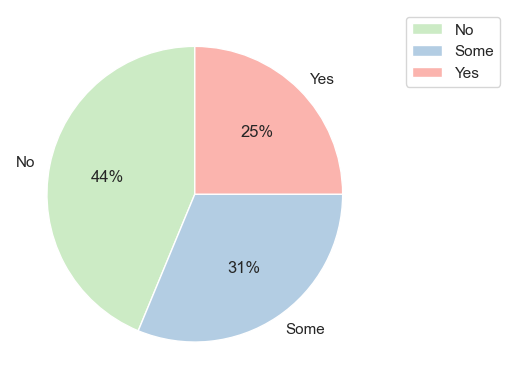

In [55]:
print(df[df["Current role"] == "Student"]["Experience using generative APIs"].value_counts())
pie_chart(data=df[df["Current role"] == "Student"], column="Experience using generative APIs", colors=colors, title=False, subpath="Students", article_image=True)
print(df[df["Current role"] == "Professional"]["Experience using generative APIs"].value_counts())
pie_chart(data=df[df["Current role"] == "Professional"], column="Experience using generative APIs", colors=colors, title=False, subpath="Professionals", article_image=True)

Experience using generative APIs
Yes     27
No      17
Some    15
Name: count, dtype: int64


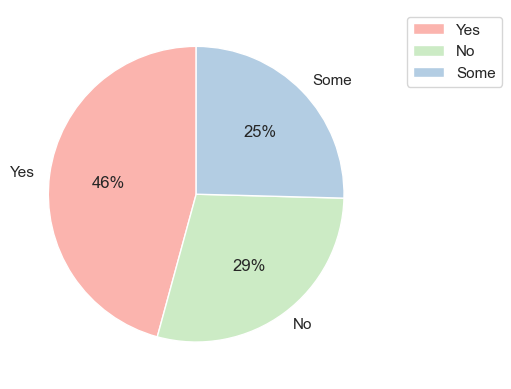

In [56]:
print(df["Experience using generative APIs"].value_counts())
pie_chart(data=df, column="Experience using generative APIs", colors=colors, title=False, article_image=True)

### Lollipop charts

                  Gender           Metric                            Answer  \
11                  Male  Appropriateness  ChatGPT as an external assistant   
13                Female  Appropriateness  ChatGPT as an external assistant   
24  I prefer not to tell  Appropriateness  ChatGPT as an external assistant   
0                 Female  Appropriateness         LIDA with GPT integration   
6                   Male  Appropriateness         LIDA with GPT integration   
19                Female  Appropriateness                Traditional method   
20                  Male  Appropriateness                Traditional method   
8                   Male      Correctness  ChatGPT as an external assistant   
14                Female      Correctness  ChatGPT as an external assistant   
2                 Female      Correctness         LIDA with GPT integration   
7                   Male      Correctness         LIDA with GPT integration   
25  I prefer not to tell      Correctness         LI

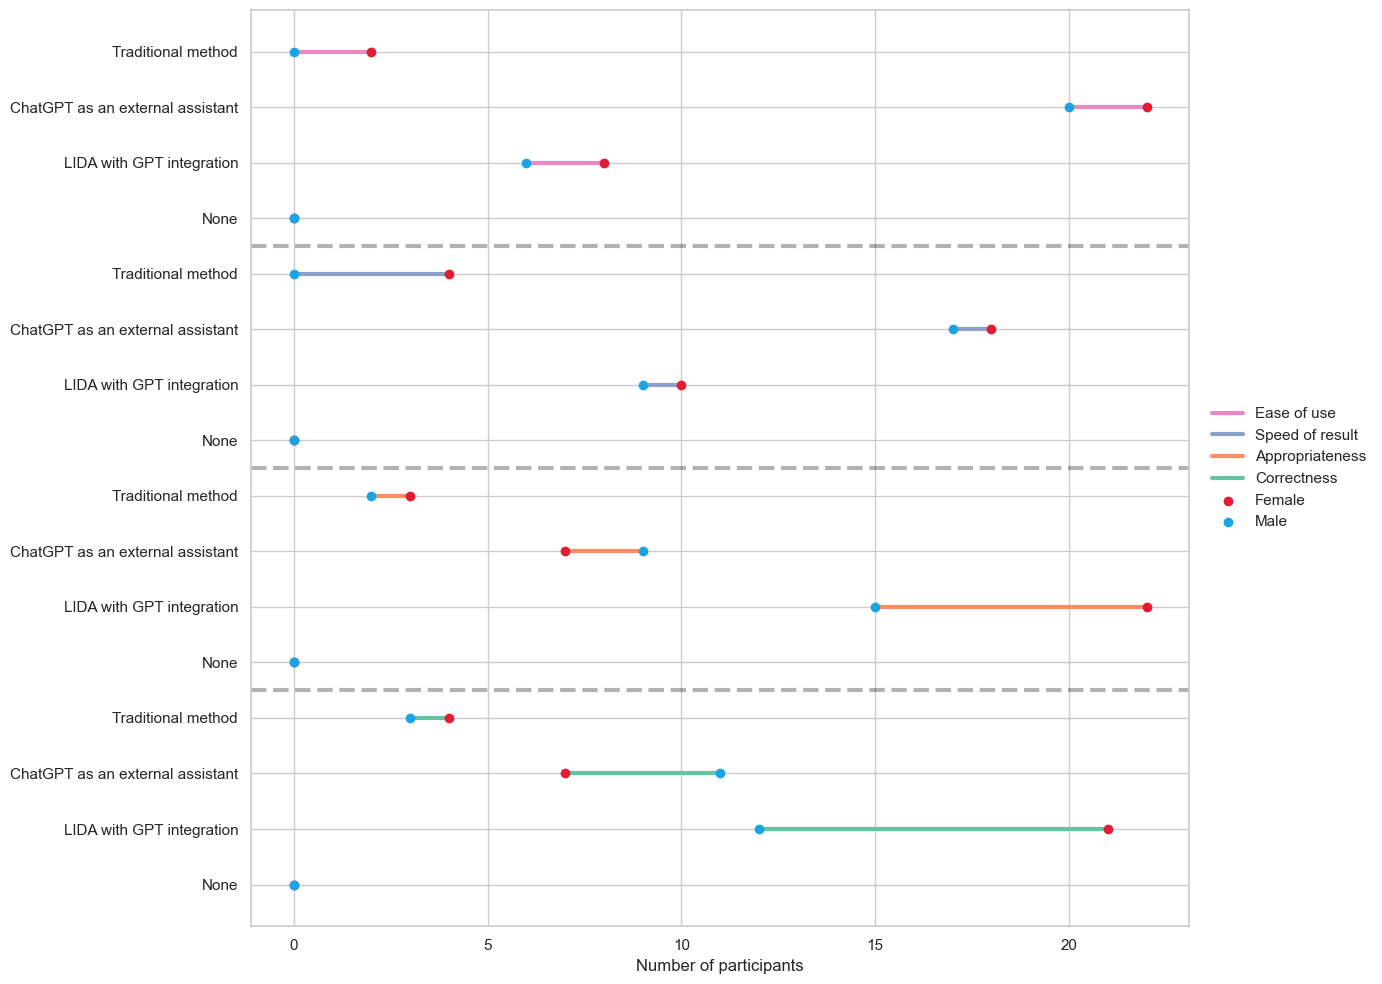

    Current role           Metric                            Answer  count
4        Student  Appropriateness  ChatGPT as an external assistant     14
17  Professional  Appropriateness  ChatGPT as an external assistant      3
2        Student  Appropriateness         LIDA with GPT integration     24
6   Professional  Appropriateness         LIDA with GPT integration     13
15       Student  Appropriateness                Traditional method      5
5        Student      Correctness  ChatGPT as an external assistant     14
16  Professional      Correctness  ChatGPT as an external assistant      4
3        Student      Correctness         LIDA with GPT integration     22
7   Professional      Correctness         LIDA with GPT integration     12
14       Student      Correctness                Traditional method      7
0        Student      Ease of use  ChatGPT as an external assistant     35
9   Professional      Ease of use  ChatGPT as an external assistant      8
11  Professional      Eas

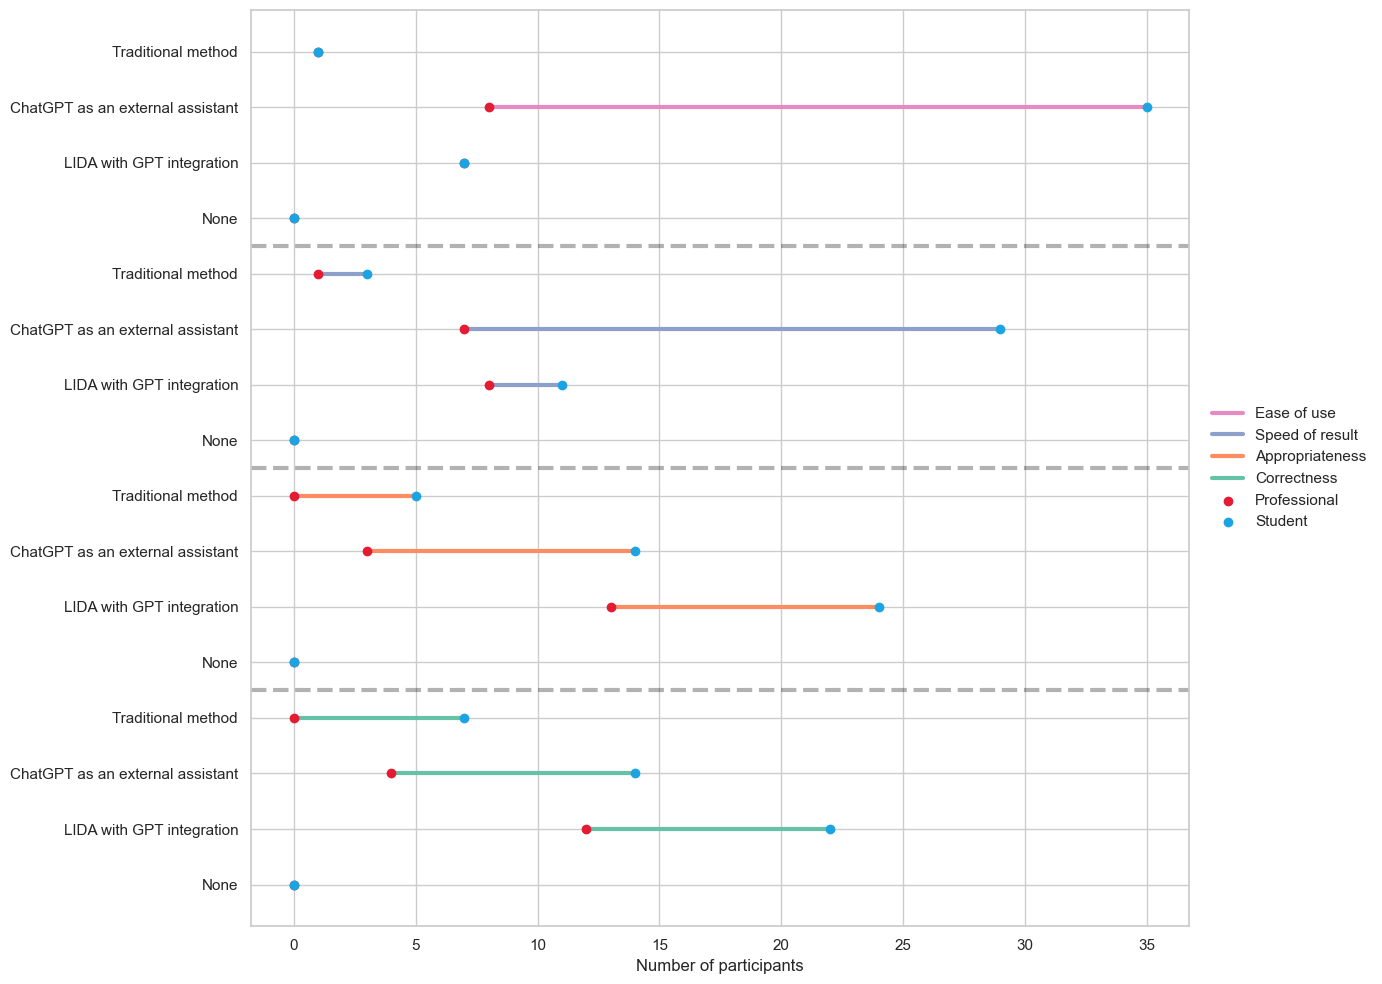

In [57]:
metrics = ["Ease of use", "Speed of result", "Appropriateness", "Correctness"]
options = ["Traditional method", "ChatGPT as an external assistant", "LIDA with GPT integration", "None"]
column_colors = ["#e31b33", "#1ba4e3"]
print(df.melt(id_vars="Gender", value_vars=metrics, var_name="Metric", value_name="Answer").value_counts().reset_index().sort_values(by=["Metric", "Answer"]))
metrics_chart(df, "Gender", column_colors, ["I prefer not to tell"], metrics, options, title=False, article_image=True)
print(df.melt(id_vars="Current role", value_vars=metrics, var_name="Metric", value_name="Answer").value_counts().reset_index().sort_values(by=["Metric", "Answer"]))
metrics_chart(df, "Current role", column_colors, [], metrics, options, title=False, article_image=True)

### Radar charts

In [58]:
metrics = ["Ease of use", "Speed of result", "Appropriateness", "Correctness"]
df_metrics = df.melt(value_vars=metrics, var_name="Metric", value_name="Answer").value_counts().reset_index().rename(columns={"count": "People"})
df_metrics = df_metrics.sort_values(by=["Metric", "Answer"], ascending=False)
min = df_metrics["People"].min()
max = df_metrics["People"].max()

ranges = [min, max]

df_metrics_filtered = df_metrics[~df_metrics["Answer"].isin(['None'])]
answers = df_metrics_filtered["Answer"].unique()
metrics = df_metrics_filtered["Metric"].unique()

fig = go.Figure()
for answer in answers:
    fig.add_trace(go.Scatterpolar(
        r=df_metrics_filtered[df_metrics_filtered["Answer"]==answer]["People"],
        theta=metrics,
        fill='toself',
        name=answer
        ))

fig.update_layout(
    title=f"Metric evaluation for participants",
    legend_title="Answer",
    width=1100,
    height=800,
    polar=dict(
        radialaxis=dict(
        visible=True,
        range=ranges
        )),
    showlegend=True,    
    )
print(df_metrics_filtered)
fig.show()
fig.write_image(f"images/Journal/Radar - Metric evaluation for participants.png")

             Metric                            Answer  People
10  Speed of result                Traditional method       4
4   Speed of result         LIDA with GPT integration      19
2   Speed of result  ChatGPT as an external assistant      36
11      Ease of use                Traditional method       2
7       Ease of use         LIDA with GPT integration      14
0       Ease of use  ChatGPT as an external assistant      43
8       Correctness                Traditional method       7
3       Correctness         LIDA with GPT integration      34
5       Correctness  ChatGPT as an external assistant      18
9   Appropriateness                Traditional method       5
1   Appropriateness         LIDA with GPT integration      37
6   Appropriateness  ChatGPT as an external assistant      17


## Stacked plots

### Time to finish activities

In [59]:
df_time = df[['Current role', 'Time required to finish activity 1', 'Time required to finish activity 2', 'Time required to finish activity 3']]
# df_time = df_time.query('Gender != "I prefer not to tell"')
# df_time.sort_values(by='Gender')
df_time.head()

Current role Time required to finish activity 1  \
0  Professional                   10 to 15 minutes   
1  Professional                   15 to 30 minutes   
2  Professional                   15 to 30 minutes   
3  Professional                    5 to 10 minutes   
4  Professional                    5 to 10 minutes   

  Time required to finish activity 2 Time required to finish activity 3  
0                   15 to 30 minutes                   15 to 30 minutes  
1                   10 to 15 minutes               More than 30 minutes  
2                   15 to 30 minutes                   15 to 30 minutes  
3                   10 to 15 minutes                   10 to 15 minutes  
4                Less than 5 minutes                Less than 5 minutes

In [60]:

df_time_1 = df_time[['Current role', 'Time required to finish activity 1']].groupby(['Current role']).value_counts(normalize=True).reset_index(name='Count 1')
df_time_2 = df_time[['Current role', 'Time required to finish activity 2']].groupby(['Current role']).value_counts(normalize=True).reset_index(name='Count 2')
df_time_3 = df_time[['Current role', 'Time required to finish activity 3']].groupby(['Current role']).value_counts(normalize=True).reset_index(name='Count 3')

df_time_1['Count 1'] = df_time_1['Count 1'] * 100
df_time_2['Count 2'] = df_time_2['Count 2'] * 100
df_time_3['Count 3'] = df_time_3['Count 3'] * 100

Time required to finish activity 1  5 to 10 minutes  10 to 15 minutes  \
Current role                                                            
Professional                              37.500000         37.500000   
Student                                    6.976744         20.930233   

Time required to finish activity 1  15 to 30 minutes  More than 30 minutes  
Current role                                                                
Professional                               18.750000              6.250000  
Student                                    51.162791             20.930233

Text(0, 0.5, '')

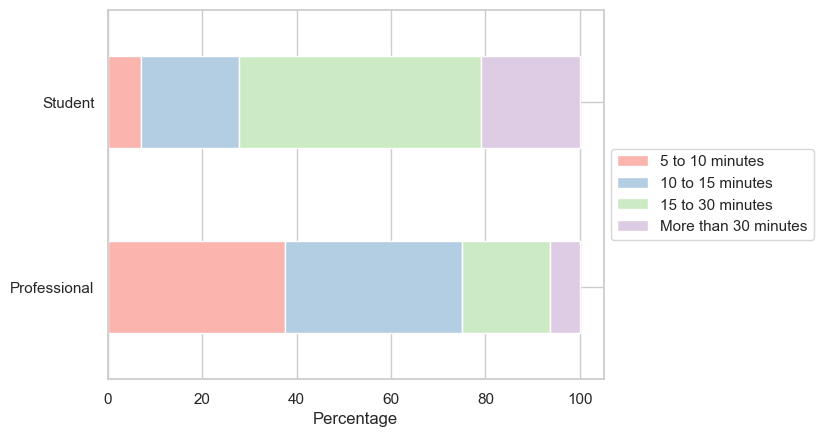

In [61]:

df_time_1.pivot_table(index='Current role', columns='Time required to finish activity 1', values='Count 1').reset_index()
test = df_time_1.pivot_table(index='Current role', columns='Time required to finish activity 1', values='Count 1')
test = test[['5 to 10 minutes', '10 to 15 minutes','15 to 30 minutes',	'More than 30 minutes']]
display(test)
test.plot(kind='barh', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Percentage')
plt.ylabel('')


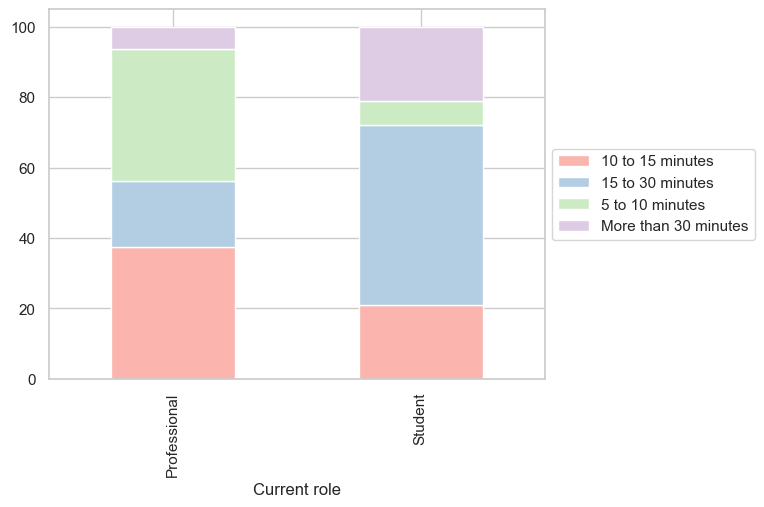

In [62]:

df_time_1.pivot_table(index='Current role', columns='Time required to finish activity 1', values='Count 1').plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Time required to finish activity 1                                Current role  \
0                                   Professional by using traditional approach   
1                                        Student by using traditional approach   

Time required to finish activity 1  Less than 5 minutes  5 to 10 minutes  \
0                                                     0        37.500000   
1                                                     0         6.976744   

Time required to finish activity 1  10 to 15 minutes  15 to 30 minutes  \
0                                          37.500000         18.750000   
1                                          20.930233         51.162791   

Time required to finish activity 1  More than 30 minutes  
0                                               6.250000  
1                                              20.930233

Time required to finish activity 2                   Current role  \
0                                   Professional by using ChatGPT   
1                                        Student by using ChatGPT   

Time required to finish activity 2  Less than 5 minutes  5 to 10 minutes  \
0                                             18.750000        25.000000   
1                                              9.302326        23.255814   

Time required to finish activity 2  10 to 15 minutes  15 to 30 minutes  \
0                                          37.500000         18.750000   
1                                          39.534884         25.581395   

Time required to finish activity 2  More than 30 minutes  
0                                                    NaN  
1                                               2.325581

Time required to finish activity 3                    Current role  \
0                                   Professional by using LIDA+GPT   
1                                        Student by using LIDA+GPT   

Time required to finish activity 3  Less than 5 minutes  5 to 10 minutes  \
0                                              6.250000        31.250000   
1                                              4.651163         9.302326   

Time required to finish activity 3  10 to 15 minutes  15 to 30 minutes  \
0                                           18.75000          31.25000   
1                                           32.55814          32.55814   

Time required to finish activity 3  More than 30 minutes  
0                                              12.500000  
1                                              20.930233

<Figure size 1000x600 with 0 Axes>

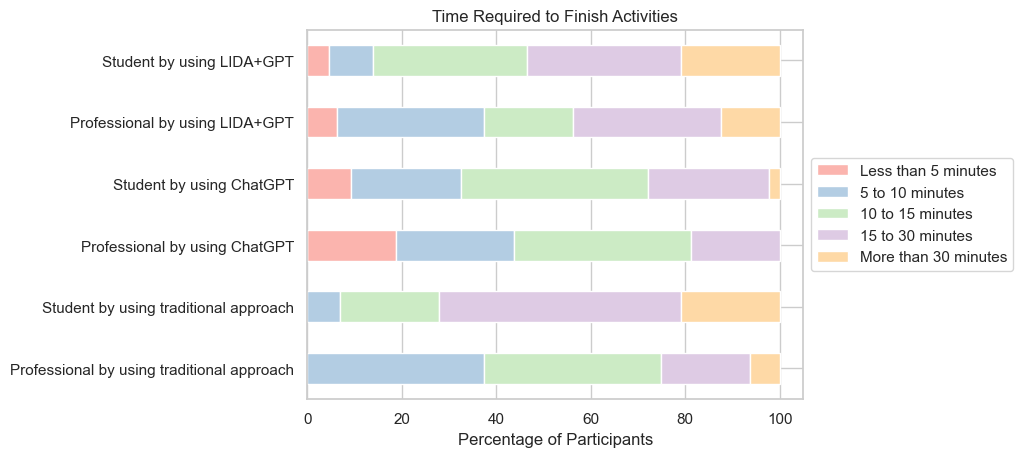

In [63]:

df_time_1_pt = df_time_1.pivot_table(index='Current role', columns='Time required to finish activity 1', values='Count 1').reset_index()
df_time_2_pt = df_time_2.pivot_table(index='Current role', columns='Time required to finish activity 2', values='Count 2').reset_index()
df_time_3_pt = df_time_3.pivot_table(index='Current role', columns='Time required to finish activity 3', values='Count 3').reset_index()

df_time_1_pt['Less than 5 minutes'] = 0

df_time_1_pt = df_time_1_pt[['Current role','Less than 5 minutes','5 to 10 minutes', '10 to 15 minutes','15 to 30 minutes', 'More than 30 minutes']]
df_time_2_pt = df_time_2_pt[['Current role','Less than 5 minutes','5 to 10 minutes', '10 to 15 minutes','15 to 30 minutes', 'More than 30 minutes']]
df_time_3_pt = df_time_3_pt[['Current role','Less than 5 minutes','5 to 10 minutes', '10 to 15 minutes','15 to 30 minutes', 'More than 30 minutes']]

df_time_1_pt['Current role'] = df_time_1_pt['Current role'].map(lambda x: str(x) + " by using traditional approach")
df_time_2_pt['Current role'] = df_time_2_pt['Current role'].map(lambda x: str(x) + " by using ChatGPT")
df_time_3_pt['Current role'] = df_time_3_pt['Current role'].map(lambda x: str(x) + " by using LIDA+GPT")

display(df_time_1_pt)
display(df_time_2_pt)
display(df_time_3_pt)

frames = [df_time_1_pt, df_time_2_pt, df_time_3_pt]
df_concatenated = pd.concat(frames).set_index('Current role')

plt.figure(figsize=(10,6))
p = df_concatenated.plot(kind='barh', stacked=True)

plt.title("Time Required to Finish Activities")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("")
plt.xlabel('Percentage of Participants')
plt.show()
# p.figure.savefig("images/Bar_hue/Bar stacked - Time Required to Finish Activities.png", bbox_inches='tight')


### Programming experience by everything

Age range  Current role  Gender Programming experience  count
0   18 to 20 years       Student  Female                    Yes     10
1   18 to 20 years       Student  Female                   Some      4
2   18 to 20 years       Student    Male                    Yes      4
3   18 to 20 years       Student    Male                   Some      3
4   21 to 22 years       Student  Female                   Some      3
5   21 to 22 years       Student  Female                    Yes      2
6   21 to 22 years       Student    Male                    Yes     11
7   21 to 22 years       Student    Male                   Some      3
8   23 to 25 years       Student  Female                   Some      1
9   23 to 25 years       Student  Female                    Yes      1
10  26 to 30 years  Professional  Female                   Some      1
11  26 to 30 years  Professional    Male                    Yes      1
12  31 to 35 years  Professional  Female                    Yes      1
13  31 to 35 years  Professional    Male                    Yes      1
14  35 to 40 years  Professional  Female                   Some      1
15  35 to 40 years  Professional    Male                    Yes      1
16  40 to 50 years  Professional  Female                    Yes      3
17  40 to 50 years  Professional    Male                    Yes      1
18   Over 50 years  Professional  Female                   Some      2
19   Over 50 years  Professional  Female                    Yes      2
20   Over 50 years  Professional  Female                     No      1
21   Over 50 years  Professional    Male                    Yes      1

Age range  Current role  Gender Programming experience  proportion
0   18 to 20 years       Student  Female                    Yes    0.714286
1   18 to 20 years       Student  Female                   Some    0.285714
2   18 to 20 years       Student    Male                    Yes    0.571429
3   18 to 20 years       Student    Male                   Some    0.428571
4   21 to 22 years       Student  Female                   Some    0.600000
5   21 to 22 years       Student  Female                    Yes    0.400000
6   21 to 22 years       Student    Male                    Yes    0.785714
7   21 to 22 years       Student    Male                   Some    0.214286
8   23 to 25 years       Student  Female                   Some    0.500000
9   23 to 25 years       Student  Female                    Yes    0.500000
10  26 to 30 years  Professional  Female                   Some    1.000000
11  26 to 30 years  Professional    Male                    Yes    1.000000
12  31 to 35 years  Professional  Female                    Yes    1.000000
13  31 to 35 years  Professional    Male                    Yes    1.000000
14  35 to 40 years  Professional  Female                   Some    1.000000
15  35 to 40 years  Professional    Male                    Yes    1.000000
16  40 to 50 years  Professional  Female                    Yes    1.000000
17  40 to 50 years  Professional    Male                    Yes    1.000000
18   Over 50 years  Professional  Female                   Some    0.400000
19   Over 50 years  Professional  Female                    Yes    0.400000
20   Over 50 years  Professional  Female                     No    0.200000
21   Over 50 years  Professional    Male                    Yes    1.000000

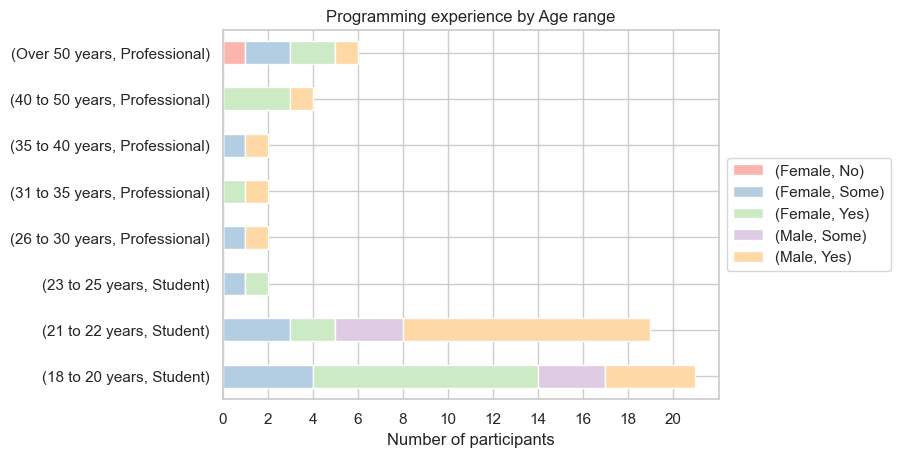

In [64]:
programming_exp = df.query('Gender != "I prefer not to tell"').groupby(['Age range', 'Current role', 'Gender'])['Programming experience'].value_counts().fillna(0).reset_index()
programming_exp_percent = df.query('Gender != "I prefer not to tell"').groupby(['Age range', 'Current role', 'Gender'])['Programming experience'].value_counts(normalize=True).fillna(0).reset_index()
display(programming_exp)
display(programming_exp_percent)

df_prog_exp_pivot = programming_exp.pivot_table(index=['Age range', 'Current role'], columns=['Gender', 'Programming experience'], values='count').fillna(0).astype(int)
p = df_prog_exp_pivot.plot(kind='barh', stacked=True)

plt.title("Programming experience by Age range")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("")
plt.xticks(range(0, 22, 2))
plt.xlabel('Number of participants')
plt.show()
# p.figure.savefig("images/Bar_hue/Bar stacked - Time Required to Finish Activities.png", bbox_inches='tight')

### Data analytics experience

Age range  Current role  Gender Data analytics experience  count
0   18 to 20 years       Student  Female                       Yes      7
1   18 to 20 years       Student  Female                      Some      6
2   18 to 20 years       Student  Female                        No      1
3   18 to 20 years       Student    Male                       Yes      4
4   18 to 20 years       Student    Male                      Some      3
5   21 to 22 years       Student  Female                      Some      3
6   21 to 22 years       Student  Female                       Yes      2
7   21 to 22 years       Student    Male                       Yes     10
8   21 to 22 years       Student    Male                      Some      4
9   23 to 25 years       Student  Female                      Some      1
10  23 to 25 years       Student  Female                       Yes      1
11  26 to 30 years  Professional  Female                        No      1
12  26 to 30 years  Professional    Male                       Yes      1
13  31 to 35 years  Professional  Female                       Yes      1
14  31 to 35 years  Professional    Male                        No      1
15  35 to 40 years  Professional  Female                       Yes      1
16  35 to 40 years  Professional    Male                        No      1
17  40 to 50 years  Professional  Female                        No      1
18  40 to 50 years  Professional  Female                      Some      1
19  40 to 50 years  Professional  Female                       Yes      1
20  40 to 50 years  Professional    Male                      Some      1
21   Over 50 years  Professional  Female                       Yes      3
22   Over 50 years  Professional  Female                        No      2
23   Over 50 years  Professional    Male                       Yes      1

Age range  Current role  Gender Data analytics experience  proportion
0   18 to 20 years       Student  Female                       Yes    0.500000
1   18 to 20 years       Student  Female                      Some    0.428571
2   18 to 20 years       Student  Female                        No    0.071429
3   18 to 20 years       Student    Male                       Yes    0.571429
4   18 to 20 years       Student    Male                      Some    0.428571
5   21 to 22 years       Student  Female                      Some    0.600000
6   21 to 22 years       Student  Female                       Yes    0.400000
7   21 to 22 years       Student    Male                       Yes    0.714286
8   21 to 22 years       Student    Male                      Some    0.285714
9   23 to 25 years       Student  Female                      Some    0.500000
10  23 to 25 years       Student  Female                       Yes    0.500000
11  26 to 30 years  Professional  Female                        No    1.000000
12  26 to 30 years  Professional    Male                       Yes    1.000000
13  31 to 35 years  Professional  Female                       Yes    1.000000
14  31 to 35 years  Professional    Male                        No    1.000000
15  35 to 40 years  Professional  Female                       Yes    1.000000
16  35 to 40 years  Professional    Male                        No    1.000000
17  40 to 50 years  Professional  Female                        No    0.333333
18  40 to 50 years  Professional  Female                      Some    0.333333
19  40 to 50 years  Professional  Female                       Yes    0.333333
20  40 to 50 years  Professional    Male                      Some    1.000000
21   Over 50 years  Professional  Female                       Yes    0.600000
22   Over 50 years  Professional  Female                        No    0.400000
23   Over 50 years  Professional    Male                       Yes    1.000000

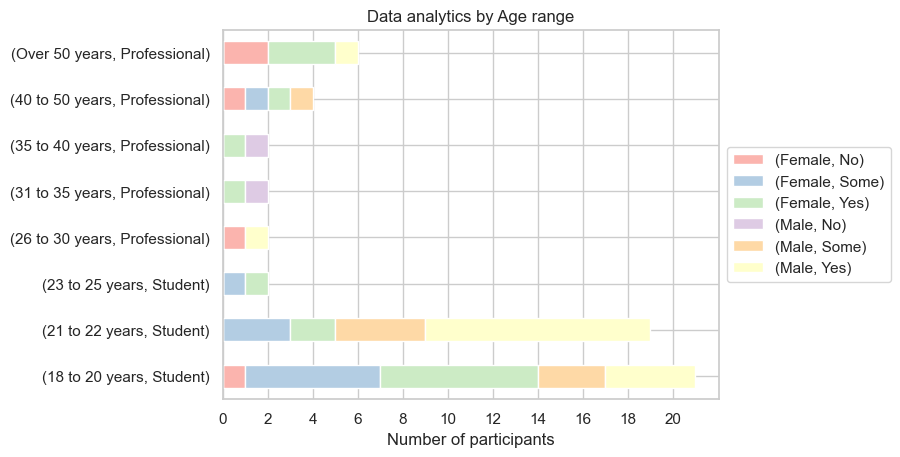

In [65]:
data_analytics_exp = df.query('Gender != "I prefer not to tell"').groupby(['Age range', 'Current role', 'Gender'])['Data analytics experience'].value_counts().fillna(0).reset_index()
data_analytics_exp_percent = df.query('Gender != "I prefer not to tell"').groupby(['Age range', 'Current role', 'Gender'])['Data analytics experience'].value_counts(normalize=True).fillna(0).reset_index()
display(data_analytics_exp)
display(data_analytics_exp_percent)

df_analytics_exp_pivot = data_analytics_exp.pivot_table(index=['Age range', 'Current role'], columns=['Gender', 'Data analytics experience'], values='count').fillna(0)
df_analytics_exp_pivot
p = df_analytics_exp_pivot.plot(kind='barh', stacked=True)

plt.title("Data analytics by Age range")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("")
plt.xticks(range(0, 22, 2))
plt.xlabel('Number of participants')
plt.show()